# Predicting Water Potability with ML

This notebook will use various Python-based machine learning and data science libraries in an attempt to build a machine learning model. The goal of the model is to be capable of predicting whether or not a water sample is safe for human consumption based on a number of attributes of the water's source.

## 1. Problem Definition

> Given a set of attributes of a water source obtained by a sample, predict if that water source provides safe, potable water.

## 2. Data

The data for this project was obtained on Kaggle: https://www.kaggle.com/adityakadiwal/water-potability

m: parts per million
μg/L: microgram per litre
mg/L: milligram per litre

Column description:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## 3. Evaluation

> Attempt to acheive a model that predicts with an F1 Score of >80% the potability of a water source.
F1-Score is a harmonic average (max value is the arithmetic mean) of the precision and recall score.

## 4. Features

**Water Potability Data Dictionary**
The following are the features we'll use to predict our target variable, potability.

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Prepare the tools
Using pandas, Matplotlib, and Numpy for data analysis and manipulation.

In [1]:
# Import all of the tools needed

# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
# use pandas to load data into a DataFrame
df = pd.read_csv("water_potability.csv")
df.shape # (rows, columns)

(3276, 10)

### Exploratory Data Analysis (EDA)

Learn more about the data set.

What kind of data is in the set?

Is there missing data to deal with?

Are there any outliers?


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
# Potability is the target variable, how many of each class are there?
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

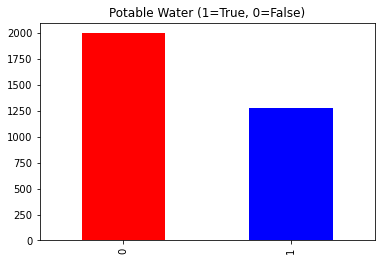

In [6]:
df["Potability"].value_counts().plot(kind="bar", color=["red", "blue"], title = "Potable Water (1=True, 0=False)");

In [7]:
(1998/(1998+1278))*100

60.98901098901099

Target classes are a 60/40 split, negative to positive (non-potable to potable).

In [8]:
1998-1278

720

#### Target variable class imbalance
For the purpose of this analysis, move forward with building the ML model with the data as is.

The imbalance in target classes may need to be addressed with one of various techniques (see link for reference: https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0)
This will be addressed in the next iteration of this project.

Use F1 score, Precision and Recall as metrics.
With more experience revist this project and improve by dealing with the imbalance issue.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Missing values will be handled after splitting the data set

### Use a Seaborn boxplot to visulize the distributions for the Potability classes

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

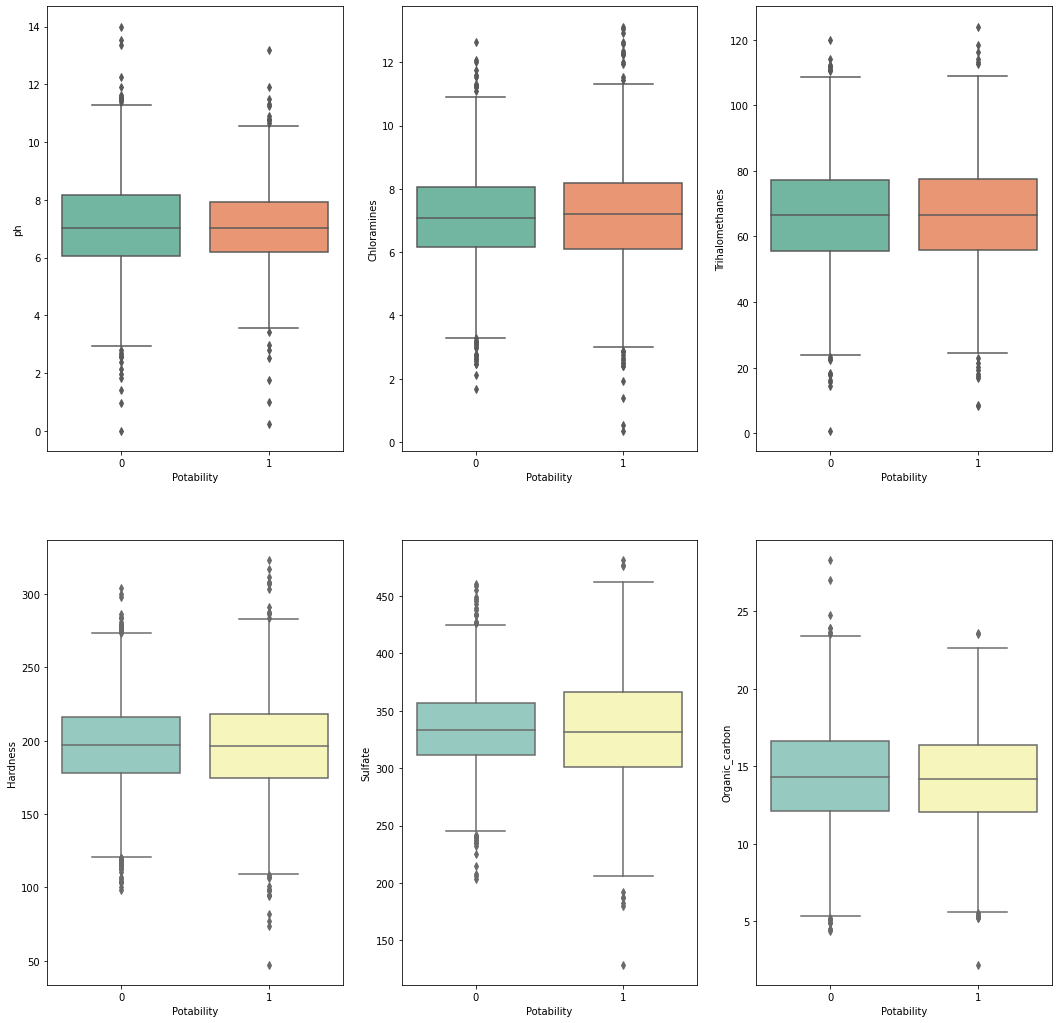

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 18))
sns.boxplot(ax=axes[0,0], data=df, palette="Set2", x='Potability', y='ph')
sns.boxplot(ax=axes[0,1], data=df, palette="Set2", x='Potability', y='Chloramines')
sns.boxplot(ax=axes[0,2], data=df, palette="Set2", x='Potability', y='Trihalomethanes')
sns.boxplot(ax=axes[1,0], data=df, palette="Set3", x='Potability', y='Hardness')
sns.boxplot(ax=axes[1,1], data=df, palette="Set3", x='Potability', y='Sulfate')
sns.boxplot(ax=axes[1,2], data=df, palette="Set3", x='Potability', y='Organic_carbon')

### Look at the overall distribution of the features with histograms

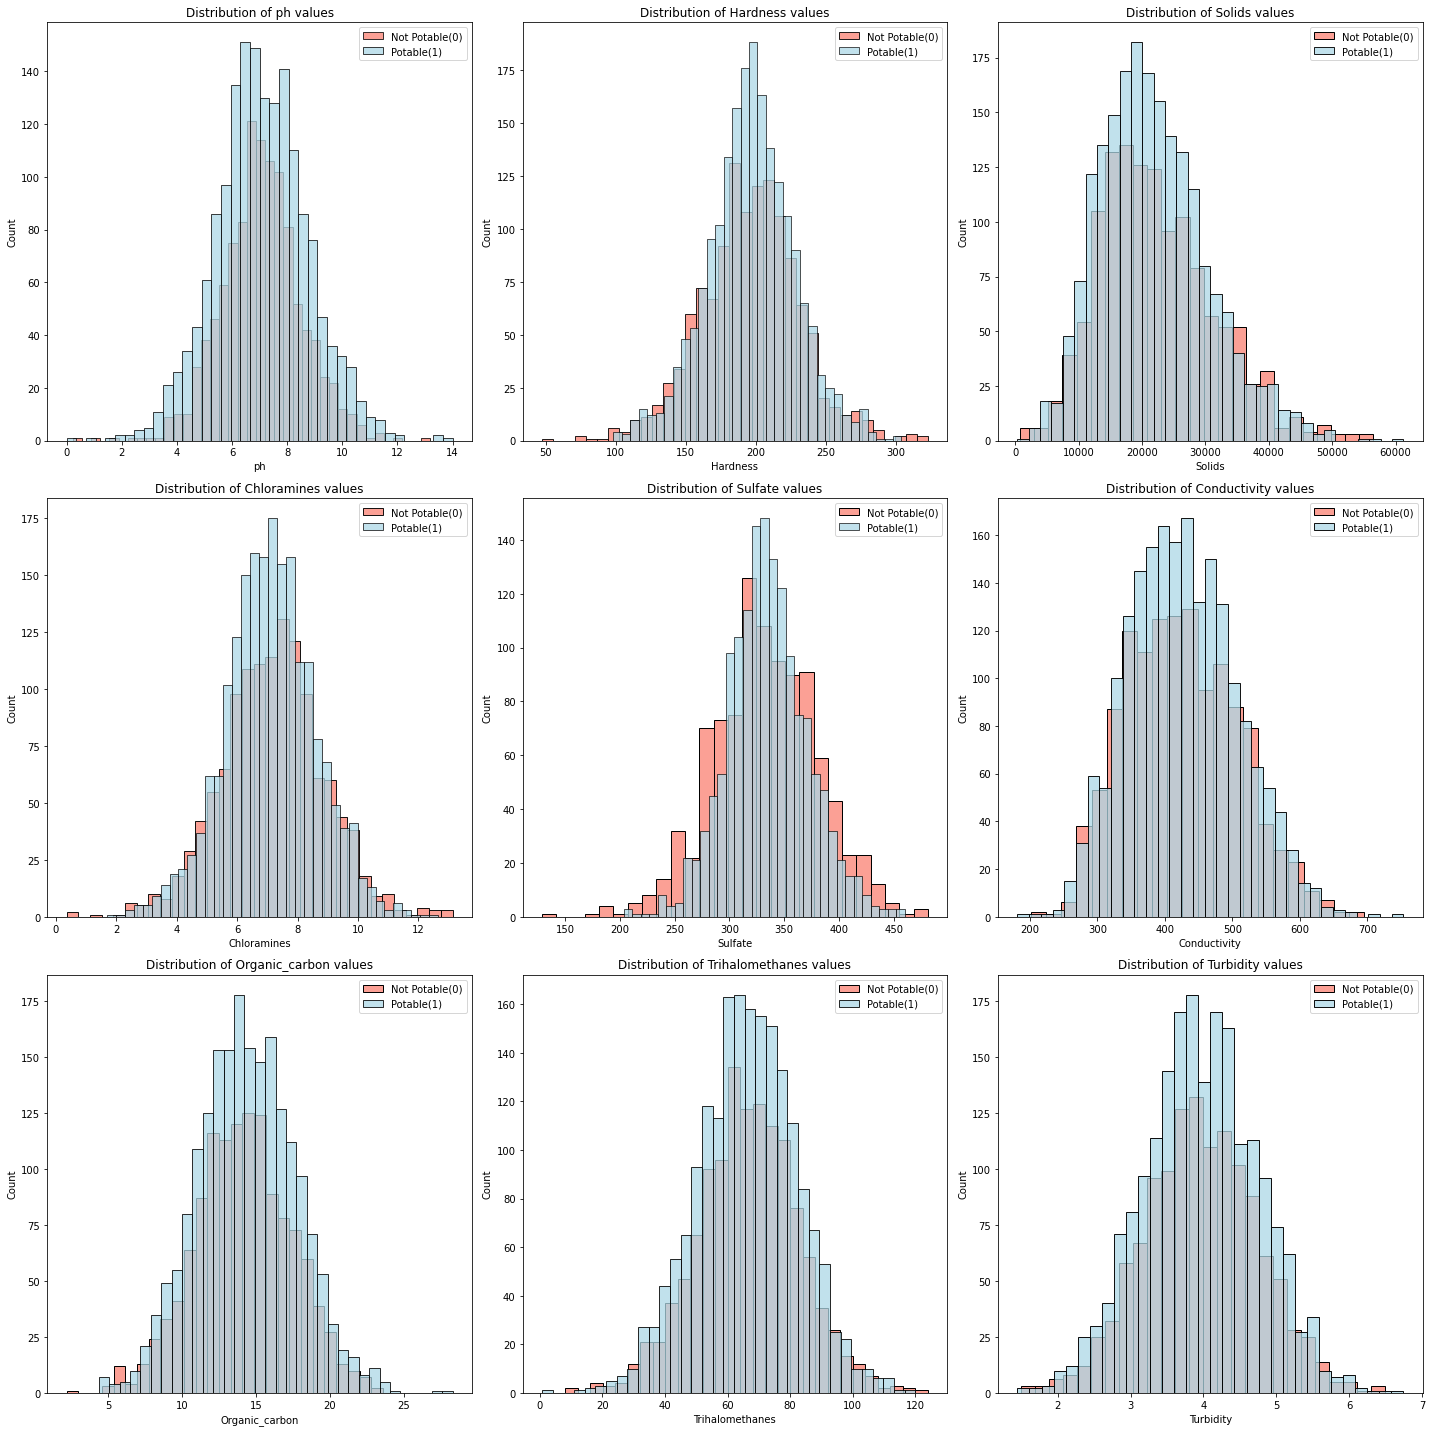

In [13]:
# Distribution of features
potable = df.query('Potability == 0')
not_potable = df.query('Potability == 1')

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.histplot(x=not_potable[column],label='Not Potable(0)', color="salmon")
    sns.histplot(x=potable[column],label='Potable(1)', color="lightblue")
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Produce a correlation matrix to visualize data correlation

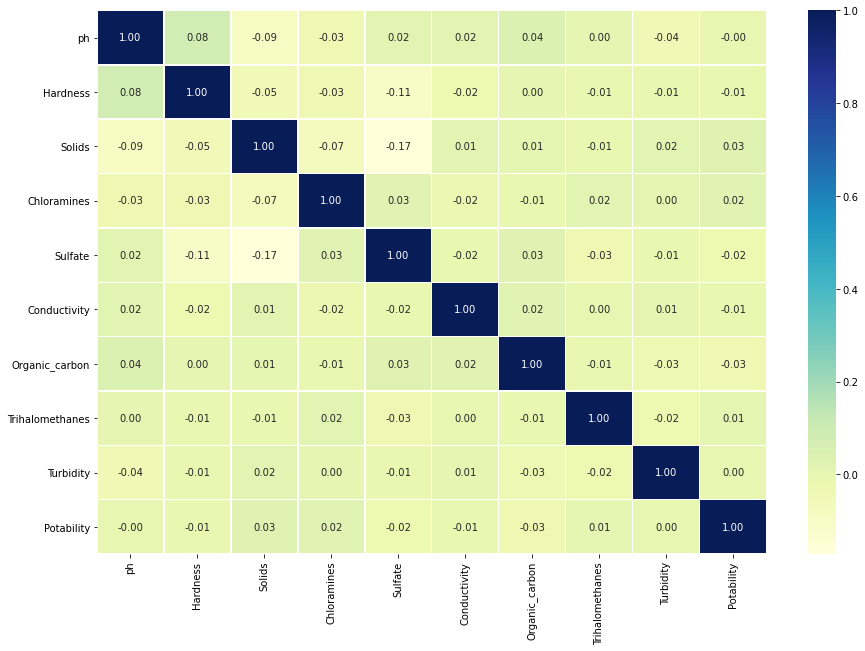

In [14]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Little to no correlation present in the dataset

## Modeling

* Create a working copy of the dataset
* Data set needs to be split into training and test sets.
* After splitting, complete imputation.


In [15]:
# Create workign copy of dataset
df_work = df.copy()

In [16]:
# Split data into X & y

X = df_work.drop("Potability", axis=1)
y = df_work.Potability

In [17]:
# Split data into train and test sets
np.random.seed(19)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
172,NaN,237.677383,26009.075259,7.074531,372.600296,344.767924,14.442238,72.696240,3.706602
1797,6.157443,155.835706,25937.711438,8.163144,298.192406,533.288351,14.356496,68.120761,4.770154
2762,6.100245,160.608230,13886.809713,7.542775,366.688795,449.948287,18.722860,64.390521,2.174898
570,7.785107,174.889361,13404.254332,7.517806,NaN,491.431722,13.825548,75.059426,4.904613
1617,6.957434,214.380139,15007.421534,6.997160,328.818760,468.555062,17.407261,104.207104,4.892050
...,...,...,...,...,...,...,...,...,...
936,5.746529,183.471794,35633.268511,6.066386,327.557850,354.174437,12.548871,70.525972,3.808372
1378,7.499844,210.985034,23707.465304,7.148518,NaN,484.843340,18.081957,52.967469,4.454477
757,8.370440,231.442553,15063.814968,12.279374,NaN,422.293819,15.027088,67.503004,3.210635
2670,10.600590,274.968783,21558.308741,6.112819,350.363703,331.120496,12.610799,NaN,5.477700


#### Check missing values in the training set

In [19]:
y_train.isna().sum()

0

In [20]:
X_train.isna().sum()

ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            624
Conductivity         0
Organic_carbon       0
Trihalomethanes    127
Turbidity            0
dtype: int64

#### Impute the missing values for ph, sulfate and trihalomethanes in the training set with median values

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'

X_train['ph'] = X_train['ph'].fillna(X_train['ph'].median())
X_train['Sulfate'] = X_train['Sulfate'].fillna(X_train['Sulfate'].median())
X_train['Trihalomethanes'] = X_train['Trihalomethanes'].fillna(X_train['Trihalomethanes'].median())

In [22]:
X_train.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

#### Check missing values in the Test set

In [23]:
X_test.isna().sum()

ph                  96
Hardness             0
Solids               0
Chloramines          0
Sulfate            157
Conductivity         0
Organic_carbon       0
Trihalomethanes     35
Turbidity            0
dtype: int64

#### Impute the missing values for ph, sulfate and trihalomethanes in the test set with median values

In [24]:
X_test['ph'] = X_test['ph'].fillna(X_test['ph'].median())
X_test['Sulfate'] = X_test['Sulfate'].fillna(X_test['Sulfate'].median())
X_test['Trihalomethanes'] = X_test['Trihalomethanes'].fillna(X_test['Trihalomethanes'].median())

In [25]:
X_test.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

### Data has been split into training and test sets and missing values have been filled

Select the machine learning models to use.  The models will then be trained on the training set and tested on the test set.

Working with four machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForestClassifier
4. CatBoostClassifier

In [26]:
# Put the models into a dictionary

models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "CatBoost": CatBoostClassifier()}

# Write a function that will fit these models to the training data and then provide a score when evaluated against the test data

def fit_eval(models, X_train, X_test, y_train, y_test):
    """
    Function will fit and evaluate the given machine learning models.  models is a dictionary of previously imported machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set a random seed
    np.random.seed(19)
    
    # Create an empty dictionary to store each model's score
    model_scores = {}
    
    # Loop through the models to fit and then score
    for name, model in models.items():
        # data fitting
        model.fit(X_train, y_train)
        # evaluate the model and place score in model_scores dictionary
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [27]:
model_scores = fit_eval(models = models,
                      X_train = X_train,
                      X_test = X_test,
                      y_train = y_train,
                      y_test = y_test)
model_scores

Learning rate set to 0.015543
0:	learn: 0.6907615	total: 149ms	remaining: 2m 29s
1:	learn: 0.6894084	total: 157ms	remaining: 1m 18s
2:	learn: 0.6877729	total: 162ms	remaining: 53.8s
3:	learn: 0.6859559	total: 166ms	remaining: 41.3s
4:	learn: 0.6836316	total: 170ms	remaining: 33.8s
5:	learn: 0.6818641	total: 173ms	remaining: 28.7s
6:	learn: 0.6801022	total: 176ms	remaining: 25s
7:	learn: 0.6787159	total: 179ms	remaining: 22.2s
8:	learn: 0.6772150	total: 183ms	remaining: 20.1s
9:	learn: 0.6762382	total: 187ms	remaining: 18.5s
10:	learn: 0.6749197	total: 195ms	remaining: 17.6s
11:	learn: 0.6731017	total: 201ms	remaining: 16.6s
12:	learn: 0.6716246	total: 206ms	remaining: 15.6s
13:	learn: 0.6707764	total: 210ms	remaining: 14.8s
14:	learn: 0.6692928	total: 213ms	remaining: 14s
15:	learn: 0.6675793	total: 217ms	remaining: 13.4s
16:	learn: 0.6657679	total: 220ms	remaining: 12.7s
17:	learn: 0.6639645	total: 224ms	remaining: 12.2s
18:	learn: 0.6624525	total: 227ms	remaining: 11.7s
19:	learn: 0.

167:	learn: 0.5666898	total: 737ms	remaining: 3.65s
168:	learn: 0.5661930	total: 740ms	remaining: 3.64s
169:	learn: 0.5658510	total: 743ms	remaining: 3.63s
170:	learn: 0.5653295	total: 746ms	remaining: 3.62s
171:	learn: 0.5650555	total: 749ms	remaining: 3.6s
172:	learn: 0.5646859	total: 752ms	remaining: 3.6s
173:	learn: 0.5641050	total: 756ms	remaining: 3.59s
174:	learn: 0.5637687	total: 760ms	remaining: 3.58s
175:	learn: 0.5634048	total: 762ms	remaining: 3.57s
176:	learn: 0.5630961	total: 765ms	remaining: 3.56s
177:	learn: 0.5627862	total: 768ms	remaining: 3.55s
178:	learn: 0.5622667	total: 772ms	remaining: 3.54s
179:	learn: 0.5619502	total: 775ms	remaining: 3.53s
180:	learn: 0.5617549	total: 777ms	remaining: 3.52s
181:	learn: 0.5614223	total: 780ms	remaining: 3.5s
182:	learn: 0.5609776	total: 783ms	remaining: 3.49s
183:	learn: 0.5605288	total: 786ms	remaining: 3.48s
184:	learn: 0.5601213	total: 794ms	remaining: 3.5s
185:	learn: 0.5596408	total: 801ms	remaining: 3.5s
186:	learn: 0.559

360:	learn: 0.5096647	total: 1.27s	remaining: 2.25s
361:	learn: 0.5094232	total: 1.27s	remaining: 2.24s
362:	learn: 0.5092388	total: 1.27s	remaining: 2.23s
363:	learn: 0.5090041	total: 1.28s	remaining: 2.23s
364:	learn: 0.5088139	total: 1.28s	remaining: 2.23s
365:	learn: 0.5086255	total: 1.28s	remaining: 2.22s
366:	learn: 0.5083965	total: 1.29s	remaining: 2.22s
367:	learn: 0.5080197	total: 1.29s	remaining: 2.22s
368:	learn: 0.5078777	total: 1.3s	remaining: 2.22s
369:	learn: 0.5076813	total: 1.31s	remaining: 2.22s
370:	learn: 0.5074725	total: 1.31s	remaining: 2.22s
371:	learn: 0.5072989	total: 1.31s	remaining: 2.22s
372:	learn: 0.5071075	total: 1.32s	remaining: 2.22s
373:	learn: 0.5068198	total: 1.32s	remaining: 2.21s
374:	learn: 0.5066138	total: 1.32s	remaining: 2.21s
375:	learn: 0.5064495	total: 1.33s	remaining: 2.21s
376:	learn: 0.5061943	total: 1.33s	remaining: 2.2s
377:	learn: 0.5060163	total: 1.33s	remaining: 2.19s
378:	learn: 0.5057705	total: 1.34s	remaining: 2.19s
379:	learn: 0.

535:	learn: 0.4710350	total: 1.84s	remaining: 1.59s
536:	learn: 0.4708283	total: 1.84s	remaining: 1.59s
537:	learn: 0.4706846	total: 1.85s	remaining: 1.59s
538:	learn: 0.4704363	total: 1.85s	remaining: 1.58s
539:	learn: 0.4702593	total: 1.86s	remaining: 1.58s
540:	learn: 0.4700877	total: 1.86s	remaining: 1.58s
541:	learn: 0.4698248	total: 1.86s	remaining: 1.57s
542:	learn: 0.4696866	total: 1.87s	remaining: 1.57s
543:	learn: 0.4695603	total: 1.87s	remaining: 1.57s
544:	learn: 0.4692151	total: 1.88s	remaining: 1.56s
545:	learn: 0.4690326	total: 1.88s	remaining: 1.56s
546:	learn: 0.4686433	total: 1.88s	remaining: 1.56s
547:	learn: 0.4683027	total: 1.88s	remaining: 1.55s
548:	learn: 0.4682066	total: 1.89s	remaining: 1.55s
549:	learn: 0.4679478	total: 1.89s	remaining: 1.54s
550:	learn: 0.4677587	total: 1.89s	remaining: 1.54s
551:	learn: 0.4675703	total: 1.89s	remaining: 1.54s
552:	learn: 0.4672401	total: 1.9s	remaining: 1.53s
553:	learn: 0.4669531	total: 1.9s	remaining: 1.53s
554:	learn: 0.

740:	learn: 0.4281885	total: 2.57s	remaining: 899ms
741:	learn: 0.4277928	total: 2.58s	remaining: 896ms
742:	learn: 0.4276922	total: 2.58s	remaining: 893ms
743:	learn: 0.4275438	total: 2.59s	remaining: 890ms
744:	learn: 0.4273446	total: 2.59s	remaining: 887ms
745:	learn: 0.4271290	total: 2.6s	remaining: 884ms
746:	learn: 0.4269409	total: 2.6s	remaining: 880ms
747:	learn: 0.4268183	total: 2.6s	remaining: 876ms
748:	learn: 0.4266950	total: 2.6s	remaining: 873ms
749:	learn: 0.4265672	total: 2.61s	remaining: 869ms
750:	learn: 0.4264101	total: 2.61s	remaining: 865ms
751:	learn: 0.4260945	total: 2.61s	remaining: 862ms
752:	learn: 0.4257590	total: 2.62s	remaining: 858ms
753:	learn: 0.4255655	total: 2.62s	remaining: 855ms
754:	learn: 0.4253092	total: 2.62s	remaining: 851ms
755:	learn: 0.4250414	total: 2.63s	remaining: 849ms
756:	learn: 0.4248592	total: 2.64s	remaining: 846ms
757:	learn: 0.4245677	total: 2.64s	remaining: 843ms
758:	learn: 0.4243243	total: 2.65s	remaining: 840ms
759:	learn: 0.42

914:	learn: 0.3939558	total: 3.28s	remaining: 305ms
915:	learn: 0.3937026	total: 3.28s	remaining: 301ms
916:	learn: 0.3934680	total: 3.29s	remaining: 298ms
917:	learn: 0.3931609	total: 3.29s	remaining: 294ms
918:	learn: 0.3929007	total: 3.29s	remaining: 290ms
919:	learn: 0.3926573	total: 3.3s	remaining: 287ms
920:	learn: 0.3925737	total: 3.3s	remaining: 283ms
921:	learn: 0.3924618	total: 3.3s	remaining: 279ms
922:	learn: 0.3922965	total: 3.31s	remaining: 276ms
923:	learn: 0.3920222	total: 3.31s	remaining: 272ms
924:	learn: 0.3918799	total: 3.31s	remaining: 269ms
925:	learn: 0.3917433	total: 3.31s	remaining: 265ms
926:	learn: 0.3915909	total: 3.32s	remaining: 262ms
927:	learn: 0.3914854	total: 3.33s	remaining: 258ms
928:	learn: 0.3913702	total: 3.33s	remaining: 255ms
929:	learn: 0.3912763	total: 3.34s	remaining: 251ms
930:	learn: 0.3911382	total: 3.35s	remaining: 248ms
931:	learn: 0.3909376	total: 3.35s	remaining: 244ms
932:	learn: 0.3907306	total: 3.35s	remaining: 241ms
933:	learn: 0.3

{'Logistic Regression': 0.614329268292683,
 'KNN': 0.5289634146341463,
 'Random Forest': 0.6829268292682927,
 'CatBoost': 0.6844512195121951}

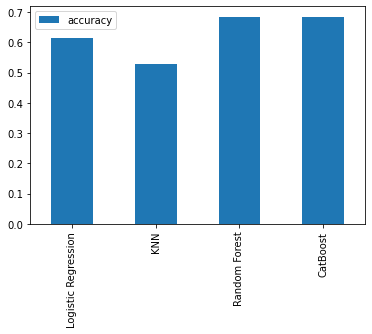

In [28]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Due to imbalnce in the data, accuracy isn't the best evaluation metric.

In the next steps work model hyperparameter tuning and review additional metrics.

The KNeighborsClassifier will no longer be considered.

### Hyperprameter Tuning

Using RandomizeSearchCV with:
1. LogisticRegression()
2. RandomForestClassifier()
3. CatBoostClassifier()

**Create hyperparameter grids for the remaining 3 models**

In [38]:
# Create a hyperparameter grid for LogisticRegression
lr_grid = {"C":np.logspace(-2, 2, 20),
               "solver":["liblinear"]}  

# Create a hyperparmeter grid for RandomForestClassifier
rf_grid = {"n_estimators": [100, 200, 300, 500],
          "max_depth": [5, 10, 12],
          "max_features": ['auto', 'sqrt', 'log2'],
          "min_samples_split": np.arange(10, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparmeter grid for CatBoostClassifier
cb_grid = {"depth": [8],
          "learning_rate": np.linspace(0,0.2,5)}

#### Tune the LogisticRegression Model

In [31]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_lr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit the random hyperparameter search model for LogisticRegression
rs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.01}

In [33]:
rs_lr.score(X_test,y_test)

0.614329268292683

#### Tune the RandomForestClassifier Model

In [34]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions = rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

# Fit the random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([10, 12, 14, 16, 18]),
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 12}

In [36]:
rs_rf.score(X_test, y_test)

0.6859756097560976

#### Tune the Catboost Model

In [39]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_cb = RandomizedSearchCV(CatBoostClassifier(),
                         param_distributions = cb_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

# Fit the random hyperparameter search model for CatBoostClassifier
rs_cb.fit(X_train, y_train)

C:\Users\gregv\Desktop\ML_Projects\water_quality\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\gregv\Desktop\ML_Projects\water_quality\env\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gregv\Desktop\ML_Projects\water_quality\env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gregv\Desktop\ML_Projects\water_quality\env\lib\site-packages\catboost\core.py", line 4673, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6831787	total: 7.43ms	remaining: 7.43s
1:	learn: 0.6775294	total: 14.5ms	remaining: 7.21s
2:	learn: 0.6681933	total: 21.5ms	remaining: 7.14s
3:	learn: 0.6598022	total: 28.7ms	remaining: 7.15s
4:	learn: 0.6524327	total: 36ms	remaining: 7.16s
5:	learn: 0.6477485	total: 43.1ms	remaining: 7.13s
6:	learn: 0.6408872	total: 50.6ms	remaining: 7.18s
7:	learn: 0.6339560	total: 58.1ms	remaining: 7.2s
8:	learn: 0.6303818	total: 65.2ms	remaining: 7.18s
9:	learn: 0.6215972	total: 73.6ms	remaining: 7.29s
10:	learn: 0.6170993	total: 85ms	remaining: 7.64s
11:	learn: 0.6119682	total: 91.9ms	remaining: 7.57s
12:	learn: 0.6071765	total: 100ms	remaining: 7.59s
13:	learn: 0.6038605	total: 107ms	remaining: 7.56s
14:	learn: 0.6003242	total: 114ms	remaining: 7.51s
15:	learn: 0.5957060	total: 121ms	remaining: 7.46s
16:	learn: 0.5922004	total: 138ms	remaining: 7.98s
17:	learn: 0.5879380	total: 150ms	remaining: 8.2s
18:	learn: 0.5838026	total

177:	learn: 0.3145183	total: 1.25s	remaining: 5.79s
178:	learn: 0.3134267	total: 1.26s	remaining: 5.79s
179:	learn: 0.3124268	total: 1.27s	remaining: 5.79s
180:	learn: 0.3110089	total: 1.28s	remaining: 5.78s
181:	learn: 0.3101525	total: 1.28s	remaining: 5.77s
182:	learn: 0.3084712	total: 1.29s	remaining: 5.77s
183:	learn: 0.3080983	total: 1.3s	remaining: 5.76s
184:	learn: 0.3073426	total: 1.31s	remaining: 5.75s
185:	learn: 0.3063795	total: 1.31s	remaining: 5.74s
186:	learn: 0.3054875	total: 1.32s	remaining: 5.73s
187:	learn: 0.3046766	total: 1.32s	remaining: 5.72s
188:	learn: 0.3036726	total: 1.33s	remaining: 5.72s
189:	learn: 0.3022386	total: 1.34s	remaining: 5.71s
190:	learn: 0.3008823	total: 1.34s	remaining: 5.7s
191:	learn: 0.2997142	total: 1.35s	remaining: 5.69s
192:	learn: 0.2987534	total: 1.36s	remaining: 5.68s
193:	learn: 0.2974780	total: 1.36s	remaining: 5.67s
194:	learn: 0.2968363	total: 1.37s	remaining: 5.66s
195:	learn: 0.2958050	total: 1.38s	remaining: 5.65s
196:	learn: 0.

358:	learn: 0.1815365	total: 2.53s	remaining: 4.51s
359:	learn: 0.1807674	total: 2.53s	remaining: 4.5s
360:	learn: 0.1803750	total: 2.54s	remaining: 4.5s
361:	learn: 0.1799899	total: 2.55s	remaining: 4.49s
362:	learn: 0.1791226	total: 2.55s	remaining: 4.48s
363:	learn: 0.1788733	total: 2.56s	remaining: 4.47s
364:	learn: 0.1780620	total: 2.57s	remaining: 4.47s
365:	learn: 0.1773805	total: 2.58s	remaining: 4.46s
366:	learn: 0.1766546	total: 2.58s	remaining: 4.45s
367:	learn: 0.1763149	total: 2.59s	remaining: 4.45s
368:	learn: 0.1757452	total: 2.6s	remaining: 4.44s
369:	learn: 0.1753268	total: 2.6s	remaining: 4.43s
370:	learn: 0.1748763	total: 2.61s	remaining: 4.42s
371:	learn: 0.1747517	total: 2.61s	remaining: 4.41s
372:	learn: 0.1742220	total: 2.62s	remaining: 4.41s
373:	learn: 0.1736575	total: 2.63s	remaining: 4.4s
374:	learn: 0.1732213	total: 2.64s	remaining: 4.39s
375:	learn: 0.1723259	total: 2.64s	remaining: 4.39s
376:	learn: 0.1718852	total: 2.65s	remaining: 4.38s
377:	learn: 0.171

540:	learn: 0.1105723	total: 3.79s	remaining: 3.22s
541:	learn: 0.1104066	total: 3.8s	remaining: 3.21s
542:	learn: 0.1102271	total: 3.81s	remaining: 3.21s
543:	learn: 0.1101200	total: 3.82s	remaining: 3.2s
544:	learn: 0.1099252	total: 3.82s	remaining: 3.19s
545:	learn: 0.1096505	total: 3.83s	remaining: 3.19s
546:	learn: 0.1095155	total: 3.84s	remaining: 3.18s
547:	learn: 0.1092717	total: 3.84s	remaining: 3.17s
548:	learn: 0.1090098	total: 3.85s	remaining: 3.16s
549:	learn: 0.1087026	total: 3.86s	remaining: 3.16s
550:	learn: 0.1083142	total: 3.86s	remaining: 3.15s
551:	learn: 0.1082078	total: 3.87s	remaining: 3.14s
552:	learn: 0.1079617	total: 3.88s	remaining: 3.13s
553:	learn: 0.1078068	total: 3.88s	remaining: 3.13s
554:	learn: 0.1072611	total: 3.89s	remaining: 3.12s
555:	learn: 0.1071407	total: 3.9s	remaining: 3.11s
556:	learn: 0.1068195	total: 3.91s	remaining: 3.11s
557:	learn: 0.1064774	total: 3.91s	remaining: 3.1s
558:	learn: 0.1059307	total: 3.92s	remaining: 3.09s
559:	learn: 0.10

716:	learn: 0.0744745	total: 5.07s	remaining: 2s
717:	learn: 0.0742310	total: 5.08s	remaining: 1.99s
718:	learn: 0.0740454	total: 5.08s	remaining: 1.99s
719:	learn: 0.0738872	total: 5.09s	remaining: 1.98s
720:	learn: 0.0737134	total: 5.1s	remaining: 1.97s
721:	learn: 0.0734807	total: 5.11s	remaining: 1.97s
722:	learn: 0.0733558	total: 5.11s	remaining: 1.96s
723:	learn: 0.0732430	total: 5.12s	remaining: 1.95s
724:	learn: 0.0730830	total: 5.12s	remaining: 1.94s
725:	learn: 0.0729814	total: 5.13s	remaining: 1.94s
726:	learn: 0.0726470	total: 5.14s	remaining: 1.93s
727:	learn: 0.0725092	total: 5.14s	remaining: 1.92s
728:	learn: 0.0724024	total: 5.15s	remaining: 1.92s
729:	learn: 0.0723300	total: 5.16s	remaining: 1.91s
730:	learn: 0.0722130	total: 5.17s	remaining: 1.9s
731:	learn: 0.0720174	total: 5.17s	remaining: 1.89s
732:	learn: 0.0718345	total: 5.18s	remaining: 1.89s
733:	learn: 0.0716871	total: 5.18s	remaining: 1.88s
734:	learn: 0.0715303	total: 5.19s	remaining: 1.87s
735:	learn: 0.071

875:	learn: 0.0545070	total: 6.17s	remaining: 874ms
876:	learn: 0.0543205	total: 6.18s	remaining: 867ms
877:	learn: 0.0541875	total: 6.19s	remaining: 860ms
878:	learn: 0.0540723	total: 6.2s	remaining: 853ms
879:	learn: 0.0540039	total: 6.2s	remaining: 846ms
880:	learn: 0.0538757	total: 6.21s	remaining: 839ms
881:	learn: 0.0537720	total: 6.23s	remaining: 833ms
882:	learn: 0.0535953	total: 6.24s	remaining: 827ms
883:	learn: 0.0534663	total: 6.25s	remaining: 820ms
884:	learn: 0.0533964	total: 6.25s	remaining: 813ms
885:	learn: 0.0533548	total: 6.26s	remaining: 806ms
886:	learn: 0.0532826	total: 6.27s	remaining: 799ms
887:	learn: 0.0532023	total: 6.27s	remaining: 791ms
888:	learn: 0.0531779	total: 6.28s	remaining: 784ms
889:	learn: 0.0530393	total: 6.29s	remaining: 777ms
890:	learn: 0.0529210	total: 6.29s	remaining: 770ms
891:	learn: 0.0528379	total: 6.31s	remaining: 764ms
892:	learn: 0.0527321	total: 6.32s	remaining: 757ms
893:	learn: 0.0525325	total: 6.33s	remaining: 750ms
894:	learn: 0.

54:	learn: 0.4943497	total: 426ms	remaining: 7.31s
55:	learn: 0.4929904	total: 433ms	remaining: 7.29s
56:	learn: 0.4911072	total: 440ms	remaining: 7.29s
57:	learn: 0.4897201	total: 447ms	remaining: 7.26s
58:	learn: 0.4883979	total: 454ms	remaining: 7.25s
59:	learn: 0.4871162	total: 462ms	remaining: 7.23s
60:	learn: 0.4843709	total: 469ms	remaining: 7.21s
61:	learn: 0.4823968	total: 475ms	remaining: 7.19s
62:	learn: 0.4813465	total: 482ms	remaining: 7.17s
63:	learn: 0.4801437	total: 489ms	remaining: 7.15s
64:	learn: 0.4784323	total: 496ms	remaining: 7.13s
65:	learn: 0.4752335	total: 503ms	remaining: 7.12s
66:	learn: 0.4735406	total: 510ms	remaining: 7.11s
67:	learn: 0.4727616	total: 517ms	remaining: 7.09s
68:	learn: 0.4714077	total: 524ms	remaining: 7.07s
69:	learn: 0.4694971	total: 531ms	remaining: 7.05s
70:	learn: 0.4678814	total: 538ms	remaining: 7.04s
71:	learn: 0.4659034	total: 545ms	remaining: 7.02s
72:	learn: 0.4640733	total: 552ms	remaining: 7.01s
73:	learn: 0.4616468	total: 559

234:	learn: 0.2631012	total: 1.75s	remaining: 5.68s
235:	learn: 0.2622444	total: 1.75s	remaining: 5.67s
236:	learn: 0.2613310	total: 1.76s	remaining: 5.67s
237:	learn: 0.2603666	total: 1.77s	remaining: 5.66s
238:	learn: 0.2594236	total: 1.77s	remaining: 5.64s
239:	learn: 0.2582445	total: 1.78s	remaining: 5.63s
240:	learn: 0.2570691	total: 1.78s	remaining: 5.62s
241:	learn: 0.2561056	total: 1.79s	remaining: 5.61s
242:	learn: 0.2549647	total: 1.8s	remaining: 5.6s
243:	learn: 0.2542850	total: 1.81s	remaining: 5.6s
244:	learn: 0.2533570	total: 1.81s	remaining: 5.59s
245:	learn: 0.2523087	total: 1.82s	remaining: 5.58s
246:	learn: 0.2512897	total: 1.83s	remaining: 5.57s
247:	learn: 0.2503718	total: 1.83s	remaining: 5.56s
248:	learn: 0.2500480	total: 1.84s	remaining: 5.55s
249:	learn: 0.2490734	total: 1.85s	remaining: 5.54s
250:	learn: 0.2483915	total: 1.85s	remaining: 5.53s
251:	learn: 0.2478483	total: 1.86s	remaining: 5.52s
252:	learn: 0.2471177	total: 1.87s	remaining: 5.51s
253:	learn: 0.2

393:	learn: 0.1575446	total: 2.85s	remaining: 4.39s
394:	learn: 0.1572663	total: 2.86s	remaining: 4.38s
395:	learn: 0.1569186	total: 2.87s	remaining: 4.38s
396:	learn: 0.1565560	total: 2.88s	remaining: 4.37s
397:	learn: 0.1559238	total: 2.88s	remaining: 4.36s
398:	learn: 0.1554406	total: 2.89s	remaining: 4.35s
399:	learn: 0.1548915	total: 2.9s	remaining: 4.34s
400:	learn: 0.1543650	total: 2.9s	remaining: 4.34s
401:	learn: 0.1538184	total: 2.91s	remaining: 4.33s
402:	learn: 0.1535034	total: 2.92s	remaining: 4.33s
403:	learn: 0.1531802	total: 2.93s	remaining: 4.33s
404:	learn: 0.1527755	total: 2.94s	remaining: 4.32s
405:	learn: 0.1523782	total: 2.95s	remaining: 4.32s
406:	learn: 0.1517641	total: 2.96s	remaining: 4.31s
407:	learn: 0.1512613	total: 2.96s	remaining: 4.3s
408:	learn: 0.1505403	total: 2.97s	remaining: 4.29s
409:	learn: 0.1501559	total: 2.98s	remaining: 4.28s
410:	learn: 0.1498718	total: 2.98s	remaining: 4.27s
411:	learn: 0.1493715	total: 2.99s	remaining: 4.26s
412:	learn: 0.1

568:	learn: 0.0963474	total: 4.14s	remaining: 3.13s
569:	learn: 0.0960402	total: 4.15s	remaining: 3.13s
570:	learn: 0.0957082	total: 4.16s	remaining: 3.13s
571:	learn: 0.0955323	total: 4.17s	remaining: 3.12s
572:	learn: 0.0952165	total: 4.18s	remaining: 3.11s
573:	learn: 0.0950174	total: 4.18s	remaining: 3.1s
574:	learn: 0.0948981	total: 4.19s	remaining: 3.1s
575:	learn: 0.0945899	total: 4.2s	remaining: 3.09s
576:	learn: 0.0945032	total: 4.2s	remaining: 3.08s
577:	learn: 0.0943608	total: 4.21s	remaining: 3.07s
578:	learn: 0.0941062	total: 4.21s	remaining: 3.06s
579:	learn: 0.0938997	total: 4.22s	remaining: 3.06s
580:	learn: 0.0937252	total: 4.23s	remaining: 3.05s
581:	learn: 0.0934265	total: 4.23s	remaining: 3.04s
582:	learn: 0.0932175	total: 4.24s	remaining: 3.03s
583:	learn: 0.0930555	total: 4.25s	remaining: 3.03s
584:	learn: 0.0928109	total: 4.25s	remaining: 3.02s
585:	learn: 0.0926004	total: 4.26s	remaining: 3.01s
586:	learn: 0.0923342	total: 4.27s	remaining: 3s
587:	learn: 0.09211

735:	learn: 0.0660707	total: 5.32s	remaining: 1.91s
736:	learn: 0.0659099	total: 5.33s	remaining: 1.9s
737:	learn: 0.0657326	total: 5.34s	remaining: 1.9s
738:	learn: 0.0655022	total: 5.34s	remaining: 1.89s
739:	learn: 0.0653033	total: 5.35s	remaining: 1.88s
740:	learn: 0.0651894	total: 5.36s	remaining: 1.87s
741:	learn: 0.0650884	total: 5.37s	remaining: 1.86s
742:	learn: 0.0649771	total: 5.37s	remaining: 1.86s
743:	learn: 0.0648458	total: 5.38s	remaining: 1.85s
744:	learn: 0.0647855	total: 5.39s	remaining: 1.84s
745:	learn: 0.0645954	total: 5.39s	remaining: 1.84s
746:	learn: 0.0645016	total: 5.4s	remaining: 1.83s
747:	learn: 0.0643029	total: 5.41s	remaining: 1.82s
748:	learn: 0.0641596	total: 5.41s	remaining: 1.81s
749:	learn: 0.0641075	total: 5.42s	remaining: 1.81s
750:	learn: 0.0639822	total: 5.43s	remaining: 1.8s
751:	learn: 0.0637869	total: 5.44s	remaining: 1.79s
752:	learn: 0.0637352	total: 5.45s	remaining: 1.79s
753:	learn: 0.0635301	total: 5.46s	remaining: 1.78s
754:	learn: 0.06

912:	learn: 0.0459704	total: 6.7s	remaining: 638ms
913:	learn: 0.0458207	total: 6.7s	remaining: 631ms
914:	learn: 0.0457288	total: 6.71s	remaining: 623ms
915:	learn: 0.0456014	total: 6.72s	remaining: 616ms
916:	learn: 0.0454820	total: 6.72s	remaining: 609ms
917:	learn: 0.0453970	total: 6.73s	remaining: 601ms
918:	learn: 0.0452923	total: 6.74s	remaining: 594ms
919:	learn: 0.0451886	total: 6.75s	remaining: 587ms
920:	learn: 0.0450705	total: 6.75s	remaining: 579ms
921:	learn: 0.0450226	total: 6.76s	remaining: 572ms
922:	learn: 0.0449185	total: 6.76s	remaining: 564ms
923:	learn: 0.0448667	total: 6.77s	remaining: 557ms
924:	learn: 0.0447834	total: 6.78s	remaining: 550ms
925:	learn: 0.0447257	total: 6.79s	remaining: 542ms
926:	learn: 0.0446739	total: 6.79s	remaining: 535ms
927:	learn: 0.0445860	total: 6.8s	remaining: 527ms
928:	learn: 0.0445088	total: 6.8s	remaining: 520ms
929:	learn: 0.0444476	total: 6.81s	remaining: 513ms
930:	learn: 0.0443794	total: 6.82s	remaining: 505ms
931:	learn: 0.04

91:	learn: 0.4208494	total: 641ms	remaining: 6.32s
92:	learn: 0.4195152	total: 648ms	remaining: 6.32s
93:	learn: 0.4183796	total: 655ms	remaining: 6.31s
94:	learn: 0.4170484	total: 661ms	remaining: 6.3s
95:	learn: 0.4164277	total: 668ms	remaining: 6.29s
96:	learn: 0.4148264	total: 675ms	remaining: 6.28s
97:	learn: 0.4134361	total: 682ms	remaining: 6.27s
98:	learn: 0.4116114	total: 689ms	remaining: 6.27s
99:	learn: 0.4107254	total: 696ms	remaining: 6.26s
100:	learn: 0.4091156	total: 702ms	remaining: 6.25s
101:	learn: 0.4081561	total: 709ms	remaining: 6.24s
102:	learn: 0.4064882	total: 716ms	remaining: 6.23s
103:	learn: 0.4043288	total: 723ms	remaining: 6.22s
104:	learn: 0.4037388	total: 729ms	remaining: 6.21s
105:	learn: 0.4027349	total: 736ms	remaining: 6.2s
106:	learn: 0.4011487	total: 742ms	remaining: 6.19s
107:	learn: 0.4000170	total: 748ms	remaining: 6.18s
108:	learn: 0.3986609	total: 755ms	remaining: 6.17s
109:	learn: 0.3977796	total: 762ms	remaining: 6.16s
110:	learn: 0.3965710	t

258:	learn: 0.2414644	total: 1.8s	remaining: 5.16s
259:	learn: 0.2407572	total: 1.81s	remaining: 5.15s
260:	learn: 0.2399670	total: 1.82s	remaining: 5.14s
261:	learn: 0.2393904	total: 1.82s	remaining: 5.14s
262:	learn: 0.2385328	total: 1.83s	remaining: 5.13s
263:	learn: 0.2380318	total: 1.84s	remaining: 5.12s
264:	learn: 0.2375836	total: 1.84s	remaining: 5.12s
265:	learn: 0.2373372	total: 1.85s	remaining: 5.11s
266:	learn: 0.2365759	total: 1.86s	remaining: 5.1s
267:	learn: 0.2361289	total: 1.86s	remaining: 5.09s
268:	learn: 0.2346404	total: 1.87s	remaining: 5.08s
269:	learn: 0.2335468	total: 1.88s	remaining: 5.08s
270:	learn: 0.2325410	total: 1.88s	remaining: 5.07s
271:	learn: 0.2320581	total: 1.89s	remaining: 5.06s
272:	learn: 0.2310930	total: 1.9s	remaining: 5.05s
273:	learn: 0.2300071	total: 1.9s	remaining: 5.04s
274:	learn: 0.2294298	total: 1.91s	remaining: 5.04s
275:	learn: 0.2288516	total: 1.92s	remaining: 5.03s
276:	learn: 0.2283086	total: 1.92s	remaining: 5.02s
277:	learn: 0.22

423:	learn: 0.1436674	total: 2.92s	remaining: 3.96s
424:	learn: 0.1432193	total: 2.92s	remaining: 3.96s
425:	learn: 0.1429503	total: 2.93s	remaining: 3.95s
426:	learn: 0.1424726	total: 2.94s	remaining: 3.94s
427:	learn: 0.1417763	total: 2.95s	remaining: 3.94s
428:	learn: 0.1412705	total: 2.95s	remaining: 3.93s
429:	learn: 0.1409784	total: 2.96s	remaining: 3.92s
430:	learn: 0.1406519	total: 2.96s	remaining: 3.92s
431:	learn: 0.1401719	total: 2.97s	remaining: 3.91s
432:	learn: 0.1398990	total: 2.98s	remaining: 3.9s
433:	learn: 0.1395590	total: 2.98s	remaining: 3.89s
434:	learn: 0.1392894	total: 2.99s	remaining: 3.89s
435:	learn: 0.1390365	total: 3s	remaining: 3.88s
436:	learn: 0.1385893	total: 3s	remaining: 3.87s
437:	learn: 0.1382356	total: 3.01s	remaining: 3.86s
438:	learn: 0.1379077	total: 3.02s	remaining: 3.86s
439:	learn: 0.1376788	total: 3.02s	remaining: 3.85s
440:	learn: 0.1374749	total: 3.03s	remaining: 3.84s
441:	learn: 0.1370317	total: 3.04s	remaining: 3.83s
442:	learn: 0.13653

586:	learn: 0.0920073	total: 4.06s	remaining: 2.86s
587:	learn: 0.0918225	total: 4.07s	remaining: 2.85s
588:	learn: 0.0917175	total: 4.08s	remaining: 2.85s
589:	learn: 0.0914106	total: 4.08s	remaining: 2.84s
590:	learn: 0.0912202	total: 4.09s	remaining: 2.83s
591:	learn: 0.0911169	total: 4.1s	remaining: 2.83s
592:	learn: 0.0908971	total: 4.11s	remaining: 2.82s
593:	learn: 0.0906431	total: 4.11s	remaining: 2.81s
594:	learn: 0.0904742	total: 4.12s	remaining: 2.8s
595:	learn: 0.0902523	total: 4.13s	remaining: 2.8s
596:	learn: 0.0900260	total: 4.13s	remaining: 2.79s
597:	learn: 0.0898795	total: 4.14s	remaining: 2.78s
598:	learn: 0.0896214	total: 4.15s	remaining: 2.78s
599:	learn: 0.0894426	total: 4.15s	remaining: 2.77s
600:	learn: 0.0892597	total: 4.16s	remaining: 2.76s
601:	learn: 0.0891261	total: 4.17s	remaining: 2.75s
602:	learn: 0.0888935	total: 4.17s	remaining: 2.75s
603:	learn: 0.0887826	total: 4.18s	remaining: 2.74s
604:	learn: 0.0884112	total: 4.19s	remaining: 2.73s
605:	learn: 0.0

746:	learn: 0.0633622	total: 5.2s	remaining: 1.76s
747:	learn: 0.0632786	total: 5.21s	remaining: 1.75s
748:	learn: 0.0631600	total: 5.22s	remaining: 1.75s
749:	learn: 0.0630598	total: 5.22s	remaining: 1.74s
750:	learn: 0.0629745	total: 5.23s	remaining: 1.73s
751:	learn: 0.0629076	total: 5.24s	remaining: 1.73s
752:	learn: 0.0626775	total: 5.25s	remaining: 1.72s
753:	learn: 0.0625433	total: 5.25s	remaining: 1.71s
754:	learn: 0.0624547	total: 5.26s	remaining: 1.71s
755:	learn: 0.0623051	total: 5.27s	remaining: 1.7s
756:	learn: 0.0621552	total: 5.27s	remaining: 1.69s
757:	learn: 0.0620548	total: 5.28s	remaining: 1.69s
758:	learn: 0.0617723	total: 5.29s	remaining: 1.68s
759:	learn: 0.0615703	total: 5.29s	remaining: 1.67s
760:	learn: 0.0614999	total: 5.3s	remaining: 1.66s
761:	learn: 0.0613504	total: 5.31s	remaining: 1.66s
762:	learn: 0.0611956	total: 5.31s	remaining: 1.65s
763:	learn: 0.0611063	total: 5.32s	remaining: 1.64s
764:	learn: 0.0609441	total: 5.33s	remaining: 1.64s
765:	learn: 0.0

912:	learn: 0.0465815	total: 6.37s	remaining: 607ms
913:	learn: 0.0465315	total: 6.38s	remaining: 600ms
914:	learn: 0.0464617	total: 6.38s	remaining: 593ms
915:	learn: 0.0463474	total: 6.39s	remaining: 586ms
916:	learn: 0.0462741	total: 6.4s	remaining: 579ms
917:	learn: 0.0461747	total: 6.4s	remaining: 572ms
918:	learn: 0.0460494	total: 6.41s	remaining: 565ms
919:	learn: 0.0459723	total: 6.42s	remaining: 558ms
920:	learn: 0.0459081	total: 6.42s	remaining: 551ms
921:	learn: 0.0457933	total: 6.43s	remaining: 544ms
922:	learn: 0.0457164	total: 6.44s	remaining: 537ms
923:	learn: 0.0455997	total: 6.44s	remaining: 530ms
924:	learn: 0.0455072	total: 6.45s	remaining: 523ms
925:	learn: 0.0454343	total: 6.46s	remaining: 516ms
926:	learn: 0.0453424	total: 6.46s	remaining: 509ms
927:	learn: 0.0452548	total: 6.47s	remaining: 502ms
928:	learn: 0.0451646	total: 6.48s	remaining: 495ms
929:	learn: 0.0450753	total: 6.48s	remaining: 488ms
930:	learn: 0.0450385	total: 6.49s	remaining: 481ms
931:	learn: 0.

96:	learn: 0.4013693	total: 683ms	remaining: 6.36s
97:	learn: 0.4000879	total: 690ms	remaining: 6.35s
98:	learn: 0.3991372	total: 698ms	remaining: 6.35s
99:	learn: 0.3975455	total: 705ms	remaining: 6.35s
100:	learn: 0.3963505	total: 712ms	remaining: 6.34s
101:	learn: 0.3938243	total: 719ms	remaining: 6.33s
102:	learn: 0.3917325	total: 727ms	remaining: 6.33s
103:	learn: 0.3901321	total: 733ms	remaining: 6.32s
104:	learn: 0.3881848	total: 740ms	remaining: 6.31s
105:	learn: 0.3871518	total: 747ms	remaining: 6.3s
106:	learn: 0.3856715	total: 754ms	remaining: 6.29s
107:	learn: 0.3846742	total: 761ms	remaining: 6.28s
108:	learn: 0.3833738	total: 767ms	remaining: 6.27s
109:	learn: 0.3823535	total: 774ms	remaining: 6.26s
110:	learn: 0.3812302	total: 780ms	remaining: 6.25s
111:	learn: 0.3799528	total: 787ms	remaining: 6.24s
112:	learn: 0.3791613	total: 794ms	remaining: 6.23s
113:	learn: 0.3773225	total: 800ms	remaining: 6.22s
114:	learn: 0.3754376	total: 807ms	remaining: 6.21s
115:	learn: 0.374

264:	learn: 0.2293423	total: 1.85s	remaining: 5.12s
265:	learn: 0.2285786	total: 1.85s	remaining: 5.11s
266:	learn: 0.2274554	total: 1.86s	remaining: 5.11s
267:	learn: 0.2259693	total: 1.87s	remaining: 5.1s
268:	learn: 0.2250990	total: 1.88s	remaining: 5.1s
269:	learn: 0.2241928	total: 1.88s	remaining: 5.09s
270:	learn: 0.2233991	total: 1.89s	remaining: 5.08s
271:	learn: 0.2224036	total: 1.9s	remaining: 5.08s
272:	learn: 0.2213594	total: 1.9s	remaining: 5.07s
273:	learn: 0.2207769	total: 1.91s	remaining: 5.06s
274:	learn: 0.2197885	total: 1.92s	remaining: 5.05s
275:	learn: 0.2193192	total: 1.92s	remaining: 5.05s
276:	learn: 0.2184182	total: 1.93s	remaining: 5.04s
277:	learn: 0.2177418	total: 1.94s	remaining: 5.03s
278:	learn: 0.2167438	total: 1.95s	remaining: 5.03s
279:	learn: 0.2158138	total: 1.95s	remaining: 5.02s
280:	learn: 0.2148924	total: 1.96s	remaining: 5.01s
281:	learn: 0.2144885	total: 1.97s	remaining: 5.01s
282:	learn: 0.2137356	total: 1.97s	remaining: 5s
283:	learn: 0.21294

435:	learn: 0.1341897	total: 3.01s	remaining: 3.89s
436:	learn: 0.1337936	total: 3.01s	remaining: 3.88s
437:	learn: 0.1334351	total: 3.02s	remaining: 3.88s
438:	learn: 0.1330856	total: 3.03s	remaining: 3.87s
439:	learn: 0.1327327	total: 3.04s	remaining: 3.86s
440:	learn: 0.1324783	total: 3.04s	remaining: 3.86s
441:	learn: 0.1321066	total: 3.05s	remaining: 3.85s
442:	learn: 0.1316965	total: 3.06s	remaining: 3.84s
443:	learn: 0.1313130	total: 3.06s	remaining: 3.84s
444:	learn: 0.1308927	total: 3.07s	remaining: 3.83s
445:	learn: 0.1305753	total: 3.08s	remaining: 3.82s
446:	learn: 0.1302894	total: 3.08s	remaining: 3.81s
447:	learn: 0.1299032	total: 3.09s	remaining: 3.81s
448:	learn: 0.1294554	total: 3.1s	remaining: 3.8s
449:	learn: 0.1290333	total: 3.1s	remaining: 3.79s
450:	learn: 0.1286207	total: 3.11s	remaining: 3.79s
451:	learn: 0.1281404	total: 3.12s	remaining: 3.78s
452:	learn: 0.1278999	total: 3.12s	remaining: 3.77s
453:	learn: 0.1272622	total: 3.13s	remaining: 3.76s
454:	learn: 0.1

603:	learn: 0.0866113	total: 4.16s	remaining: 2.73s
604:	learn: 0.0862347	total: 4.17s	remaining: 2.72s
605:	learn: 0.0859077	total: 4.17s	remaining: 2.71s
606:	learn: 0.0857575	total: 4.18s	remaining: 2.71s
607:	learn: 0.0855585	total: 4.19s	remaining: 2.7s
608:	learn: 0.0854248	total: 4.19s	remaining: 2.69s
609:	learn: 0.0852484	total: 4.2s	remaining: 2.69s
610:	learn: 0.0849089	total: 4.21s	remaining: 2.68s
611:	learn: 0.0846241	total: 4.21s	remaining: 2.67s
612:	learn: 0.0844796	total: 4.22s	remaining: 2.67s
613:	learn: 0.0843764	total: 4.23s	remaining: 2.66s
614:	learn: 0.0842200	total: 4.23s	remaining: 2.65s
615:	learn: 0.0840452	total: 4.24s	remaining: 2.64s
616:	learn: 0.0838151	total: 4.25s	remaining: 2.64s
617:	learn: 0.0836450	total: 4.25s	remaining: 2.63s
618:	learn: 0.0834606	total: 4.26s	remaining: 2.62s
619:	learn: 0.0832813	total: 4.27s	remaining: 2.62s
620:	learn: 0.0831131	total: 4.28s	remaining: 2.61s
621:	learn: 0.0828864	total: 4.28s	remaining: 2.6s
622:	learn: 0.0

767:	learn: 0.0587423	total: 5.3s	remaining: 1.6s
768:	learn: 0.0585611	total: 5.31s	remaining: 1.59s
769:	learn: 0.0584900	total: 5.32s	remaining: 1.59s
770:	learn: 0.0584000	total: 5.32s	remaining: 1.58s
771:	learn: 0.0583264	total: 5.33s	remaining: 1.57s
772:	learn: 0.0581864	total: 5.34s	remaining: 1.57s
773:	learn: 0.0580664	total: 5.34s	remaining: 1.56s
774:	learn: 0.0579843	total: 5.35s	remaining: 1.55s
775:	learn: 0.0578776	total: 5.36s	remaining: 1.55s
776:	learn: 0.0578090	total: 5.36s	remaining: 1.54s
777:	learn: 0.0577001	total: 5.37s	remaining: 1.53s
778:	learn: 0.0576077	total: 5.38s	remaining: 1.52s
779:	learn: 0.0574791	total: 5.38s	remaining: 1.52s
780:	learn: 0.0573997	total: 5.39s	remaining: 1.51s
781:	learn: 0.0572952	total: 5.4s	remaining: 1.5s
782:	learn: 0.0572154	total: 5.41s	remaining: 1.5s
783:	learn: 0.0571049	total: 5.41s	remaining: 1.49s
784:	learn: 0.0569468	total: 5.42s	remaining: 1.48s
785:	learn: 0.0568466	total: 5.43s	remaining: 1.48s
786:	learn: 0.056

929:	learn: 0.0427076	total: 6.45s	remaining: 485ms
930:	learn: 0.0426287	total: 6.46s	remaining: 478ms
931:	learn: 0.0425561	total: 6.46s	remaining: 472ms
932:	learn: 0.0424638	total: 6.47s	remaining: 465ms
933:	learn: 0.0423499	total: 6.48s	remaining: 458ms
934:	learn: 0.0422691	total: 6.49s	remaining: 451ms
935:	learn: 0.0422280	total: 6.49s	remaining: 444ms
936:	learn: 0.0421715	total: 6.5s	remaining: 437ms
937:	learn: 0.0421251	total: 6.5s	remaining: 430ms
938:	learn: 0.0420622	total: 6.51s	remaining: 423ms
939:	learn: 0.0419842	total: 6.52s	remaining: 416ms
940:	learn: 0.0419212	total: 6.53s	remaining: 409ms
941:	learn: 0.0418424	total: 6.53s	remaining: 402ms
942:	learn: 0.0417651	total: 6.54s	remaining: 395ms
943:	learn: 0.0416908	total: 6.55s	remaining: 388ms
944:	learn: 0.0416187	total: 6.55s	remaining: 382ms
945:	learn: 0.0415584	total: 6.56s	remaining: 375ms
946:	learn: 0.0414741	total: 6.57s	remaining: 368ms
947:	learn: 0.0413890	total: 6.58s	remaining: 361ms
948:	learn: 0.

111:	learn: 0.3862652	total: 808ms	remaining: 6.4s
112:	learn: 0.3848168	total: 815ms	remaining: 6.4s
113:	learn: 0.3829912	total: 824ms	remaining: 6.4s
114:	learn: 0.3813237	total: 830ms	remaining: 6.39s
115:	learn: 0.3797155	total: 838ms	remaining: 6.38s
116:	learn: 0.3785577	total: 844ms	remaining: 6.37s
117:	learn: 0.3764382	total: 852ms	remaining: 6.37s
118:	learn: 0.3747653	total: 858ms	remaining: 6.36s
119:	learn: 0.3730494	total: 865ms	remaining: 6.35s
120:	learn: 0.3718092	total: 872ms	remaining: 6.34s
121:	learn: 0.3693319	total: 880ms	remaining: 6.33s
122:	learn: 0.3681408	total: 886ms	remaining: 6.32s
123:	learn: 0.3672725	total: 893ms	remaining: 6.31s
124:	learn: 0.3662046	total: 901ms	remaining: 6.3s
125:	learn: 0.3643042	total: 908ms	remaining: 6.3s
126:	learn: 0.3628579	total: 915ms	remaining: 6.29s
127:	learn: 0.3615639	total: 922ms	remaining: 6.28s
128:	learn: 0.3603440	total: 930ms	remaining: 6.28s
129:	learn: 0.3589086	total: 937ms	remaining: 6.27s
130:	learn: 0.357

294:	learn: 0.2138570	total: 2.13s	remaining: 5.1s
295:	learn: 0.2128829	total: 2.14s	remaining: 5.09s
296:	learn: 0.2125044	total: 2.15s	remaining: 5.08s
297:	learn: 0.2119266	total: 2.15s	remaining: 5.08s
298:	learn: 0.2113621	total: 2.16s	remaining: 5.07s
299:	learn: 0.2099838	total: 2.17s	remaining: 5.07s
300:	learn: 0.2091268	total: 2.18s	remaining: 5.06s
301:	learn: 0.2086033	total: 2.19s	remaining: 5.05s
302:	learn: 0.2076905	total: 2.2s	remaining: 5.05s
303:	learn: 0.2073500	total: 2.2s	remaining: 5.05s
304:	learn: 0.2064221	total: 2.21s	remaining: 5.04s
305:	learn: 0.2060724	total: 2.22s	remaining: 5.04s
306:	learn: 0.2055664	total: 2.23s	remaining: 5.03s
307:	learn: 0.2052534	total: 2.24s	remaining: 5.02s
308:	learn: 0.2045757	total: 2.24s	remaining: 5.02s
309:	learn: 0.2041391	total: 2.25s	remaining: 5.01s
310:	learn: 0.2035024	total: 2.26s	remaining: 5s
311:	learn: 0.2030342	total: 2.27s	remaining: 5s
312:	learn: 0.2020418	total: 2.27s	remaining: 4.99s
313:	learn: 0.2015358

453:	learn: 0.1333202	total: 3.29s	remaining: 3.96s
454:	learn: 0.1330466	total: 3.3s	remaining: 3.95s
455:	learn: 0.1327836	total: 3.31s	remaining: 3.94s
456:	learn: 0.1322809	total: 3.31s	remaining: 3.94s
457:	learn: 0.1320443	total: 3.32s	remaining: 3.93s
458:	learn: 0.1316897	total: 3.33s	remaining: 3.92s
459:	learn: 0.1314236	total: 3.33s	remaining: 3.91s
460:	learn: 0.1311544	total: 3.34s	remaining: 3.91s
461:	learn: 0.1307683	total: 3.35s	remaining: 3.9s
462:	learn: 0.1304979	total: 3.35s	remaining: 3.89s
463:	learn: 0.1301321	total: 3.36s	remaining: 3.88s
464:	learn: 0.1295521	total: 3.37s	remaining: 3.88s
465:	learn: 0.1292176	total: 3.38s	remaining: 3.87s
466:	learn: 0.1289523	total: 3.38s	remaining: 3.86s
467:	learn: 0.1285091	total: 3.39s	remaining: 3.86s
468:	learn: 0.1283069	total: 3.4s	remaining: 3.85s
469:	learn: 0.1277909	total: 3.41s	remaining: 3.84s
470:	learn: 0.1273985	total: 3.41s	remaining: 3.83s
471:	learn: 0.1270809	total: 3.42s	remaining: 3.83s
472:	learn: 0.1

613:	learn: 0.0866441	total: 4.43s	remaining: 2.79s
614:	learn: 0.0864675	total: 4.44s	remaining: 2.78s
615:	learn: 0.0861995	total: 4.45s	remaining: 2.77s
616:	learn: 0.0860140	total: 4.46s	remaining: 2.77s
617:	learn: 0.0859204	total: 4.47s	remaining: 2.76s
618:	learn: 0.0857424	total: 4.47s	remaining: 2.75s
619:	learn: 0.0854947	total: 4.48s	remaining: 2.75s
620:	learn: 0.0853555	total: 4.49s	remaining: 2.74s
621:	learn: 0.0852550	total: 4.49s	remaining: 2.73s
622:	learn: 0.0849802	total: 4.5s	remaining: 2.72s
623:	learn: 0.0846934	total: 4.51s	remaining: 2.72s
624:	learn: 0.0842240	total: 4.51s	remaining: 2.71s
625:	learn: 0.0840656	total: 4.52s	remaining: 2.7s
626:	learn: 0.0838947	total: 4.53s	remaining: 2.69s
627:	learn: 0.0836859	total: 4.54s	remaining: 2.69s
628:	learn: 0.0835909	total: 4.54s	remaining: 2.68s
629:	learn: 0.0833344	total: 4.55s	remaining: 2.67s
630:	learn: 0.0830560	total: 4.56s	remaining: 2.66s
631:	learn: 0.0829283	total: 4.56s	remaining: 2.66s
632:	learn: 0.

796:	learn: 0.0583374	total: 5.75s	remaining: 1.47s
797:	learn: 0.0581789	total: 5.76s	remaining: 1.46s
798:	learn: 0.0580970	total: 5.77s	remaining: 1.45s
799:	learn: 0.0579743	total: 5.78s	remaining: 1.44s
800:	learn: 0.0578492	total: 5.79s	remaining: 1.44s
801:	learn: 0.0576902	total: 5.79s	remaining: 1.43s
802:	learn: 0.0575771	total: 5.8s	remaining: 1.42s
803:	learn: 0.0574389	total: 5.81s	remaining: 1.42s
804:	learn: 0.0573124	total: 5.81s	remaining: 1.41s
805:	learn: 0.0572369	total: 5.82s	remaining: 1.4s
806:	learn: 0.0571395	total: 5.83s	remaining: 1.39s
807:	learn: 0.0570083	total: 5.83s	remaining: 1.39s
808:	learn: 0.0568886	total: 5.84s	remaining: 1.38s
809:	learn: 0.0567654	total: 5.85s	remaining: 1.37s
810:	learn: 0.0566474	total: 5.86s	remaining: 1.36s
811:	learn: 0.0565094	total: 5.86s	remaining: 1.36s
812:	learn: 0.0563901	total: 5.87s	remaining: 1.35s
813:	learn: 0.0562655	total: 5.88s	remaining: 1.34s
814:	learn: 0.0561872	total: 5.88s	remaining: 1.33s
815:	learn: 0.

956:	learn: 0.0425070	total: 6.89s	remaining: 310ms
957:	learn: 0.0424342	total: 6.9s	remaining: 303ms
958:	learn: 0.0423860	total: 6.91s	remaining: 295ms
959:	learn: 0.0423051	total: 6.92s	remaining: 288ms
960:	learn: 0.0421869	total: 6.92s	remaining: 281ms
961:	learn: 0.0421185	total: 6.93s	remaining: 274ms
962:	learn: 0.0420083	total: 6.94s	remaining: 267ms
963:	learn: 0.0419119	total: 6.94s	remaining: 259ms
964:	learn: 0.0418362	total: 6.95s	remaining: 252ms
965:	learn: 0.0417726	total: 6.96s	remaining: 245ms
966:	learn: 0.0417011	total: 6.96s	remaining: 238ms
967:	learn: 0.0416411	total: 6.97s	remaining: 230ms
968:	learn: 0.0415852	total: 6.98s	remaining: 223ms
969:	learn: 0.0415294	total: 6.99s	remaining: 216ms
970:	learn: 0.0414665	total: 6.99s	remaining: 209ms
971:	learn: 0.0413743	total: 7s	remaining: 202ms
972:	learn: 0.0412970	total: 7.01s	remaining: 194ms
973:	learn: 0.0412398	total: 7.01s	remaining: 187ms
974:	learn: 0.0411914	total: 7.02s	remaining: 180ms
975:	learn: 0.04

137:	learn: 0.2351403	total: 1.01s	remaining: 6.31s
138:	learn: 0.2329089	total: 1.02s	remaining: 6.31s
139:	learn: 0.2315297	total: 1.03s	remaining: 6.31s
140:	learn: 0.2307567	total: 1.03s	remaining: 6.3s
141:	learn: 0.2283988	total: 1.04s	remaining: 6.29s
142:	learn: 0.2266220	total: 1.05s	remaining: 6.28s
143:	learn: 0.2242340	total: 1.05s	remaining: 6.27s
144:	learn: 0.2224076	total: 1.06s	remaining: 6.26s
145:	learn: 0.2200286	total: 1.07s	remaining: 6.25s
146:	learn: 0.2191855	total: 1.07s	remaining: 6.24s
147:	learn: 0.2174212	total: 1.08s	remaining: 6.23s
148:	learn: 0.2164549	total: 1.09s	remaining: 6.22s
149:	learn: 0.2142049	total: 1.1s	remaining: 6.22s
150:	learn: 0.2129556	total: 1.1s	remaining: 6.21s
151:	learn: 0.2117391	total: 1.11s	remaining: 6.2s
152:	learn: 0.2105946	total: 1.12s	remaining: 6.18s
153:	learn: 0.2099576	total: 1.12s	remaining: 6.18s
154:	learn: 0.2088868	total: 1.13s	remaining: 6.17s
155:	learn: 0.2079595	total: 1.14s	remaining: 6.16s
156:	learn: 0.20

298:	learn: 0.0961193	total: 2.16s	remaining: 5.05s
299:	learn: 0.0958717	total: 2.16s	remaining: 5.05s
300:	learn: 0.0954067	total: 2.17s	remaining: 5.04s
301:	learn: 0.0950680	total: 2.18s	remaining: 5.04s
302:	learn: 0.0943985	total: 2.19s	remaining: 5.03s
303:	learn: 0.0939151	total: 2.19s	remaining: 5.02s
304:	learn: 0.0934373	total: 2.2s	remaining: 5.01s
305:	learn: 0.0929347	total: 2.21s	remaining: 5.01s
306:	learn: 0.0926348	total: 2.21s	remaining: 5s
307:	learn: 0.0919545	total: 2.22s	remaining: 4.99s
308:	learn: 0.0915077	total: 2.23s	remaining: 4.99s
309:	learn: 0.0909992	total: 2.24s	remaining: 4.98s
310:	learn: 0.0905817	total: 2.24s	remaining: 4.97s
311:	learn: 0.0903081	total: 2.25s	remaining: 4.96s
312:	learn: 0.0900734	total: 2.26s	remaining: 4.96s
313:	learn: 0.0896636	total: 2.26s	remaining: 4.95s
314:	learn: 0.0892551	total: 2.27s	remaining: 4.94s
315:	learn: 0.0888619	total: 2.28s	remaining: 4.93s
316:	learn: 0.0883241	total: 2.29s	remaining: 4.93s
317:	learn: 0.08

458:	learn: 0.0497720	total: 3.31s	remaining: 3.9s
459:	learn: 0.0496585	total: 3.31s	remaining: 3.89s
460:	learn: 0.0494125	total: 3.32s	remaining: 3.88s
461:	learn: 0.0491874	total: 3.33s	remaining: 3.88s
462:	learn: 0.0490181	total: 3.34s	remaining: 3.87s
463:	learn: 0.0489709	total: 3.34s	remaining: 3.86s
464:	learn: 0.0487380	total: 3.35s	remaining: 3.85s
465:	learn: 0.0485035	total: 3.35s	remaining: 3.85s
466:	learn: 0.0481770	total: 3.36s	remaining: 3.84s
467:	learn: 0.0480365	total: 3.37s	remaining: 3.83s
468:	learn: 0.0478144	total: 3.38s	remaining: 3.82s
469:	learn: 0.0475272	total: 3.38s	remaining: 3.81s
470:	learn: 0.0473999	total: 3.39s	remaining: 3.81s
471:	learn: 0.0473087	total: 3.4s	remaining: 3.8s
472:	learn: 0.0471263	total: 3.4s	remaining: 3.79s
473:	learn: 0.0468561	total: 3.41s	remaining: 3.79s
474:	learn: 0.0467133	total: 3.42s	remaining: 3.78s
475:	learn: 0.0465495	total: 3.42s	remaining: 3.77s
476:	learn: 0.0463082	total: 3.43s	remaining: 3.76s
477:	learn: 0.04

621:	learn: 0.0288334	total: 4.47s	remaining: 2.72s
622:	learn: 0.0287359	total: 4.48s	remaining: 2.71s
623:	learn: 0.0286690	total: 4.49s	remaining: 2.7s
624:	learn: 0.0286079	total: 4.49s	remaining: 2.7s
625:	learn: 0.0285048	total: 4.5s	remaining: 2.69s
626:	learn: 0.0284285	total: 4.51s	remaining: 2.68s
627:	learn: 0.0282986	total: 4.51s	remaining: 2.67s
628:	learn: 0.0282105	total: 4.52s	remaining: 2.67s
629:	learn: 0.0281463	total: 4.53s	remaining: 2.66s
630:	learn: 0.0280247	total: 4.54s	remaining: 2.65s
631:	learn: 0.0279606	total: 4.54s	remaining: 2.65s
632:	learn: 0.0278812	total: 4.55s	remaining: 2.64s
633:	learn: 0.0278389	total: 4.56s	remaining: 2.63s
634:	learn: 0.0277542	total: 4.57s	remaining: 2.62s
635:	learn: 0.0277011	total: 4.57s	remaining: 2.62s
636:	learn: 0.0276023	total: 4.58s	remaining: 2.61s
637:	learn: 0.0274671	total: 4.58s	remaining: 2.6s
638:	learn: 0.0274190	total: 4.59s	remaining: 2.59s
639:	learn: 0.0273910	total: 4.6s	remaining: 2.59s
640:	learn: 0.027

780:	learn: 0.0193424	total: 5.61s	remaining: 1.57s
781:	learn: 0.0193194	total: 5.62s	remaining: 1.57s
782:	learn: 0.0192779	total: 5.63s	remaining: 1.56s
783:	learn: 0.0192295	total: 5.64s	remaining: 1.55s
784:	learn: 0.0191995	total: 5.64s	remaining: 1.55s
785:	learn: 0.0191364	total: 5.65s	remaining: 1.54s
786:	learn: 0.0191038	total: 5.66s	remaining: 1.53s
787:	learn: 0.0190733	total: 5.67s	remaining: 1.52s
788:	learn: 0.0190278	total: 5.67s	remaining: 1.52s
789:	learn: 0.0189928	total: 5.68s	remaining: 1.51s
790:	learn: 0.0189479	total: 5.69s	remaining: 1.5s
791:	learn: 0.0188758	total: 5.7s	remaining: 1.5s
792:	learn: 0.0188388	total: 5.7s	remaining: 1.49s
793:	learn: 0.0188322	total: 5.71s	remaining: 1.48s
794:	learn: 0.0188023	total: 5.72s	remaining: 1.47s
795:	learn: 0.0187386	total: 5.72s	remaining: 1.47s
796:	learn: 0.0186912	total: 5.73s	remaining: 1.46s
797:	learn: 0.0186258	total: 5.74s	remaining: 1.45s
798:	learn: 0.0185870	total: 5.74s	remaining: 1.45s
799:	learn: 0.01

941:	learn: 0.0142646	total: 6.79s	remaining: 418ms
942:	learn: 0.0142601	total: 6.8s	remaining: 411ms
943:	learn: 0.0142429	total: 6.8s	remaining: 404ms
944:	learn: 0.0142180	total: 6.81s	remaining: 397ms
945:	learn: 0.0141986	total: 6.82s	remaining: 389ms
946:	learn: 0.0141701	total: 6.83s	remaining: 382ms
947:	learn: 0.0141400	total: 6.83s	remaining: 375ms
948:	learn: 0.0140980	total: 6.84s	remaining: 368ms
949:	learn: 0.0140889	total: 6.85s	remaining: 360ms
950:	learn: 0.0140371	total: 6.85s	remaining: 353ms
951:	learn: 0.0139865	total: 6.86s	remaining: 346ms
952:	learn: 0.0139651	total: 6.87s	remaining: 339ms
953:	learn: 0.0139449	total: 6.88s	remaining: 332ms
954:	learn: 0.0139117	total: 6.88s	remaining: 324ms
955:	learn: 0.0138705	total: 6.89s	remaining: 317ms
956:	learn: 0.0138454	total: 6.9s	remaining: 310ms
957:	learn: 0.0138197	total: 6.9s	remaining: 303ms
958:	learn: 0.0138007	total: 6.91s	remaining: 295ms
959:	learn: 0.0137658	total: 6.92s	remaining: 288ms
960:	learn: 0.01

111:	learn: 0.2736918	total: 822ms	remaining: 6.52s
112:	learn: 0.2715343	total: 831ms	remaining: 6.53s
113:	learn: 0.2694722	total: 841ms	remaining: 6.53s
114:	learn: 0.2682829	total: 848ms	remaining: 6.52s
115:	learn: 0.2672691	total: 855ms	remaining: 6.51s
116:	learn: 0.2658068	total: 862ms	remaining: 6.51s
117:	learn: 0.2644216	total: 870ms	remaining: 6.5s
118:	learn: 0.2631066	total: 877ms	remaining: 6.49s
119:	learn: 0.2610078	total: 885ms	remaining: 6.49s
120:	learn: 0.2578831	total: 893ms	remaining: 6.48s
121:	learn: 0.2562659	total: 900ms	remaining: 6.48s
122:	learn: 0.2539048	total: 908ms	remaining: 6.47s
123:	learn: 0.2510819	total: 917ms	remaining: 6.47s
124:	learn: 0.2491197	total: 925ms	remaining: 6.47s
125:	learn: 0.2485184	total: 934ms	remaining: 6.47s
126:	learn: 0.2462694	total: 942ms	remaining: 6.47s
127:	learn: 0.2446205	total: 949ms	remaining: 6.46s
128:	learn: 0.2431048	total: 957ms	remaining: 6.46s
129:	learn: 0.2414994	total: 965ms	remaining: 6.46s
130:	learn: 0

270:	learn: 0.1014238	total: 1.99s	remaining: 5.34s
271:	learn: 0.1009663	total: 1.99s	remaining: 5.34s
272:	learn: 0.1006231	total: 2s	remaining: 5.33s
273:	learn: 0.1000418	total: 2.01s	remaining: 5.33s
274:	learn: 0.0997827	total: 2.02s	remaining: 5.32s
275:	learn: 0.0992666	total: 2.02s	remaining: 5.31s
276:	learn: 0.0988624	total: 2.03s	remaining: 5.3s
277:	learn: 0.0983534	total: 2.04s	remaining: 5.29s
278:	learn: 0.0977314	total: 2.05s	remaining: 5.29s
279:	learn: 0.0972940	total: 2.05s	remaining: 5.28s
280:	learn: 0.0970477	total: 2.06s	remaining: 5.27s
281:	learn: 0.0968053	total: 2.07s	remaining: 5.26s
282:	learn: 0.0962129	total: 2.07s	remaining: 5.26s
283:	learn: 0.0955338	total: 2.08s	remaining: 5.25s
284:	learn: 0.0951363	total: 2.09s	remaining: 5.24s
285:	learn: 0.0947230	total: 2.1s	remaining: 5.23s
286:	learn: 0.0943994	total: 2.1s	remaining: 5.22s
287:	learn: 0.0933382	total: 2.11s	remaining: 5.22s
288:	learn: 0.0927292	total: 2.12s	remaining: 5.21s
289:	learn: 0.0923

431:	learn: 0.0501085	total: 3.15s	remaining: 4.14s
432:	learn: 0.0499458	total: 3.16s	remaining: 4.14s
433:	learn: 0.0497569	total: 3.17s	remaining: 4.13s
434:	learn: 0.0495088	total: 3.17s	remaining: 4.12s
435:	learn: 0.0492986	total: 3.18s	remaining: 4.11s
436:	learn: 0.0491024	total: 3.19s	remaining: 4.11s
437:	learn: 0.0489410	total: 3.19s	remaining: 4.1s
438:	learn: 0.0486684	total: 3.2s	remaining: 4.09s
439:	learn: 0.0484199	total: 3.21s	remaining: 4.09s
440:	learn: 0.0482840	total: 3.23s	remaining: 4.09s
441:	learn: 0.0481967	total: 3.23s	remaining: 4.08s
442:	learn: 0.0480585	total: 3.24s	remaining: 4.08s
443:	learn: 0.0478127	total: 3.25s	remaining: 4.07s
444:	learn: 0.0476014	total: 3.26s	remaining: 4.06s
445:	learn: 0.0474153	total: 3.26s	remaining: 4.05s
446:	learn: 0.0472645	total: 3.27s	remaining: 4.04s
447:	learn: 0.0470451	total: 3.28s	remaining: 4.04s
448:	learn: 0.0469187	total: 3.28s	remaining: 4.03s
449:	learn: 0.0467555	total: 3.29s	remaining: 4.02s
450:	learn: 0.

611:	learn: 0.0271062	total: 4.5s	remaining: 2.85s
612:	learn: 0.0270399	total: 4.51s	remaining: 2.85s
613:	learn: 0.0269889	total: 4.52s	remaining: 2.84s
614:	learn: 0.0269402	total: 4.53s	remaining: 2.83s
615:	learn: 0.0268701	total: 4.54s	remaining: 2.83s
616:	learn: 0.0267701	total: 4.54s	remaining: 2.82s
617:	learn: 0.0267166	total: 4.55s	remaining: 2.81s
618:	learn: 0.0265904	total: 4.56s	remaining: 2.81s
619:	learn: 0.0265235	total: 4.57s	remaining: 2.8s
620:	learn: 0.0264106	total: 4.58s	remaining: 2.79s
621:	learn: 0.0262887	total: 4.59s	remaining: 2.79s
622:	learn: 0.0262057	total: 4.6s	remaining: 2.78s
623:	learn: 0.0261380	total: 4.61s	remaining: 2.77s
624:	learn: 0.0260559	total: 4.61s	remaining: 2.77s
625:	learn: 0.0259837	total: 4.62s	remaining: 2.76s
626:	learn: 0.0259146	total: 4.63s	remaining: 2.75s
627:	learn: 0.0258727	total: 4.64s	remaining: 2.75s
628:	learn: 0.0258212	total: 4.65s	remaining: 2.74s
629:	learn: 0.0257440	total: 4.66s	remaining: 2.73s
630:	learn: 0.0

784:	learn: 0.0176867	total: 6.07s	remaining: 1.66s
785:	learn: 0.0176417	total: 6.08s	remaining: 1.66s
786:	learn: 0.0175891	total: 6.09s	remaining: 1.65s
787:	learn: 0.0175513	total: 6.1s	remaining: 1.64s
788:	learn: 0.0175216	total: 6.11s	remaining: 1.63s
789:	learn: 0.0174796	total: 6.12s	remaining: 1.63s
790:	learn: 0.0174465	total: 6.13s	remaining: 1.62s
791:	learn: 0.0174227	total: 6.14s	remaining: 1.61s
792:	learn: 0.0173685	total: 6.15s	remaining: 1.6s
793:	learn: 0.0173271	total: 6.16s	remaining: 1.6s
794:	learn: 0.0172302	total: 6.16s	remaining: 1.59s
795:	learn: 0.0171878	total: 6.17s	remaining: 1.58s
796:	learn: 0.0171446	total: 6.18s	remaining: 1.57s
797:	learn: 0.0171098	total: 6.19s	remaining: 1.57s
798:	learn: 0.0170537	total: 6.2s	remaining: 1.56s
799:	learn: 0.0170158	total: 6.21s	remaining: 1.55s
800:	learn: 0.0169799	total: 6.22s	remaining: 1.54s
801:	learn: 0.0169380	total: 6.23s	remaining: 1.54s
802:	learn: 0.0169133	total: 6.24s	remaining: 1.53s
803:	learn: 0.01

956:	learn: 0.0123183	total: 7.64s	remaining: 343ms
957:	learn: 0.0123097	total: 7.65s	remaining: 335ms
958:	learn: 0.0122912	total: 7.66s	remaining: 327ms
959:	learn: 0.0122671	total: 7.66s	remaining: 319ms
960:	learn: 0.0122391	total: 7.67s	remaining: 311ms
961:	learn: 0.0122137	total: 7.68s	remaining: 304ms
962:	learn: 0.0121908	total: 7.69s	remaining: 296ms
963:	learn: 0.0121760	total: 7.7s	remaining: 288ms
964:	learn: 0.0121445	total: 7.71s	remaining: 280ms
965:	learn: 0.0121250	total: 7.72s	remaining: 272ms
966:	learn: 0.0121040	total: 7.73s	remaining: 264ms
967:	learn: 0.0120789	total: 7.74s	remaining: 256ms
968:	learn: 0.0120658	total: 7.75s	remaining: 248ms
969:	learn: 0.0120319	total: 7.75s	remaining: 240ms
970:	learn: 0.0120191	total: 7.76s	remaining: 232ms
971:	learn: 0.0119996	total: 7.77s	remaining: 224ms
972:	learn: 0.0119677	total: 7.78s	remaining: 216ms
973:	learn: 0.0119468	total: 7.79s	remaining: 208ms
974:	learn: 0.0119238	total: 7.8s	remaining: 200ms
975:	learn: 0.

117:	learn: 0.2656295	total: 1.1s	remaining: 8.2s
118:	learn: 0.2642207	total: 1.11s	remaining: 8.2s
119:	learn: 0.2612532	total: 1.12s	remaining: 8.2s
120:	learn: 0.2593077	total: 1.13s	remaining: 8.18s
121:	learn: 0.2583172	total: 1.14s	remaining: 8.18s
122:	learn: 0.2561606	total: 1.15s	remaining: 8.17s
123:	learn: 0.2535447	total: 1.16s	remaining: 8.16s
124:	learn: 0.2518828	total: 1.16s	remaining: 8.15s
125:	learn: 0.2511436	total: 1.17s	remaining: 8.14s
126:	learn: 0.2494175	total: 1.18s	remaining: 8.13s
127:	learn: 0.2481528	total: 1.19s	remaining: 8.13s
128:	learn: 0.2466674	total: 1.2s	remaining: 8.12s
129:	learn: 0.2454519	total: 1.21s	remaining: 8.11s
130:	learn: 0.2442472	total: 1.22s	remaining: 8.09s
131:	learn: 0.2429033	total: 1.23s	remaining: 8.08s
132:	learn: 0.2420787	total: 1.24s	remaining: 8.07s
133:	learn: 0.2401457	total: 1.25s	remaining: 8.06s
134:	learn: 0.2386901	total: 1.26s	remaining: 8.05s
135:	learn: 0.2370029	total: 1.27s	remaining: 8.04s
136:	learn: 0.234

289:	learn: 0.0979593	total: 2.68s	remaining: 6.56s
290:	learn: 0.0976343	total: 2.69s	remaining: 6.55s
291:	learn: 0.0970495	total: 2.7s	remaining: 6.54s
292:	learn: 0.0966657	total: 2.71s	remaining: 6.53s
293:	learn: 0.0961820	total: 2.72s	remaining: 6.53s
294:	learn: 0.0959082	total: 2.73s	remaining: 6.52s
295:	learn: 0.0950450	total: 2.74s	remaining: 6.51s
296:	learn: 0.0942537	total: 2.75s	remaining: 6.5s
297:	learn: 0.0938400	total: 2.75s	remaining: 6.49s
298:	learn: 0.0933262	total: 2.76s	remaining: 6.48s
299:	learn: 0.0929906	total: 2.77s	remaining: 6.47s
300:	learn: 0.0924944	total: 2.78s	remaining: 6.46s
301:	learn: 0.0919381	total: 2.79s	remaining: 6.45s
302:	learn: 0.0915159	total: 2.8s	remaining: 6.44s
303:	learn: 0.0912628	total: 2.81s	remaining: 6.43s
304:	learn: 0.0907978	total: 2.82s	remaining: 6.42s
305:	learn: 0.0902687	total: 2.83s	remaining: 6.41s
306:	learn: 0.0899172	total: 2.83s	remaining: 6.4s
307:	learn: 0.0895786	total: 2.84s	remaining: 6.39s
308:	learn: 0.08

462:	learn: 0.0436442	total: 4.27s	remaining: 4.96s
463:	learn: 0.0434888	total: 4.28s	remaining: 4.95s
464:	learn: 0.0433242	total: 4.29s	remaining: 4.94s
465:	learn: 0.0432272	total: 4.3s	remaining: 4.93s
466:	learn: 0.0430602	total: 4.31s	remaining: 4.92s
467:	learn: 0.0429894	total: 4.32s	remaining: 4.91s
468:	learn: 0.0428346	total: 4.33s	remaining: 4.9s
469:	learn: 0.0426917	total: 4.34s	remaining: 4.89s
470:	learn: 0.0425484	total: 4.35s	remaining: 4.88s
471:	learn: 0.0424278	total: 4.36s	remaining: 4.87s
472:	learn: 0.0422317	total: 4.37s	remaining: 4.86s
473:	learn: 0.0420980	total: 4.37s	remaining: 4.85s
474:	learn: 0.0419686	total: 4.38s	remaining: 4.84s
475:	learn: 0.0418482	total: 4.39s	remaining: 4.84s
476:	learn: 0.0416824	total: 4.4s	remaining: 4.83s
477:	learn: 0.0415548	total: 4.41s	remaining: 4.82s
478:	learn: 0.0413901	total: 4.42s	remaining: 4.81s
479:	learn: 0.0412347	total: 4.43s	remaining: 4.8s
480:	learn: 0.0411554	total: 4.44s	remaining: 4.79s
481:	learn: 0.04

633:	learn: 0.0254735	total: 5.86s	remaining: 3.38s
634:	learn: 0.0253771	total: 5.87s	remaining: 3.37s
635:	learn: 0.0253329	total: 5.88s	remaining: 3.36s
636:	learn: 0.0252861	total: 5.89s	remaining: 3.35s
637:	learn: 0.0252250	total: 5.89s	remaining: 3.35s
638:	learn: 0.0250788	total: 5.9s	remaining: 3.33s
639:	learn: 0.0250360	total: 5.91s	remaining: 3.33s
640:	learn: 0.0250089	total: 5.92s	remaining: 3.32s
641:	learn: 0.0249387	total: 5.93s	remaining: 3.31s
642:	learn: 0.0248674	total: 5.94s	remaining: 3.3s
643:	learn: 0.0248082	total: 5.95s	remaining: 3.29s
644:	learn: 0.0247441	total: 5.96s	remaining: 3.28s
645:	learn: 0.0246976	total: 5.97s	remaining: 3.27s
646:	learn: 0.0246358	total: 5.98s	remaining: 3.26s
647:	learn: 0.0245939	total: 5.99s	remaining: 3.25s
648:	learn: 0.0245337	total: 6s	remaining: 3.24s
649:	learn: 0.0244923	total: 6s	remaining: 3.23s
650:	learn: 0.0244262	total: 6.01s	remaining: 3.22s
651:	learn: 0.0243421	total: 6.02s	remaining: 3.21s
652:	learn: 0.024295

799:	learn: 0.0172080	total: 7.41s	remaining: 1.85s
800:	learn: 0.0171870	total: 7.42s	remaining: 1.84s
801:	learn: 0.0171423	total: 7.43s	remaining: 1.83s
802:	learn: 0.0170798	total: 7.44s	remaining: 1.82s
803:	learn: 0.0170459	total: 7.45s	remaining: 1.82s
804:	learn: 0.0169983	total: 7.46s	remaining: 1.81s
805:	learn: 0.0169553	total: 7.47s	remaining: 1.8s
806:	learn: 0.0169400	total: 7.48s	remaining: 1.79s
807:	learn: 0.0169120	total: 7.49s	remaining: 1.78s
808:	learn: 0.0168700	total: 7.5s	remaining: 1.77s
809:	learn: 0.0168362	total: 7.5s	remaining: 1.76s
810:	learn: 0.0167959	total: 7.51s	remaining: 1.75s
811:	learn: 0.0167675	total: 7.52s	remaining: 1.74s
812:	learn: 0.0167416	total: 7.53s	remaining: 1.73s
813:	learn: 0.0167019	total: 7.54s	remaining: 1.72s
814:	learn: 0.0166797	total: 7.55s	remaining: 1.71s
815:	learn: 0.0166626	total: 7.56s	remaining: 1.7s
816:	learn: 0.0166510	total: 7.57s	remaining: 1.7s
817:	learn: 0.0166144	total: 7.58s	remaining: 1.69s
818:	learn: 0.016

965:	learn: 0.0123788	total: 8.97s	remaining: 316ms
966:	learn: 0.0123699	total: 8.98s	remaining: 306ms
967:	learn: 0.0123432	total: 8.99s	remaining: 297ms
968:	learn: 0.0123083	total: 9s	remaining: 288ms
969:	learn: 0.0122761	total: 9.01s	remaining: 279ms
970:	learn: 0.0122603	total: 9.02s	remaining: 269ms
971:	learn: 0.0122366	total: 9.03s	remaining: 260ms
972:	learn: 0.0122113	total: 9.04s	remaining: 251ms
973:	learn: 0.0121940	total: 9.04s	remaining: 241ms
974:	learn: 0.0121852	total: 9.05s	remaining: 232ms
975:	learn: 0.0121666	total: 9.06s	remaining: 223ms
976:	learn: 0.0121547	total: 9.07s	remaining: 214ms
977:	learn: 0.0121295	total: 9.08s	remaining: 204ms
978:	learn: 0.0120906	total: 9.09s	remaining: 195ms
979:	learn: 0.0120670	total: 9.1s	remaining: 186ms
980:	learn: 0.0120458	total: 9.11s	remaining: 176ms
981:	learn: 0.0120175	total: 9.12s	remaining: 167ms
982:	learn: 0.0119806	total: 9.13s	remaining: 158ms
983:	learn: 0.0119661	total: 9.14s	remaining: 149ms
984:	learn: 0.01

144:	learn: 0.2095222	total: 1.4s	remaining: 8.24s
145:	learn: 0.2083889	total: 1.41s	remaining: 8.24s
146:	learn: 0.2075532	total: 1.42s	remaining: 8.23s
147:	learn: 0.2066775	total: 1.43s	remaining: 8.23s
148:	learn: 0.2060672	total: 1.44s	remaining: 8.22s
149:	learn: 0.2044537	total: 1.45s	remaining: 8.21s
150:	learn: 0.2036667	total: 1.46s	remaining: 8.2s
151:	learn: 0.2023346	total: 1.47s	remaining: 8.19s
152:	learn: 0.2013536	total: 1.48s	remaining: 8.18s
153:	learn: 0.2006581	total: 1.49s	remaining: 8.16s
154:	learn: 0.1990272	total: 1.5s	remaining: 8.15s
155:	learn: 0.1976939	total: 1.5s	remaining: 8.14s
156:	learn: 0.1965694	total: 1.51s	remaining: 8.13s
157:	learn: 0.1951969	total: 1.52s	remaining: 8.12s
158:	learn: 0.1940265	total: 1.53s	remaining: 8.11s
159:	learn: 0.1920037	total: 1.54s	remaining: 8.09s
160:	learn: 0.1909897	total: 1.55s	remaining: 8.08s
161:	learn: 0.1900692	total: 1.56s	remaining: 8.07s
162:	learn: 0.1895037	total: 1.57s	remaining: 8.06s
163:	learn: 0.18

314:	learn: 0.0802565	total: 2.99s	remaining: 6.5s
315:	learn: 0.0798136	total: 3s	remaining: 6.49s
316:	learn: 0.0793365	total: 3.01s	remaining: 6.48s
317:	learn: 0.0789493	total: 3.02s	remaining: 6.47s
318:	learn: 0.0786836	total: 3.03s	remaining: 6.46s
319:	learn: 0.0783064	total: 3.04s	remaining: 6.45s
320:	learn: 0.0777105	total: 3.04s	remaining: 6.44s
321:	learn: 0.0775383	total: 3.06s	remaining: 6.43s
322:	learn: 0.0771581	total: 3.06s	remaining: 6.42s
323:	learn: 0.0766964	total: 3.07s	remaining: 6.41s
324:	learn: 0.0764589	total: 3.08s	remaining: 6.4s
325:	learn: 0.0759934	total: 3.09s	remaining: 6.39s
326:	learn: 0.0755753	total: 3.1s	remaining: 6.38s
327:	learn: 0.0752755	total: 3.11s	remaining: 6.37s
328:	learn: 0.0747541	total: 3.12s	remaining: 6.36s
329:	learn: 0.0742805	total: 3.13s	remaining: 6.35s
330:	learn: 0.0740634	total: 3.14s	remaining: 6.34s
331:	learn: 0.0735853	total: 3.15s	remaining: 6.33s
332:	learn: 0.0729512	total: 3.15s	remaining: 6.32s
333:	learn: 0.0725

474:	learn: 0.0416199	total: 4.55s	remaining: 5.03s
475:	learn: 0.0414689	total: 4.56s	remaining: 5.02s
476:	learn: 0.0413541	total: 4.57s	remaining: 5.01s
477:	learn: 0.0412319	total: 4.58s	remaining: 5s
478:	learn: 0.0410936	total: 4.59s	remaining: 4.99s
479:	learn: 0.0409755	total: 4.6s	remaining: 4.98s
480:	learn: 0.0408250	total: 4.61s	remaining: 4.97s
481:	learn: 0.0406681	total: 4.62s	remaining: 4.96s
482:	learn: 0.0404820	total: 4.63s	remaining: 4.95s
483:	learn: 0.0404001	total: 4.64s	remaining: 4.94s
484:	learn: 0.0403226	total: 4.65s	remaining: 4.93s
485:	learn: 0.0402354	total: 4.66s	remaining: 4.92s
486:	learn: 0.0401061	total: 4.67s	remaining: 4.92s
487:	learn: 0.0399320	total: 4.67s	remaining: 4.91s
488:	learn: 0.0398055	total: 4.68s	remaining: 4.89s
489:	learn: 0.0397253	total: 4.69s	remaining: 4.88s
490:	learn: 0.0396169	total: 4.7s	remaining: 4.88s
491:	learn: 0.0395006	total: 4.71s	remaining: 4.87s
492:	learn: 0.0394283	total: 4.72s	remaining: 4.86s
493:	learn: 0.039

634:	learn: 0.0256759	total: 6.12s	remaining: 3.52s
635:	learn: 0.0256035	total: 6.13s	remaining: 3.51s
636:	learn: 0.0255541	total: 6.14s	remaining: 3.5s
637:	learn: 0.0254835	total: 6.15s	remaining: 3.49s
638:	learn: 0.0254247	total: 6.16s	remaining: 3.48s
639:	learn: 0.0253594	total: 6.17s	remaining: 3.47s
640:	learn: 0.0252139	total: 6.18s	remaining: 3.46s
641:	learn: 0.0251052	total: 6.19s	remaining: 3.45s
642:	learn: 0.0250366	total: 6.2s	remaining: 3.44s
643:	learn: 0.0249649	total: 6.21s	remaining: 3.43s
644:	learn: 0.0248670	total: 6.22s	remaining: 3.42s
645:	learn: 0.0248082	total: 6.23s	remaining: 3.41s
646:	learn: 0.0247232	total: 6.24s	remaining: 3.4s
647:	learn: 0.0246135	total: 6.25s	remaining: 3.39s
648:	learn: 0.0245099	total: 6.26s	remaining: 3.38s
649:	learn: 0.0243754	total: 6.27s	remaining: 3.37s
650:	learn: 0.0243175	total: 6.28s	remaining: 3.36s
651:	learn: 0.0242366	total: 6.29s	remaining: 3.35s
652:	learn: 0.0241664	total: 6.29s	remaining: 3.35s
653:	learn: 0.0

812:	learn: 0.0163339	total: 7.88s	remaining: 1.81s
813:	learn: 0.0162905	total: 7.9s	remaining: 1.8s
814:	learn: 0.0162212	total: 7.91s	remaining: 1.79s
815:	learn: 0.0161722	total: 7.92s	remaining: 1.78s
816:	learn: 0.0161374	total: 7.93s	remaining: 1.77s
817:	learn: 0.0160934	total: 7.94s	remaining: 1.76s
818:	learn: 0.0160507	total: 7.95s	remaining: 1.76s
819:	learn: 0.0160040	total: 7.96s	remaining: 1.75s
820:	learn: 0.0159824	total: 7.96s	remaining: 1.74s
821:	learn: 0.0159243	total: 7.97s	remaining: 1.73s
822:	learn: 0.0159074	total: 7.98s	remaining: 1.72s
823:	learn: 0.0158795	total: 7.99s	remaining: 1.71s
824:	learn: 0.0158438	total: 8s	remaining: 1.7s
825:	learn: 0.0157923	total: 8.01s	remaining: 1.69s
826:	learn: 0.0157686	total: 8.02s	remaining: 1.68s
827:	learn: 0.0157347	total: 8.03s	remaining: 1.67s
828:	learn: 0.0156944	total: 8.04s	remaining: 1.66s
829:	learn: 0.0156647	total: 8.05s	remaining: 1.65s
830:	learn: 0.0156456	total: 8.06s	remaining: 1.64s
831:	learn: 0.0156

988:	learn: 0.0115407	total: 9.64s	remaining: 107ms
989:	learn: 0.0114999	total: 9.65s	remaining: 97.5ms
990:	learn: 0.0114843	total: 9.66s	remaining: 87.7ms
991:	learn: 0.0114600	total: 9.67s	remaining: 78ms
992:	learn: 0.0114510	total: 9.68s	remaining: 68.2ms
993:	learn: 0.0114306	total: 9.69s	remaining: 58.5ms
994:	learn: 0.0114164	total: 9.7s	remaining: 48.7ms
995:	learn: 0.0113957	total: 9.71s	remaining: 39ms
996:	learn: 0.0113718	total: 9.72s	remaining: 29.2ms
997:	learn: 0.0113531	total: 9.73s	remaining: 19.5ms
998:	learn: 0.0113228	total: 9.74s	remaining: 9.75ms
999:	learn: 0.0113043	total: 9.75s	remaining: 0us
0:	learn: 0.6724628	total: 11.5ms	remaining: 11.5s
1:	learn: 0.6567336	total: 22.3ms	remaining: 11.1s
2:	learn: 0.6466433	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6319070	total: 41.4ms	remaining: 10.3s
4:	learn: 0.6195764	total: 50.9ms	remaining: 10.1s
5:	learn: 0.6118806	total: 60ms	remaining: 9.94s
6:	learn: 0.5990726	total: 69.9ms	remaining: 9.91s
7:	learn: 0.592217

159:	learn: 0.1964104	total: 1.6s	remaining: 8.38s
160:	learn: 0.1951645	total: 1.61s	remaining: 8.37s
161:	learn: 0.1941385	total: 1.62s	remaining: 8.36s
162:	learn: 0.1929359	total: 1.63s	remaining: 8.36s
163:	learn: 0.1920273	total: 1.64s	remaining: 8.34s
164:	learn: 0.1914100	total: 1.65s	remaining: 8.33s
165:	learn: 0.1902927	total: 1.66s	remaining: 8.32s
166:	learn: 0.1892790	total: 1.67s	remaining: 8.31s
167:	learn: 0.1881038	total: 1.68s	remaining: 8.3s
168:	learn: 0.1868947	total: 1.69s	remaining: 8.29s
169:	learn: 0.1856258	total: 1.7s	remaining: 8.28s
170:	learn: 0.1847173	total: 1.71s	remaining: 8.27s
171:	learn: 0.1836250	total: 1.72s	remaining: 8.26s
172:	learn: 0.1826862	total: 1.72s	remaining: 8.24s
173:	learn: 0.1810495	total: 1.73s	remaining: 8.23s
174:	learn: 0.1801972	total: 1.74s	remaining: 8.22s
175:	learn: 0.1786077	total: 1.75s	remaining: 8.21s
176:	learn: 0.1773469	total: 1.76s	remaining: 8.2s
177:	learn: 0.1758891	total: 1.77s	remaining: 8.19s
178:	learn: 0.17

336:	learn: 0.0751593	total: 3.38s	remaining: 6.65s
337:	learn: 0.0748463	total: 3.39s	remaining: 6.64s
338:	learn: 0.0746602	total: 3.4s	remaining: 6.63s
339:	learn: 0.0742847	total: 3.41s	remaining: 6.62s
340:	learn: 0.0739512	total: 3.42s	remaining: 6.61s
341:	learn: 0.0736954	total: 3.43s	remaining: 6.6s
342:	learn: 0.0732555	total: 3.44s	remaining: 6.59s
343:	learn: 0.0728846	total: 3.45s	remaining: 6.58s
344:	learn: 0.0725991	total: 3.46s	remaining: 6.57s
345:	learn: 0.0724920	total: 3.47s	remaining: 6.56s
346:	learn: 0.0720620	total: 3.48s	remaining: 6.55s
347:	learn: 0.0715313	total: 3.49s	remaining: 6.54s
348:	learn: 0.0713075	total: 3.5s	remaining: 6.53s
349:	learn: 0.0711719	total: 3.51s	remaining: 6.52s
350:	learn: 0.0707016	total: 3.52s	remaining: 6.51s
351:	learn: 0.0703880	total: 3.53s	remaining: 6.5s
352:	learn: 0.0701655	total: 3.54s	remaining: 6.49s
353:	learn: 0.0698093	total: 3.55s	remaining: 6.48s
354:	learn: 0.0696445	total: 3.56s	remaining: 6.47s
355:	learn: 0.06

495:	learn: 0.0399550	total: 4.99s	remaining: 5.07s
496:	learn: 0.0398657	total: 5s	remaining: 5.06s
497:	learn: 0.0397293	total: 5.01s	remaining: 5.05s
498:	learn: 0.0395548	total: 5.02s	remaining: 5.04s
499:	learn: 0.0394050	total: 5.03s	remaining: 5.03s
500:	learn: 0.0392679	total: 5.04s	remaining: 5.02s
501:	learn: 0.0391289	total: 5.05s	remaining: 5.01s
502:	learn: 0.0389110	total: 5.06s	remaining: 5s
503:	learn: 0.0387684	total: 5.07s	remaining: 4.99s
504:	learn: 0.0386785	total: 5.08s	remaining: 4.98s
505:	learn: 0.0385464	total: 5.09s	remaining: 4.97s
506:	learn: 0.0384968	total: 5.11s	remaining: 4.96s
507:	learn: 0.0382631	total: 5.11s	remaining: 4.95s
508:	learn: 0.0381301	total: 5.12s	remaining: 4.94s
509:	learn: 0.0379103	total: 5.13s	remaining: 4.93s
510:	learn: 0.0378344	total: 5.14s	remaining: 4.92s
511:	learn: 0.0377611	total: 5.16s	remaining: 4.91s
512:	learn: 0.0376026	total: 5.17s	remaining: 4.9s
513:	learn: 0.0374750	total: 5.17s	remaining: 4.89s
514:	learn: 0.03737

668:	learn: 0.0235987	total: 6.76s	remaining: 3.34s
669:	learn: 0.0235537	total: 6.77s	remaining: 3.33s
670:	learn: 0.0234706	total: 6.78s	remaining: 3.32s
671:	learn: 0.0234254	total: 6.79s	remaining: 3.31s
672:	learn: 0.0233779	total: 6.8s	remaining: 3.3s
673:	learn: 0.0233081	total: 6.81s	remaining: 3.29s
674:	learn: 0.0232676	total: 6.82s	remaining: 3.28s
675:	learn: 0.0231971	total: 6.83s	remaining: 3.27s
676:	learn: 0.0231559	total: 6.84s	remaining: 3.26s
677:	learn: 0.0231365	total: 6.85s	remaining: 3.25s
678:	learn: 0.0230591	total: 6.86s	remaining: 3.24s
679:	learn: 0.0230177	total: 6.87s	remaining: 3.23s
680:	learn: 0.0229397	total: 6.88s	remaining: 3.22s
681:	learn: 0.0228349	total: 6.89s	remaining: 3.21s
682:	learn: 0.0227355	total: 6.9s	remaining: 3.2s
683:	learn: 0.0226791	total: 6.91s	remaining: 3.19s
684:	learn: 0.0226227	total: 6.92s	remaining: 3.18s
685:	learn: 0.0225905	total: 6.93s	remaining: 3.17s
686:	learn: 0.0225563	total: 6.94s	remaining: 3.16s
687:	learn: 0.02

843:	learn: 0.0157193	total: 8.55s	remaining: 1.58s
844:	learn: 0.0156928	total: 8.57s	remaining: 1.57s
845:	learn: 0.0156715	total: 8.58s	remaining: 1.56s
846:	learn: 0.0156252	total: 8.59s	remaining: 1.55s
847:	learn: 0.0155992	total: 8.6s	remaining: 1.54s
848:	learn: 0.0155645	total: 8.61s	remaining: 1.53s
849:	learn: 0.0155430	total: 8.62s	remaining: 1.52s
850:	learn: 0.0155189	total: 8.63s	remaining: 1.51s
851:	learn: 0.0154708	total: 8.64s	remaining: 1.5s
852:	learn: 0.0154356	total: 8.65s	remaining: 1.49s
853:	learn: 0.0154195	total: 8.66s	remaining: 1.48s
854:	learn: 0.0153987	total: 8.67s	remaining: 1.47s
855:	learn: 0.0153804	total: 8.68s	remaining: 1.46s
856:	learn: 0.0153519	total: 8.69s	remaining: 1.45s
857:	learn: 0.0153313	total: 8.71s	remaining: 1.44s
858:	learn: 0.0153084	total: 8.72s	remaining: 1.43s
859:	learn: 0.0152746	total: 8.73s	remaining: 1.42s
860:	learn: 0.0152463	total: 8.74s	remaining: 1.41s
861:	learn: 0.0152324	total: 8.75s	remaining: 1.4s
862:	learn: 0.0

8:	learn: 0.5515717	total: 92.6ms	remaining: 10.2s
9:	learn: 0.5388317	total: 103ms	remaining: 10.2s
10:	learn: 0.5292844	total: 115ms	remaining: 10.3s
11:	learn: 0.5226174	total: 125ms	remaining: 10.3s
12:	learn: 0.5130951	total: 136ms	remaining: 10.3s
13:	learn: 0.5084956	total: 146ms	remaining: 10.3s
14:	learn: 0.5050234	total: 156ms	remaining: 10.3s
15:	learn: 0.4976532	total: 167ms	remaining: 10.3s
16:	learn: 0.4917110	total: 177ms	remaining: 10.2s
17:	learn: 0.4838872	total: 187ms	remaining: 10.2s
18:	learn: 0.4762872	total: 197ms	remaining: 10.2s
19:	learn: 0.4727427	total: 207ms	remaining: 10.2s
20:	learn: 0.4664619	total: 217ms	remaining: 10.1s
21:	learn: 0.4625891	total: 227ms	remaining: 10.1s
22:	learn: 0.4559824	total: 237ms	remaining: 10.1s
23:	learn: 0.4504577	total: 248ms	remaining: 10.1s
24:	learn: 0.4450770	total: 258ms	remaining: 10.1s
25:	learn: 0.4418474	total: 268ms	remaining: 10s
26:	learn: 0.4377267	total: 278ms	remaining: 10s
27:	learn: 0.4322567	total: 289ms	re

180:	learn: 0.1051005	total: 1.87s	remaining: 8.46s
181:	learn: 0.1042717	total: 1.88s	remaining: 8.45s
182:	learn: 0.1032670	total: 1.89s	remaining: 8.44s
183:	learn: 0.1028897	total: 1.9s	remaining: 8.43s
184:	learn: 0.1022888	total: 1.91s	remaining: 8.41s
185:	learn: 0.1013720	total: 1.92s	remaining: 8.4s
186:	learn: 0.1007898	total: 1.93s	remaining: 8.39s
187:	learn: 0.1001561	total: 1.94s	remaining: 8.38s
188:	learn: 0.0998498	total: 1.95s	remaining: 8.37s
189:	learn: 0.0992077	total: 1.96s	remaining: 8.36s
190:	learn: 0.0984622	total: 1.97s	remaining: 8.34s
191:	learn: 0.0971021	total: 1.98s	remaining: 8.33s
192:	learn: 0.0967560	total: 1.99s	remaining: 8.32s
193:	learn: 0.0961508	total: 2s	remaining: 8.31s
194:	learn: 0.0955493	total: 2.01s	remaining: 8.29s
195:	learn: 0.0940640	total: 2.02s	remaining: 8.28s
196:	learn: 0.0930896	total: 2.03s	remaining: 8.27s
197:	learn: 0.0926905	total: 2.04s	remaining: 8.26s
198:	learn: 0.0923741	total: 2.05s	remaining: 8.25s
199:	learn: 0.091

355:	learn: 0.0348346	total: 3.65s	remaining: 6.6s
356:	learn: 0.0346851	total: 3.66s	remaining: 6.59s
357:	learn: 0.0344372	total: 3.67s	remaining: 6.58s
358:	learn: 0.0342360	total: 3.68s	remaining: 6.57s
359:	learn: 0.0341374	total: 3.69s	remaining: 6.56s
360:	learn: 0.0339100	total: 3.7s	remaining: 6.55s
361:	learn: 0.0338192	total: 3.71s	remaining: 6.54s
362:	learn: 0.0337525	total: 3.72s	remaining: 6.53s
363:	learn: 0.0335703	total: 3.73s	remaining: 6.52s
364:	learn: 0.0332837	total: 3.74s	remaining: 6.51s
365:	learn: 0.0331343	total: 3.75s	remaining: 6.5s
366:	learn: 0.0329275	total: 3.76s	remaining: 6.49s
367:	learn: 0.0328284	total: 3.77s	remaining: 6.48s
368:	learn: 0.0327168	total: 3.78s	remaining: 6.47s
369:	learn: 0.0325397	total: 3.79s	remaining: 6.46s
370:	learn: 0.0323114	total: 3.8s	remaining: 6.45s
371:	learn: 0.0321965	total: 3.81s	remaining: 6.43s
372:	learn: 0.0321353	total: 3.82s	remaining: 6.42s
373:	learn: 0.0319509	total: 3.83s	remaining: 6.41s
374:	learn: 0.03

531:	learn: 0.0176386	total: 5.42s	remaining: 4.77s
532:	learn: 0.0175838	total: 5.43s	remaining: 4.76s
533:	learn: 0.0175058	total: 5.45s	remaining: 4.75s
534:	learn: 0.0174332	total: 5.46s	remaining: 4.74s
535:	learn: 0.0173648	total: 5.47s	remaining: 4.73s
536:	learn: 0.0172676	total: 5.48s	remaining: 4.72s
537:	learn: 0.0172461	total: 5.49s	remaining: 4.71s
538:	learn: 0.0172028	total: 5.49s	remaining: 4.7s
539:	learn: 0.0171611	total: 5.5s	remaining: 4.69s
540:	learn: 0.0170589	total: 5.51s	remaining: 4.68s
541:	learn: 0.0170016	total: 5.52s	remaining: 4.67s
542:	learn: 0.0169837	total: 5.53s	remaining: 4.66s
543:	learn: 0.0169280	total: 5.54s	remaining: 4.64s
544:	learn: 0.0168883	total: 5.55s	remaining: 4.63s
545:	learn: 0.0168522	total: 5.56s	remaining: 4.62s
546:	learn: 0.0168058	total: 5.57s	remaining: 4.61s
547:	learn: 0.0167786	total: 5.58s	remaining: 4.6s
548:	learn: 0.0167402	total: 5.59s	remaining: 4.59s
549:	learn: 0.0166996	total: 5.6s	remaining: 4.58s
550:	learn: 0.01

690:	learn: 0.0111327	total: 7s	remaining: 3.13s
691:	learn: 0.0111218	total: 7.01s	remaining: 3.12s
692:	learn: 0.0110952	total: 7.02s	remaining: 3.11s
693:	learn: 0.0110518	total: 7.03s	remaining: 3.1s
694:	learn: 0.0110201	total: 7.04s	remaining: 3.09s
695:	learn: 0.0110051	total: 7.05s	remaining: 3.08s
696:	learn: 0.0109840	total: 7.06s	remaining: 3.07s
697:	learn: 0.0109475	total: 7.07s	remaining: 3.06s
698:	learn: 0.0109340	total: 7.08s	remaining: 3.05s
699:	learn: 0.0108989	total: 7.09s	remaining: 3.04s
700:	learn: 0.0108534	total: 7.1s	remaining: 3.03s
701:	learn: 0.0108283	total: 7.11s	remaining: 3.02s
702:	learn: 0.0107826	total: 7.12s	remaining: 3.01s
703:	learn: 0.0107597	total: 7.13s	remaining: 3s
704:	learn: 0.0107301	total: 7.14s	remaining: 2.99s
705:	learn: 0.0107083	total: 7.15s	remaining: 2.98s
706:	learn: 0.0106921	total: 7.16s	remaining: 2.97s
707:	learn: 0.0106612	total: 7.17s	remaining: 2.96s
708:	learn: 0.0106449	total: 7.18s	remaining: 2.95s
709:	learn: 0.010622

851:	learn: 0.0080260	total: 8.58s	remaining: 1.49s
852:	learn: 0.0080124	total: 8.59s	remaining: 1.48s
853:	learn: 0.0079961	total: 8.6s	remaining: 1.47s
854:	learn: 0.0079771	total: 8.61s	remaining: 1.46s
855:	learn: 0.0079567	total: 8.62s	remaining: 1.45s
856:	learn: 0.0079364	total: 8.63s	remaining: 1.44s
857:	learn: 0.0079364	total: 8.63s	remaining: 1.43s
858:	learn: 0.0079273	total: 8.64s	remaining: 1.42s
859:	learn: 0.0079225	total: 8.65s	remaining: 1.41s
860:	learn: 0.0079012	total: 8.66s	remaining: 1.4s
861:	learn: 0.0078748	total: 8.67s	remaining: 1.39s
862:	learn: 0.0078623	total: 8.68s	remaining: 1.38s
863:	learn: 0.0078487	total: 8.69s	remaining: 1.37s
864:	learn: 0.0078487	total: 8.7s	remaining: 1.36s
865:	learn: 0.0078369	total: 8.71s	remaining: 1.35s
866:	learn: 0.0078250	total: 8.72s	remaining: 1.34s
867:	learn: 0.0078098	total: 8.73s	remaining: 1.33s
868:	learn: 0.0077990	total: 8.74s	remaining: 1.32s
869:	learn: 0.0077776	total: 8.75s	remaining: 1.31s
870:	learn: 0.0

24:	learn: 0.4490467	total: 241ms	remaining: 9.4s
25:	learn: 0.4418980	total: 250ms	remaining: 9.37s
26:	learn: 0.4372008	total: 260ms	remaining: 9.37s
27:	learn: 0.4327803	total: 269ms	remaining: 9.35s
28:	learn: 0.4292743	total: 279ms	remaining: 9.34s
29:	learn: 0.4224277	total: 288ms	remaining: 9.31s
30:	learn: 0.4175572	total: 297ms	remaining: 9.29s
31:	learn: 0.4127611	total: 306ms	remaining: 9.26s
32:	learn: 0.4072748	total: 315ms	remaining: 9.24s
33:	learn: 0.4018071	total: 325ms	remaining: 9.23s
34:	learn: 0.3983732	total: 334ms	remaining: 9.22s
35:	learn: 0.3934509	total: 344ms	remaining: 9.21s
36:	learn: 0.3875779	total: 354ms	remaining: 9.21s
37:	learn: 0.3852367	total: 363ms	remaining: 9.2s
38:	learn: 0.3814676	total: 373ms	remaining: 9.18s
39:	learn: 0.3775400	total: 382ms	remaining: 9.17s
40:	learn: 0.3758768	total: 391ms	remaining: 9.15s
41:	learn: 0.3732079	total: 400ms	remaining: 9.13s
42:	learn: 0.3691307	total: 410ms	remaining: 9.12s
43:	learn: 0.3646173	total: 419ms

192:	learn: 0.0980396	total: 1.99s	remaining: 8.3s
193:	learn: 0.0972469	total: 2s	remaining: 8.29s
194:	learn: 0.0963617	total: 2.01s	remaining: 8.29s
195:	learn: 0.0958334	total: 2.02s	remaining: 8.29s
196:	learn: 0.0954031	total: 2.03s	remaining: 8.29s
197:	learn: 0.0948306	total: 2.04s	remaining: 8.29s
198:	learn: 0.0936815	total: 2.06s	remaining: 8.28s
199:	learn: 0.0930055	total: 2.07s	remaining: 8.28s
200:	learn: 0.0919991	total: 2.08s	remaining: 8.28s
201:	learn: 0.0914664	total: 2.1s	remaining: 8.28s
202:	learn: 0.0907570	total: 2.11s	remaining: 8.28s
203:	learn: 0.0900177	total: 2.12s	remaining: 8.27s
204:	learn: 0.0895182	total: 2.13s	remaining: 8.28s
205:	learn: 0.0886683	total: 2.15s	remaining: 8.28s
206:	learn: 0.0879278	total: 2.16s	remaining: 8.27s
207:	learn: 0.0873763	total: 2.17s	remaining: 8.27s
208:	learn: 0.0867992	total: 2.18s	remaining: 8.27s
209:	learn: 0.0864174	total: 2.2s	remaining: 8.26s
210:	learn: 0.0856705	total: 2.21s	remaining: 8.26s
211:	learn: 0.0851

352:	learn: 0.0364188	total: 3.72s	remaining: 6.83s
353:	learn: 0.0361683	total: 3.73s	remaining: 6.81s
354:	learn: 0.0360406	total: 3.75s	remaining: 6.8s
355:	learn: 0.0359073	total: 3.75s	remaining: 6.79s
356:	learn: 0.0357407	total: 3.77s	remaining: 6.78s
357:	learn: 0.0354669	total: 3.77s	remaining: 6.77s
358:	learn: 0.0353158	total: 3.78s	remaining: 6.76s
359:	learn: 0.0351769	total: 3.79s	remaining: 6.74s
360:	learn: 0.0349205	total: 3.8s	remaining: 6.73s
361:	learn: 0.0347517	total: 3.81s	remaining: 6.72s
362:	learn: 0.0346317	total: 3.82s	remaining: 6.71s
363:	learn: 0.0345029	total: 3.83s	remaining: 6.7s
364:	learn: 0.0343035	total: 3.84s	remaining: 6.68s
365:	learn: 0.0341546	total: 3.85s	remaining: 6.67s
366:	learn: 0.0340863	total: 3.86s	remaining: 6.66s
367:	learn: 0.0339825	total: 3.87s	remaining: 6.65s
368:	learn: 0.0337347	total: 3.88s	remaining: 6.63s
369:	learn: 0.0336593	total: 3.89s	remaining: 6.62s
370:	learn: 0.0334551	total: 3.9s	remaining: 6.61s
371:	learn: 0.03

531:	learn: 0.0173496	total: 5.5s	remaining: 4.84s
532:	learn: 0.0172918	total: 5.51s	remaining: 4.83s
533:	learn: 0.0172485	total: 5.52s	remaining: 4.82s
534:	learn: 0.0171754	total: 5.53s	remaining: 4.81s
535:	learn: 0.0171376	total: 5.54s	remaining: 4.8s
536:	learn: 0.0170646	total: 5.55s	remaining: 4.79s
537:	learn: 0.0170052	total: 5.56s	remaining: 4.78s
538:	learn: 0.0169607	total: 5.57s	remaining: 4.76s
539:	learn: 0.0168812	total: 5.58s	remaining: 4.75s
540:	learn: 0.0167922	total: 5.59s	remaining: 4.74s
541:	learn: 0.0167384	total: 5.6s	remaining: 4.73s
542:	learn: 0.0167037	total: 5.61s	remaining: 4.72s
543:	learn: 0.0166631	total: 5.62s	remaining: 4.71s
544:	learn: 0.0166318	total: 5.63s	remaining: 4.7s
545:	learn: 0.0165746	total: 5.64s	remaining: 4.69s
546:	learn: 0.0165294	total: 5.64s	remaining: 4.67s
547:	learn: 0.0164856	total: 5.66s	remaining: 4.66s
548:	learn: 0.0164700	total: 5.66s	remaining: 4.65s
549:	learn: 0.0163834	total: 5.67s	remaining: 4.64s
550:	learn: 0.01

695:	learn: 0.0108069	total: 7.06s	remaining: 3.08s
696:	learn: 0.0107699	total: 7.07s	remaining: 3.07s
697:	learn: 0.0107241	total: 7.08s	remaining: 3.06s
698:	learn: 0.0106932	total: 7.09s	remaining: 3.05s
699:	learn: 0.0106698	total: 7.1s	remaining: 3.04s
700:	learn: 0.0106449	total: 7.11s	remaining: 3.03s
701:	learn: 0.0106248	total: 7.11s	remaining: 3.02s
702:	learn: 0.0105946	total: 7.12s	remaining: 3.01s
703:	learn: 0.0105664	total: 7.13s	remaining: 3s
704:	learn: 0.0105390	total: 7.14s	remaining: 2.99s
705:	learn: 0.0105079	total: 7.15s	remaining: 2.98s
706:	learn: 0.0104865	total: 7.16s	remaining: 2.97s
707:	learn: 0.0104526	total: 7.17s	remaining: 2.96s
708:	learn: 0.0104412	total: 7.18s	remaining: 2.95s
709:	learn: 0.0104094	total: 7.19s	remaining: 2.94s
710:	learn: 0.0103755	total: 7.2s	remaining: 2.92s
711:	learn: 0.0103406	total: 7.21s	remaining: 2.91s
712:	learn: 0.0103137	total: 7.21s	remaining: 2.9s
713:	learn: 0.0102815	total: 7.22s	remaining: 2.89s
714:	learn: 0.0102

864:	learn: 0.0073788	total: 8.64s	remaining: 1.35s
865:	learn: 0.0073600	total: 8.64s	remaining: 1.34s
866:	learn: 0.0073600	total: 8.65s	remaining: 1.33s
867:	learn: 0.0073422	total: 8.66s	remaining: 1.32s
868:	learn: 0.0073255	total: 8.67s	remaining: 1.31s
869:	learn: 0.0073104	total: 8.68s	remaining: 1.3s
870:	learn: 0.0072950	total: 8.69s	remaining: 1.29s
871:	learn: 0.0072773	total: 8.7s	remaining: 1.28s
872:	learn: 0.0072625	total: 8.71s	remaining: 1.27s
873:	learn: 0.0072411	total: 8.72s	remaining: 1.26s
874:	learn: 0.0072291	total: 8.73s	remaining: 1.25s
875:	learn: 0.0072096	total: 8.74s	remaining: 1.24s
876:	learn: 0.0071966	total: 8.75s	remaining: 1.23s
877:	learn: 0.0071854	total: 8.76s	remaining: 1.22s
878:	learn: 0.0071853	total: 8.76s	remaining: 1.21s
879:	learn: 0.0071853	total: 8.77s	remaining: 1.2s
880:	learn: 0.0071688	total: 8.78s	remaining: 1.19s
881:	learn: 0.0071550	total: 8.79s	remaining: 1.18s
882:	learn: 0.0071354	total: 8.8s	remaining: 1.17s
883:	learn: 0.00

41:	learn: 0.3793652	total: 432ms	remaining: 9.86s
42:	learn: 0.3756965	total: 442ms	remaining: 9.85s
43:	learn: 0.3726808	total: 452ms	remaining: 9.83s
44:	learn: 0.3710508	total: 462ms	remaining: 9.81s
45:	learn: 0.3676508	total: 472ms	remaining: 9.78s
46:	learn: 0.3627608	total: 481ms	remaining: 9.75s
47:	learn: 0.3591635	total: 490ms	remaining: 9.73s
48:	learn: 0.3556212	total: 500ms	remaining: 9.7s
49:	learn: 0.3530105	total: 509ms	remaining: 9.68s
50:	learn: 0.3492178	total: 519ms	remaining: 9.66s
51:	learn: 0.3457616	total: 529ms	remaining: 9.65s
52:	learn: 0.3433124	total: 539ms	remaining: 9.63s
53:	learn: 0.3404956	total: 549ms	remaining: 9.62s
54:	learn: 0.3350118	total: 559ms	remaining: 9.6s
55:	learn: 0.3325326	total: 569ms	remaining: 9.58s
56:	learn: 0.3297107	total: 579ms	remaining: 9.57s
57:	learn: 0.3265138	total: 589ms	remaining: 9.56s
58:	learn: 0.3228974	total: 599ms	remaining: 9.55s
59:	learn: 0.3194780	total: 608ms	remaining: 9.53s
60:	learn: 0.3172144	total: 619ms

206:	learn: 0.0887636	total: 1.98s	remaining: 7.57s
207:	learn: 0.0881731	total: 1.99s	remaining: 7.56s
208:	learn: 0.0872317	total: 2s	remaining: 7.55s
209:	learn: 0.0866215	total: 2s	remaining: 7.54s
210:	learn: 0.0862049	total: 2.01s	remaining: 7.53s
211:	learn: 0.0857027	total: 2.02s	remaining: 7.52s
212:	learn: 0.0844911	total: 2.03s	remaining: 7.51s
213:	learn: 0.0841525	total: 2.04s	remaining: 7.5s
214:	learn: 0.0834157	total: 2.05s	remaining: 7.49s
215:	learn: 0.0826836	total: 2.06s	remaining: 7.47s
216:	learn: 0.0824327	total: 2.07s	remaining: 7.46s
217:	learn: 0.0819104	total: 2.08s	remaining: 7.45s
218:	learn: 0.0814905	total: 2.08s	remaining: 7.44s
219:	learn: 0.0806012	total: 2.09s	remaining: 7.43s
220:	learn: 0.0796277	total: 2.1s	remaining: 7.41s
221:	learn: 0.0787432	total: 2.11s	remaining: 7.4s
222:	learn: 0.0782876	total: 2.12s	remaining: 7.39s
223:	learn: 0.0776034	total: 2.13s	remaining: 7.38s
224:	learn: 0.0768255	total: 2.14s	remaining: 7.37s
225:	learn: 0.0764110

372:	learn: 0.0323493	total: 3.55s	remaining: 5.97s
373:	learn: 0.0322026	total: 3.56s	remaining: 5.96s
374:	learn: 0.0320332	total: 3.57s	remaining: 5.95s
375:	learn: 0.0319188	total: 3.58s	remaining: 5.94s
376:	learn: 0.0318098	total: 3.59s	remaining: 5.93s
377:	learn: 0.0317424	total: 3.6s	remaining: 5.93s
378:	learn: 0.0316782	total: 3.62s	remaining: 5.92s
379:	learn: 0.0314529	total: 3.63s	remaining: 5.92s
380:	learn: 0.0313223	total: 3.64s	remaining: 5.91s
381:	learn: 0.0312527	total: 3.65s	remaining: 5.9s
382:	learn: 0.0311164	total: 3.66s	remaining: 5.89s
383:	learn: 0.0309299	total: 3.67s	remaining: 5.89s
384:	learn: 0.0307617	total: 3.68s	remaining: 5.88s
385:	learn: 0.0306558	total: 3.69s	remaining: 5.87s
386:	learn: 0.0305755	total: 3.7s	remaining: 5.87s
387:	learn: 0.0304313	total: 3.71s	remaining: 5.86s
388:	learn: 0.0302897	total: 3.73s	remaining: 5.85s
389:	learn: 0.0300725	total: 3.73s	remaining: 5.84s
390:	learn: 0.0299631	total: 3.75s	remaining: 5.84s
391:	learn: 0.0

534:	learn: 0.0167544	total: 5.1s	remaining: 4.43s
535:	learn: 0.0166946	total: 5.11s	remaining: 4.42s
536:	learn: 0.0166483	total: 5.12s	remaining: 4.41s
537:	learn: 0.0166037	total: 5.13s	remaining: 4.4s
538:	learn: 0.0165495	total: 5.13s	remaining: 4.39s
539:	learn: 0.0165037	total: 5.14s	remaining: 4.38s
540:	learn: 0.0164771	total: 5.15s	remaining: 4.37s
541:	learn: 0.0164456	total: 5.16s	remaining: 4.36s
542:	learn: 0.0163897	total: 5.17s	remaining: 4.35s
543:	learn: 0.0163218	total: 5.18s	remaining: 4.34s
544:	learn: 0.0162694	total: 5.19s	remaining: 4.33s
545:	learn: 0.0162212	total: 5.2s	remaining: 4.32s
546:	learn: 0.0161757	total: 5.21s	remaining: 4.31s
547:	learn: 0.0161449	total: 5.21s	remaining: 4.3s
548:	learn: 0.0160897	total: 5.22s	remaining: 4.29s
549:	learn: 0.0160254	total: 5.23s	remaining: 4.28s
550:	learn: 0.0159556	total: 5.24s	remaining: 4.27s
551:	learn: 0.0158598	total: 5.25s	remaining: 4.26s
552:	learn: 0.0157856	total: 5.26s	remaining: 4.25s
553:	learn: 0.01

704:	learn: 0.0102504	total: 6.66s	remaining: 2.79s
705:	learn: 0.0102231	total: 6.67s	remaining: 2.78s
706:	learn: 0.0101949	total: 6.68s	remaining: 2.77s
707:	learn: 0.0101732	total: 6.68s	remaining: 2.76s
708:	learn: 0.0101340	total: 6.69s	remaining: 2.75s
709:	learn: 0.0101108	total: 6.7s	remaining: 2.74s
710:	learn: 0.0101005	total: 6.71s	remaining: 2.73s
711:	learn: 0.0100725	total: 6.72s	remaining: 2.72s
712:	learn: 0.0100542	total: 6.73s	remaining: 2.71s
713:	learn: 0.0100379	total: 6.74s	remaining: 2.7s
714:	learn: 0.0100268	total: 6.75s	remaining: 2.69s
715:	learn: 0.0099834	total: 6.76s	remaining: 2.68s
716:	learn: 0.0099584	total: 6.76s	remaining: 2.67s
717:	learn: 0.0099445	total: 6.77s	remaining: 2.66s
718:	learn: 0.0099169	total: 6.78s	remaining: 2.65s
719:	learn: 0.0098985	total: 6.79s	remaining: 2.64s
720:	learn: 0.0098542	total: 6.8s	remaining: 2.63s
721:	learn: 0.0098197	total: 6.81s	remaining: 2.62s
722:	learn: 0.0097929	total: 6.82s	remaining: 2.61s
723:	learn: 0.0

881:	learn: 0.0071263	total: 8.23s	remaining: 1.1s
882:	learn: 0.0071193	total: 8.24s	remaining: 1.09s
883:	learn: 0.0070981	total: 8.25s	remaining: 1.08s
884:	learn: 0.0070981	total: 8.26s	remaining: 1.07s
885:	learn: 0.0070873	total: 8.27s	remaining: 1.06s
886:	learn: 0.0070822	total: 8.27s	remaining: 1.05s
887:	learn: 0.0070730	total: 8.28s	remaining: 1.04s
888:	learn: 0.0070604	total: 8.29s	remaining: 1.03s
889:	learn: 0.0070604	total: 8.3s	remaining: 1.02s
890:	learn: 0.0070461	total: 8.31s	remaining: 1.02s
891:	learn: 0.0070299	total: 8.32s	remaining: 1.01s
892:	learn: 0.0070116	total: 8.33s	remaining: 998ms
893:	learn: 0.0069921	total: 8.33s	remaining: 988ms
894:	learn: 0.0069921	total: 8.34s	remaining: 979ms
895:	learn: 0.0069711	total: 8.35s	remaining: 969ms
896:	learn: 0.0069508	total: 8.36s	remaining: 960ms
897:	learn: 0.0069508	total: 8.37s	remaining: 951ms
898:	learn: 0.0069508	total: 8.38s	remaining: 941ms
899:	learn: 0.0069422	total: 8.39s	remaining: 932ms
900:	learn: 0.

47:	learn: 0.3427502	total: 427ms	remaining: 8.47s
48:	learn: 0.3401817	total: 435ms	remaining: 8.45s
49:	learn: 0.3345918	total: 444ms	remaining: 8.44s
50:	learn: 0.3297307	total: 453ms	remaining: 8.43s
51:	learn: 0.3265318	total: 462ms	remaining: 8.43s
52:	learn: 0.3233562	total: 471ms	remaining: 8.41s
53:	learn: 0.3208906	total: 479ms	remaining: 8.39s
54:	learn: 0.3146871	total: 488ms	remaining: 8.39s
55:	learn: 0.3125417	total: 497ms	remaining: 8.38s
56:	learn: 0.3089603	total: 505ms	remaining: 8.36s
57:	learn: 0.3068084	total: 514ms	remaining: 8.35s
58:	learn: 0.3048609	total: 523ms	remaining: 8.34s
59:	learn: 0.3038275	total: 531ms	remaining: 8.32s
60:	learn: 0.3008828	total: 540ms	remaining: 8.31s
61:	learn: 0.2981396	total: 548ms	remaining: 8.29s
62:	learn: 0.2946876	total: 556ms	remaining: 8.28s
63:	learn: 0.2910301	total: 565ms	remaining: 8.26s
64:	learn: 0.2883002	total: 574ms	remaining: 8.25s
65:	learn: 0.2856329	total: 582ms	remaining: 8.24s
66:	learn: 0.2815148	total: 591

226:	learn: 0.0738899	total: 1.99s	remaining: 6.79s
227:	learn: 0.0732048	total: 2s	remaining: 6.78s
228:	learn: 0.0728062	total: 2.01s	remaining: 6.77s
229:	learn: 0.0723981	total: 2.02s	remaining: 6.76s
230:	learn: 0.0717717	total: 2.03s	remaining: 6.75s
231:	learn: 0.0715149	total: 2.04s	remaining: 6.75s
232:	learn: 0.0711094	total: 2.05s	remaining: 6.74s
233:	learn: 0.0707096	total: 2.05s	remaining: 6.73s
234:	learn: 0.0704030	total: 2.06s	remaining: 6.72s
235:	learn: 0.0699780	total: 2.07s	remaining: 6.71s
236:	learn: 0.0697037	total: 2.08s	remaining: 6.7s
237:	learn: 0.0692611	total: 2.09s	remaining: 6.68s
238:	learn: 0.0689609	total: 2.1s	remaining: 6.67s
239:	learn: 0.0685362	total: 2.1s	remaining: 6.67s
240:	learn: 0.0681003	total: 2.11s	remaining: 6.66s
241:	learn: 0.0677944	total: 2.12s	remaining: 6.64s
242:	learn: 0.0672768	total: 2.13s	remaining: 6.63s
243:	learn: 0.0667333	total: 2.14s	remaining: 6.63s
244:	learn: 0.0664195	total: 2.15s	remaining: 6.61s
245:	learn: 0.0657

385:	learn: 0.0299979	total: 3.37s	remaining: 5.36s
386:	learn: 0.0298333	total: 3.38s	remaining: 5.35s
387:	learn: 0.0296378	total: 3.39s	remaining: 5.34s
388:	learn: 0.0295097	total: 3.4s	remaining: 5.33s
389:	learn: 0.0293140	total: 3.4s	remaining: 5.33s
390:	learn: 0.0292091	total: 3.41s	remaining: 5.32s
391:	learn: 0.0290700	total: 3.42s	remaining: 5.31s
392:	learn: 0.0289838	total: 3.43s	remaining: 5.3s
393:	learn: 0.0288031	total: 3.44s	remaining: 5.29s
394:	learn: 0.0287006	total: 3.45s	remaining: 5.28s
395:	learn: 0.0285737	total: 3.46s	remaining: 5.27s
396:	learn: 0.0284570	total: 3.46s	remaining: 5.26s
397:	learn: 0.0283340	total: 3.47s	remaining: 5.25s
398:	learn: 0.0282311	total: 3.48s	remaining: 5.25s
399:	learn: 0.0281307	total: 3.49s	remaining: 5.24s
400:	learn: 0.0280543	total: 3.5s	remaining: 5.23s
401:	learn: 0.0279952	total: 3.51s	remaining: 5.22s
402:	learn: 0.0278336	total: 3.52s	remaining: 5.21s
403:	learn: 0.0276657	total: 3.52s	remaining: 5.2s
404:	learn: 0.027

560:	learn: 0.0154542	total: 4.91s	remaining: 3.84s
561:	learn: 0.0154199	total: 4.92s	remaining: 3.83s
562:	learn: 0.0153770	total: 4.92s	remaining: 3.82s
563:	learn: 0.0153326	total: 4.93s	remaining: 3.81s
564:	learn: 0.0152758	total: 4.94s	remaining: 3.81s
565:	learn: 0.0152409	total: 4.95s	remaining: 3.8s
566:	learn: 0.0152178	total: 4.96s	remaining: 3.79s
567:	learn: 0.0151894	total: 4.97s	remaining: 3.78s
568:	learn: 0.0151447	total: 4.98s	remaining: 3.77s
569:	learn: 0.0150932	total: 4.99s	remaining: 3.76s
570:	learn: 0.0149970	total: 5s	remaining: 3.75s
571:	learn: 0.0149526	total: 5.01s	remaining: 3.75s
572:	learn: 0.0148900	total: 5.02s	remaining: 3.74s
573:	learn: 0.0148429	total: 5.02s	remaining: 3.73s
574:	learn: 0.0148063	total: 5.03s	remaining: 3.72s
575:	learn: 0.0147351	total: 5.04s	remaining: 3.71s
576:	learn: 0.0146963	total: 5.05s	remaining: 3.7s
577:	learn: 0.0146138	total: 5.06s	remaining: 3.69s
578:	learn: 0.0145767	total: 5.07s	remaining: 3.69s
579:	learn: 0.014

728:	learn: 0.0096434	total: 6.4s	remaining: 2.38s
729:	learn: 0.0096285	total: 6.41s	remaining: 2.37s
730:	learn: 0.0096117	total: 6.42s	remaining: 2.36s
731:	learn: 0.0095975	total: 6.43s	remaining: 2.35s
732:	learn: 0.0095742	total: 6.44s	remaining: 2.34s
733:	learn: 0.0095554	total: 6.45s	remaining: 2.34s
734:	learn: 0.0095404	total: 6.45s	remaining: 2.33s
735:	learn: 0.0095094	total: 6.46s	remaining: 2.32s
736:	learn: 0.0094861	total: 6.47s	remaining: 2.31s
737:	learn: 0.0094637	total: 6.48s	remaining: 2.3s
738:	learn: 0.0094400	total: 6.49s	remaining: 2.29s
739:	learn: 0.0094299	total: 6.5s	remaining: 2.28s
740:	learn: 0.0094068	total: 6.5s	remaining: 2.27s
741:	learn: 0.0093941	total: 6.51s	remaining: 2.26s
742:	learn: 0.0093753	total: 6.52s	remaining: 2.25s
743:	learn: 0.0093560	total: 6.53s	remaining: 2.25s
744:	learn: 0.0093399	total: 6.54s	remaining: 2.24s
745:	learn: 0.0093303	total: 6.55s	remaining: 2.23s
746:	learn: 0.0093139	total: 6.55s	remaining: 2.22s
747:	learn: 0.00

908:	learn: 0.0068928	total: 7.94s	remaining: 795ms
909:	learn: 0.0068807	total: 7.95s	remaining: 787ms
910:	learn: 0.0068628	total: 7.96s	remaining: 778ms
911:	learn: 0.0068627	total: 7.97s	remaining: 769ms
912:	learn: 0.0068627	total: 7.98s	remaining: 760ms
913:	learn: 0.0068506	total: 7.99s	remaining: 751ms
914:	learn: 0.0068289	total: 7.99s	remaining: 743ms
915:	learn: 0.0068198	total: 8s	remaining: 734ms
916:	learn: 0.0068197	total: 8.01s	remaining: 725ms
917:	learn: 0.0068181	total: 8.02s	remaining: 716ms
918:	learn: 0.0068062	total: 8.03s	remaining: 708ms
919:	learn: 0.0068060	total: 8.04s	remaining: 699ms
920:	learn: 0.0068060	total: 8.04s	remaining: 690ms
921:	learn: 0.0067935	total: 8.05s	remaining: 681ms
922:	learn: 0.0067790	total: 8.06s	remaining: 672ms
923:	learn: 0.0067707	total: 8.07s	remaining: 664ms
924:	learn: 0.0067707	total: 8.07s	remaining: 655ms
925:	learn: 0.0067707	total: 8.08s	remaining: 646ms
926:	learn: 0.0067596	total: 8.09s	remaining: 637ms
927:	learn: 0.0

77:	learn: 0.2637933	total: 663ms	remaining: 7.83s
78:	learn: 0.2622904	total: 671ms	remaining: 7.83s
79:	learn: 0.2601952	total: 680ms	remaining: 7.82s
80:	learn: 0.2582004	total: 689ms	remaining: 7.81s
81:	learn: 0.2547382	total: 697ms	remaining: 7.81s
82:	learn: 0.2527056	total: 706ms	remaining: 7.8s
83:	learn: 0.2503992	total: 715ms	remaining: 7.79s
84:	learn: 0.2471005	total: 723ms	remaining: 7.78s
85:	learn: 0.2452963	total: 732ms	remaining: 7.78s
86:	learn: 0.2435150	total: 740ms	remaining: 7.76s
87:	learn: 0.2387356	total: 748ms	remaining: 7.75s
88:	learn: 0.2362707	total: 757ms	remaining: 7.75s
89:	learn: 0.2328104	total: 765ms	remaining: 7.74s
90:	learn: 0.2308243	total: 774ms	remaining: 7.74s
91:	learn: 0.2288103	total: 783ms	remaining: 7.72s
92:	learn: 0.2268272	total: 791ms	remaining: 7.71s
93:	learn: 0.2257136	total: 799ms	remaining: 7.7s
94:	learn: 0.2238400	total: 807ms	remaining: 7.69s
95:	learn: 0.2207505	total: 816ms	remaining: 7.68s
96:	learn: 0.2182066	total: 824ms

256:	learn: 0.0601061	total: 2.2s	remaining: 6.36s
257:	learn: 0.0599365	total: 2.21s	remaining: 6.35s
258:	learn: 0.0593184	total: 2.22s	remaining: 6.34s
259:	learn: 0.0588512	total: 2.23s	remaining: 6.34s
260:	learn: 0.0586956	total: 2.23s	remaining: 6.33s
261:	learn: 0.0585422	total: 2.24s	remaining: 6.32s
262:	learn: 0.0581261	total: 2.25s	remaining: 6.31s
263:	learn: 0.0577529	total: 2.26s	remaining: 6.3s
264:	learn: 0.0573504	total: 2.27s	remaining: 6.29s
265:	learn: 0.0569382	total: 2.28s	remaining: 6.28s
266:	learn: 0.0566903	total: 2.28s	remaining: 6.27s
267:	learn: 0.0565234	total: 2.29s	remaining: 6.26s
268:	learn: 0.0560980	total: 2.3s	remaining: 6.25s
269:	learn: 0.0558716	total: 2.31s	remaining: 6.25s
270:	learn: 0.0554778	total: 2.32s	remaining: 6.24s
271:	learn: 0.0550475	total: 2.33s	remaining: 6.23s
272:	learn: 0.0547622	total: 2.33s	remaining: 6.22s
273:	learn: 0.0546221	total: 2.34s	remaining: 6.21s
274:	learn: 0.0543981	total: 2.35s	remaining: 6.2s
275:	learn: 0.05

419:	learn: 0.0256656	total: 3.57s	remaining: 4.93s
420:	learn: 0.0255988	total: 3.58s	remaining: 4.92s
421:	learn: 0.0255412	total: 3.59s	remaining: 4.91s
422:	learn: 0.0253941	total: 3.6s	remaining: 4.9s
423:	learn: 0.0252926	total: 3.6s	remaining: 4.89s
424:	learn: 0.0251882	total: 3.61s	remaining: 4.89s
425:	learn: 0.0250498	total: 3.62s	remaining: 4.88s
426:	learn: 0.0249109	total: 3.63s	remaining: 4.87s
427:	learn: 0.0247731	total: 3.64s	remaining: 4.86s
428:	learn: 0.0246244	total: 3.65s	remaining: 4.85s
429:	learn: 0.0246060	total: 3.65s	remaining: 4.84s
430:	learn: 0.0244930	total: 3.66s	remaining: 4.83s
431:	learn: 0.0243926	total: 3.67s	remaining: 4.83s
432:	learn: 0.0242999	total: 3.68s	remaining: 4.82s
433:	learn: 0.0241962	total: 3.69s	remaining: 4.81s
434:	learn: 0.0241023	total: 3.69s	remaining: 4.8s
435:	learn: 0.0240623	total: 3.7s	remaining: 4.79s
436:	learn: 0.0239656	total: 3.71s	remaining: 4.78s
437:	learn: 0.0238976	total: 3.72s	remaining: 4.77s
438:	learn: 0.023

579:	learn: 0.0144705	total: 4.92s	remaining: 3.56s
580:	learn: 0.0144422	total: 4.92s	remaining: 3.55s
581:	learn: 0.0143900	total: 4.93s	remaining: 3.54s
582:	learn: 0.0143353	total: 4.94s	remaining: 3.54s
583:	learn: 0.0142861	total: 4.95s	remaining: 3.53s
584:	learn: 0.0142517	total: 4.96s	remaining: 3.52s
585:	learn: 0.0141992	total: 4.97s	remaining: 3.51s
586:	learn: 0.0141602	total: 4.98s	remaining: 3.5s
587:	learn: 0.0141237	total: 4.99s	remaining: 3.5s
588:	learn: 0.0140679	total: 5s	remaining: 3.49s
589:	learn: 0.0140298	total: 5.01s	remaining: 3.48s
590:	learn: 0.0139861	total: 5.02s	remaining: 3.47s
591:	learn: 0.0139484	total: 5.03s	remaining: 3.46s
592:	learn: 0.0139295	total: 5.03s	remaining: 3.46s
593:	learn: 0.0138931	total: 5.04s	remaining: 3.45s
594:	learn: 0.0138556	total: 5.05s	remaining: 3.44s
595:	learn: 0.0138003	total: 5.06s	remaining: 3.43s
596:	learn: 0.0137838	total: 5.07s	remaining: 3.42s
597:	learn: 0.0137296	total: 5.08s	remaining: 3.41s
598:	learn: 0.013

738:	learn: 0.0098572	total: 6.29s	remaining: 2.22s
739:	learn: 0.0098376	total: 6.3s	remaining: 2.21s
740:	learn: 0.0098133	total: 6.31s	remaining: 2.21s
741:	learn: 0.0097963	total: 6.32s	remaining: 2.2s
742:	learn: 0.0097800	total: 6.33s	remaining: 2.19s
743:	learn: 0.0097336	total: 6.34s	remaining: 2.18s
744:	learn: 0.0097151	total: 6.35s	remaining: 2.17s
745:	learn: 0.0096978	total: 6.36s	remaining: 2.16s
746:	learn: 0.0096874	total: 6.37s	remaining: 2.15s
747:	learn: 0.0096658	total: 6.37s	remaining: 2.15s
748:	learn: 0.0096280	total: 6.38s	remaining: 2.14s
749:	learn: 0.0096085	total: 6.39s	remaining: 2.13s
750:	learn: 0.0095995	total: 6.4s	remaining: 2.12s
751:	learn: 0.0095742	total: 6.41s	remaining: 2.11s
752:	learn: 0.0095593	total: 6.42s	remaining: 2.1s
753:	learn: 0.0095395	total: 6.42s	remaining: 2.1s
754:	learn: 0.0095211	total: 6.43s	remaining: 2.09s
755:	learn: 0.0094922	total: 6.44s	remaining: 2.08s
756:	learn: 0.0094781	total: 6.45s	remaining: 2.07s
757:	learn: 0.009

898:	learn: 0.0071643	total: 7.66s	remaining: 861ms
899:	learn: 0.0071455	total: 7.67s	remaining: 853ms
900:	learn: 0.0071380	total: 7.68s	remaining: 844ms
901:	learn: 0.0071125	total: 7.69s	remaining: 836ms
902:	learn: 0.0071049	total: 7.7s	remaining: 827ms
903:	learn: 0.0070823	total: 7.71s	remaining: 819ms
904:	learn: 0.0070658	total: 7.72s	remaining: 810ms
905:	learn: 0.0070499	total: 7.72s	remaining: 802ms
906:	learn: 0.0070320	total: 7.73s	remaining: 793ms
907:	learn: 0.0070228	total: 7.74s	remaining: 784ms
908:	learn: 0.0070137	total: 7.75s	remaining: 776ms
909:	learn: 0.0069982	total: 7.76s	remaining: 767ms
910:	learn: 0.0069858	total: 7.77s	remaining: 759ms
911:	learn: 0.0069725	total: 7.78s	remaining: 750ms
912:	learn: 0.0069724	total: 7.78s	remaining: 742ms
913:	learn: 0.0069522	total: 7.79s	remaining: 733ms
914:	learn: 0.0069351	total: 7.8s	remaining: 725ms
915:	learn: 0.0069169	total: 7.81s	remaining: 716ms
916:	learn: 0.0069154	total: 7.82s	remaining: 708ms
917:	learn: 0.

68:	learn: 0.2365857	total: 593ms	remaining: 8s
69:	learn: 0.2349376	total: 602ms	remaining: 8s
70:	learn: 0.2333774	total: 611ms	remaining: 8s
71:	learn: 0.2298035	total: 620ms	remaining: 7.99s
72:	learn: 0.2263610	total: 629ms	remaining: 7.98s
73:	learn: 0.2232814	total: 637ms	remaining: 7.97s
74:	learn: 0.2213299	total: 646ms	remaining: 7.96s
75:	learn: 0.2186422	total: 654ms	remaining: 7.95s
76:	learn: 0.2151175	total: 663ms	remaining: 7.94s
77:	learn: 0.2120914	total: 671ms	remaining: 7.93s
78:	learn: 0.2089688	total: 680ms	remaining: 7.92s
79:	learn: 0.2067288	total: 689ms	remaining: 7.92s
80:	learn: 0.2033427	total: 697ms	remaining: 7.91s
81:	learn: 0.2007392	total: 706ms	remaining: 7.9s
82:	learn: 0.1971272	total: 714ms	remaining: 7.89s
83:	learn: 0.1954944	total: 723ms	remaining: 7.88s
84:	learn: 0.1943481	total: 732ms	remaining: 7.88s
85:	learn: 0.1913273	total: 741ms	remaining: 7.88s
86:	learn: 0.1887975	total: 750ms	remaining: 7.87s
87:	learn: 0.1855010	total: 759ms	remaini

244:	learn: 0.0426141	total: 2.13s	remaining: 6.55s
245:	learn: 0.0423241	total: 2.13s	remaining: 6.54s
246:	learn: 0.0419136	total: 2.14s	remaining: 6.54s
247:	learn: 0.0415684	total: 2.17s	remaining: 6.58s
248:	learn: 0.0409882	total: 2.18s	remaining: 6.58s
249:	learn: 0.0406941	total: 2.19s	remaining: 6.57s
250:	learn: 0.0403817	total: 2.2s	remaining: 6.56s
251:	learn: 0.0400930	total: 2.21s	remaining: 6.55s
252:	learn: 0.0398617	total: 2.21s	remaining: 6.54s
253:	learn: 0.0396359	total: 2.22s	remaining: 6.53s
254:	learn: 0.0392249	total: 2.23s	remaining: 6.52s
255:	learn: 0.0390343	total: 2.24s	remaining: 6.52s
256:	learn: 0.0386570	total: 2.25s	remaining: 6.51s
257:	learn: 0.0382080	total: 2.26s	remaining: 6.5s
258:	learn: 0.0378473	total: 2.27s	remaining: 6.49s
259:	learn: 0.0376306	total: 2.28s	remaining: 6.48s
260:	learn: 0.0372963	total: 2.29s	remaining: 6.47s
261:	learn: 0.0370600	total: 2.29s	remaining: 6.46s
262:	learn: 0.0366998	total: 2.3s	remaining: 6.45s
263:	learn: 0.0

418:	learn: 0.0156286	total: 3.66s	remaining: 5.07s
419:	learn: 0.0155689	total: 3.67s	remaining: 5.06s
420:	learn: 0.0154899	total: 3.67s	remaining: 5.05s
421:	learn: 0.0154323	total: 3.68s	remaining: 5.04s
422:	learn: 0.0153736	total: 3.69s	remaining: 5.04s
423:	learn: 0.0153272	total: 3.7s	remaining: 5.03s
424:	learn: 0.0153214	total: 3.71s	remaining: 5.02s
425:	learn: 0.0152806	total: 3.72s	remaining: 5.01s
426:	learn: 0.0152047	total: 3.73s	remaining: 5s
427:	learn: 0.0151748	total: 3.73s	remaining: 4.99s
428:	learn: 0.0151097	total: 3.74s	remaining: 4.98s
429:	learn: 0.0150730	total: 3.75s	remaining: 4.97s
430:	learn: 0.0150158	total: 3.76s	remaining: 4.96s
431:	learn: 0.0149156	total: 3.77s	remaining: 4.96s
432:	learn: 0.0148256	total: 3.78s	remaining: 4.95s
433:	learn: 0.0147699	total: 3.79s	remaining: 4.94s
434:	learn: 0.0147362	total: 3.79s	remaining: 4.93s
435:	learn: 0.0146729	total: 3.8s	remaining: 4.92s
436:	learn: 0.0146540	total: 3.81s	remaining: 4.91s
437:	learn: 0.014

592:	learn: 0.0089847	total: 5.18s	remaining: 3.55s
593:	learn: 0.0089782	total: 5.18s	remaining: 3.54s
594:	learn: 0.0089663	total: 5.19s	remaining: 3.54s
595:	learn: 0.0089431	total: 5.2s	remaining: 3.53s
596:	learn: 0.0089187	total: 5.21s	remaining: 3.52s
597:	learn: 0.0088956	total: 5.22s	remaining: 3.51s
598:	learn: 0.0088705	total: 5.23s	remaining: 3.5s
599:	learn: 0.0088535	total: 5.24s	remaining: 3.49s
600:	learn: 0.0088335	total: 5.25s	remaining: 3.48s
601:	learn: 0.0088088	total: 5.25s	remaining: 3.47s
602:	learn: 0.0087862	total: 5.26s	remaining: 3.46s
603:	learn: 0.0087686	total: 5.27s	remaining: 3.46s
604:	learn: 0.0087686	total: 5.28s	remaining: 3.45s
605:	learn: 0.0087441	total: 5.29s	remaining: 3.44s
606:	learn: 0.0087238	total: 5.29s	remaining: 3.43s
607:	learn: 0.0087238	total: 5.3s	remaining: 3.42s
608:	learn: 0.0087001	total: 5.31s	remaining: 3.41s
609:	learn: 0.0086838	total: 5.32s	remaining: 3.4s
610:	learn: 0.0086450	total: 5.33s	remaining: 3.39s
611:	learn: 0.00

765:	learn: 0.0063487	total: 6.68s	remaining: 2.04s
766:	learn: 0.0063487	total: 6.69s	remaining: 2.03s
767:	learn: 0.0063284	total: 6.7s	remaining: 2.02s
768:	learn: 0.0063056	total: 6.71s	remaining: 2.02s
769:	learn: 0.0063056	total: 6.72s	remaining: 2.01s
770:	learn: 0.0062813	total: 6.73s	remaining: 2s
771:	learn: 0.0062566	total: 6.74s	remaining: 1.99s
772:	learn: 0.0062457	total: 6.75s	remaining: 1.98s
773:	learn: 0.0062383	total: 6.76s	remaining: 1.97s
774:	learn: 0.0062349	total: 6.76s	remaining: 1.96s
775:	learn: 0.0062349	total: 6.77s	remaining: 1.96s
776:	learn: 0.0062195	total: 6.78s	remaining: 1.95s
777:	learn: 0.0062083	total: 6.79s	remaining: 1.94s
778:	learn: 0.0061913	total: 6.8s	remaining: 1.93s
779:	learn: 0.0061743	total: 6.81s	remaining: 1.92s
780:	learn: 0.0061516	total: 6.82s	remaining: 1.91s
781:	learn: 0.0061332	total: 6.82s	remaining: 1.9s
782:	learn: 0.0061185	total: 6.83s	remaining: 1.89s
783:	learn: 0.0061167	total: 6.84s	remaining: 1.88s
784:	learn: 0.0060

939:	learn: 0.0054425	total: 8.18s	remaining: 522ms
940:	learn: 0.0054425	total: 8.19s	remaining: 513ms
941:	learn: 0.0054296	total: 8.2s	remaining: 505ms
942:	learn: 0.0054295	total: 8.21s	remaining: 496ms
943:	learn: 0.0054295	total: 8.21s	remaining: 487ms
944:	learn: 0.0054293	total: 8.22s	remaining: 479ms
945:	learn: 0.0054293	total: 8.23s	remaining: 470ms
946:	learn: 0.0054242	total: 8.24s	remaining: 461ms
947:	learn: 0.0054146	total: 8.25s	remaining: 452ms
948:	learn: 0.0054146	total: 8.26s	remaining: 444ms
949:	learn: 0.0054145	total: 8.26s	remaining: 435ms
950:	learn: 0.0054145	total: 8.27s	remaining: 426ms
951:	learn: 0.0054144	total: 8.28s	remaining: 417ms
952:	learn: 0.0054143	total: 8.29s	remaining: 409ms
953:	learn: 0.0054106	total: 8.3s	remaining: 400ms
954:	learn: 0.0054105	total: 8.3s	remaining: 391ms
955:	learn: 0.0054105	total: 8.31s	remaining: 383ms
956:	learn: 0.0054105	total: 8.32s	remaining: 374ms
957:	learn: 0.0054105	total: 8.33s	remaining: 365ms
958:	learn: 0.0

105:	learn: 0.1373348	total: 953ms	remaining: 8.04s
106:	learn: 0.1362264	total: 963ms	remaining: 8.03s
107:	learn: 0.1349698	total: 973ms	remaining: 8.03s
108:	learn: 0.1311976	total: 982ms	remaining: 8.03s
109:	learn: 0.1304460	total: 991ms	remaining: 8.02s
110:	learn: 0.1289626	total: 1s	remaining: 8.01s
111:	learn: 0.1276417	total: 1.01s	remaining: 8.01s
112:	learn: 0.1258237	total: 1.02s	remaining: 8s
113:	learn: 0.1236260	total: 1.03s	remaining: 8s
114:	learn: 0.1220477	total: 1.04s	remaining: 7.99s
115:	learn: 0.1201741	total: 1.05s	remaining: 7.98s
116:	learn: 0.1198622	total: 1.06s	remaining: 7.98s
117:	learn: 0.1189967	total: 1.06s	remaining: 7.97s
118:	learn: 0.1178953	total: 1.07s	remaining: 7.96s
119:	learn: 0.1164639	total: 1.08s	remaining: 7.95s
120:	learn: 0.1152240	total: 1.09s	remaining: 7.94s
121:	learn: 0.1143958	total: 1.1s	remaining: 7.93s
122:	learn: 0.1132735	total: 1.11s	remaining: 7.92s
123:	learn: 0.1125287	total: 1.12s	remaining: 7.92s
124:	learn: 0.1112618	

268:	learn: 0.0326632	total: 2.44s	remaining: 6.63s
269:	learn: 0.0323336	total: 2.45s	remaining: 6.63s
270:	learn: 0.0319965	total: 2.46s	remaining: 6.62s
271:	learn: 0.0318937	total: 2.47s	remaining: 6.61s
272:	learn: 0.0317345	total: 2.48s	remaining: 6.6s
273:	learn: 0.0314066	total: 2.49s	remaining: 6.59s
274:	learn: 0.0311531	total: 2.5s	remaining: 6.58s
275:	learn: 0.0308983	total: 2.5s	remaining: 6.57s
276:	learn: 0.0306152	total: 2.51s	remaining: 6.56s
277:	learn: 0.0303727	total: 2.52s	remaining: 6.55s
278:	learn: 0.0302263	total: 2.53s	remaining: 6.55s
279:	learn: 0.0299817	total: 2.54s	remaining: 6.54s
280:	learn: 0.0296831	total: 2.55s	remaining: 6.53s
281:	learn: 0.0296146	total: 2.56s	remaining: 6.52s
282:	learn: 0.0294084	total: 2.57s	remaining: 6.51s
283:	learn: 0.0290912	total: 2.58s	remaining: 6.5s
284:	learn: 0.0288692	total: 2.59s	remaining: 6.49s
285:	learn: 0.0287698	total: 2.6s	remaining: 6.48s
286:	learn: 0.0286232	total: 2.61s	remaining: 6.47s
287:	learn: 0.028

437:	learn: 0.0137873	total: 3.95s	remaining: 5.07s
438:	learn: 0.0137475	total: 3.96s	remaining: 5.06s
439:	learn: 0.0136822	total: 3.97s	remaining: 5.05s
440:	learn: 0.0136286	total: 3.98s	remaining: 5.04s
441:	learn: 0.0135583	total: 3.99s	remaining: 5.03s
442:	learn: 0.0134776	total: 4s	remaining: 5.02s
443:	learn: 0.0134259	total: 4s	remaining: 5.01s
444:	learn: 0.0134048	total: 4.01s	remaining: 5.01s
445:	learn: 0.0133466	total: 4.02s	remaining: 5s
446:	learn: 0.0133465	total: 4.03s	remaining: 4.99s
447:	learn: 0.0133041	total: 4.04s	remaining: 4.98s
448:	learn: 0.0132846	total: 4.05s	remaining: 4.97s
449:	learn: 0.0132354	total: 4.06s	remaining: 4.96s
450:	learn: 0.0131899	total: 4.07s	remaining: 4.95s
451:	learn: 0.0131455	total: 4.08s	remaining: 4.94s
452:	learn: 0.0130696	total: 4.09s	remaining: 4.94s
453:	learn: 0.0130212	total: 4.1s	remaining: 4.93s
454:	learn: 0.0129607	total: 4.11s	remaining: 4.92s
455:	learn: 0.0129101	total: 4.12s	remaining: 4.91s
456:	learn: 0.0128733	

599:	learn: 0.0081815	total: 5.45s	remaining: 3.63s
600:	learn: 0.0081615	total: 5.46s	remaining: 3.62s
601:	learn: 0.0081440	total: 5.46s	remaining: 3.61s
602:	learn: 0.0081277	total: 5.47s	remaining: 3.6s
603:	learn: 0.0081102	total: 5.48s	remaining: 3.59s
604:	learn: 0.0080914	total: 5.49s	remaining: 3.59s
605:	learn: 0.0080913	total: 5.5s	remaining: 3.58s
606:	learn: 0.0080626	total: 5.51s	remaining: 3.57s
607:	learn: 0.0080509	total: 5.52s	remaining: 3.56s
608:	learn: 0.0080195	total: 5.53s	remaining: 3.55s
609:	learn: 0.0079937	total: 5.54s	remaining: 3.54s
610:	learn: 0.0079688	total: 5.55s	remaining: 3.53s
611:	learn: 0.0079442	total: 5.55s	remaining: 3.52s
612:	learn: 0.0079161	total: 5.56s	remaining: 3.51s
613:	learn: 0.0078970	total: 5.57s	remaining: 3.5s
614:	learn: 0.0078796	total: 5.58s	remaining: 3.49s
615:	learn: 0.0078550	total: 5.59s	remaining: 3.48s
616:	learn: 0.0078314	total: 5.6s	remaining: 3.48s
617:	learn: 0.0078314	total: 5.61s	remaining: 3.47s
618:	learn: 0.00

764:	learn: 0.0059191	total: 6.93s	remaining: 2.13s
765:	learn: 0.0059149	total: 6.94s	remaining: 2.12s
766:	learn: 0.0059149	total: 6.95s	remaining: 2.11s
767:	learn: 0.0059050	total: 6.96s	remaining: 2.1s
768:	learn: 0.0059050	total: 6.97s	remaining: 2.09s
769:	learn: 0.0058898	total: 6.98s	remaining: 2.08s
770:	learn: 0.0058765	total: 6.99s	remaining: 2.08s
771:	learn: 0.0058611	total: 7s	remaining: 2.07s
772:	learn: 0.0058523	total: 7.01s	remaining: 2.06s
773:	learn: 0.0058472	total: 7.02s	remaining: 2.05s
774:	learn: 0.0058313	total: 7.03s	remaining: 2.04s
775:	learn: 0.0058113	total: 7.04s	remaining: 2.03s
776:	learn: 0.0057886	total: 7.05s	remaining: 2.02s
777:	learn: 0.0057885	total: 7.05s	remaining: 2.01s
778:	learn: 0.0057872	total: 7.06s	remaining: 2s
779:	learn: 0.0057872	total: 7.07s	remaining: 2s
780:	learn: 0.0057728	total: 7.08s	remaining: 1.99s
781:	learn: 0.0057575	total: 7.09s	remaining: 1.98s
782:	learn: 0.0057488	total: 7.1s	remaining: 1.97s
783:	learn: 0.0057358	t

929:	learn: 0.0050894	total: 8.44s	remaining: 635ms
930:	learn: 0.0050894	total: 8.45s	remaining: 626ms
931:	learn: 0.0050892	total: 8.46s	remaining: 617ms
932:	learn: 0.0050892	total: 8.47s	remaining: 608ms
933:	learn: 0.0050892	total: 8.47s	remaining: 599ms
934:	learn: 0.0050890	total: 8.48s	remaining: 590ms
935:	learn: 0.0050797	total: 8.49s	remaining: 581ms
936:	learn: 0.0050667	total: 8.5s	remaining: 572ms
937:	learn: 0.0050584	total: 8.51s	remaining: 563ms
938:	learn: 0.0050461	total: 8.52s	remaining: 554ms
939:	learn: 0.0050461	total: 8.53s	remaining: 544ms
940:	learn: 0.0050461	total: 8.54s	remaining: 535ms
941:	learn: 0.0050334	total: 8.55s	remaining: 526ms
942:	learn: 0.0050168	total: 8.55s	remaining: 517ms
943:	learn: 0.0050168	total: 8.56s	remaining: 508ms
944:	learn: 0.0050167	total: 8.57s	remaining: 499ms
945:	learn: 0.0050167	total: 8.58s	remaining: 490ms
946:	learn: 0.0050167	total: 8.59s	remaining: 481ms
947:	learn: 0.0050167	total: 8.6s	remaining: 472ms
948:	learn: 0.

101:	learn: 0.1494558	total: 951ms	remaining: 8.37s
102:	learn: 0.1474737	total: 961ms	remaining: 8.37s
103:	learn: 0.1443619	total: 972ms	remaining: 8.38s
104:	learn: 0.1427675	total: 982ms	remaining: 8.37s
105:	learn: 0.1413741	total: 993ms	remaining: 8.38s
106:	learn: 0.1390166	total: 1s	remaining: 8.37s
107:	learn: 0.1370174	total: 1.01s	remaining: 8.37s
108:	learn: 0.1354455	total: 1.02s	remaining: 8.37s
109:	learn: 0.1347466	total: 1.03s	remaining: 8.36s
110:	learn: 0.1327852	total: 1.04s	remaining: 8.36s
111:	learn: 0.1317996	total: 1.05s	remaining: 8.35s
112:	learn: 0.1294463	total: 1.06s	remaining: 8.34s
113:	learn: 0.1284965	total: 1.07s	remaining: 8.33s
114:	learn: 0.1269376	total: 1.08s	remaining: 8.32s
115:	learn: 0.1258505	total: 1.09s	remaining: 8.31s
116:	learn: 0.1236788	total: 1.1s	remaining: 8.3s
117:	learn: 0.1224603	total: 1.11s	remaining: 8.29s
118:	learn: 0.1210808	total: 1.12s	remaining: 8.29s
119:	learn: 0.1192255	total: 1.13s	remaining: 8.29s
120:	learn: 0.117

270:	learn: 0.0315197	total: 2.85s	remaining: 7.67s
271:	learn: 0.0313483	total: 2.87s	remaining: 7.67s
272:	learn: 0.0311666	total: 2.88s	remaining: 7.66s
273:	learn: 0.0310082	total: 2.89s	remaining: 7.66s
274:	learn: 0.0308079	total: 2.9s	remaining: 7.65s
275:	learn: 0.0304556	total: 2.91s	remaining: 7.64s
276:	learn: 0.0302856	total: 2.92s	remaining: 7.62s
277:	learn: 0.0300808	total: 2.93s	remaining: 7.61s
278:	learn: 0.0298963	total: 2.94s	remaining: 7.6s
279:	learn: 0.0297310	total: 2.95s	remaining: 7.59s
280:	learn: 0.0295449	total: 2.96s	remaining: 7.58s
281:	learn: 0.0293532	total: 2.97s	remaining: 7.57s
282:	learn: 0.0290933	total: 2.98s	remaining: 7.55s
283:	learn: 0.0288852	total: 2.99s	remaining: 7.54s
284:	learn: 0.0288226	total: 3s	remaining: 7.53s
285:	learn: 0.0286725	total: 3.01s	remaining: 7.51s
286:	learn: 0.0284476	total: 3.02s	remaining: 7.5s
287:	learn: 0.0283329	total: 3.03s	remaining: 7.49s
288:	learn: 0.0281563	total: 3.04s	remaining: 7.48s
289:	learn: 0.0280

444:	learn: 0.0129141	total: 4.6s	remaining: 5.74s
445:	learn: 0.0128958	total: 4.61s	remaining: 5.73s
446:	learn: 0.0128203	total: 4.62s	remaining: 5.72s
447:	learn: 0.0127901	total: 4.63s	remaining: 5.71s
448:	learn: 0.0127390	total: 4.65s	remaining: 5.7s
449:	learn: 0.0127036	total: 4.66s	remaining: 5.69s
450:	learn: 0.0126593	total: 4.67s	remaining: 5.68s
451:	learn: 0.0126224	total: 4.68s	remaining: 5.67s
452:	learn: 0.0125991	total: 4.69s	remaining: 5.66s
453:	learn: 0.0125452	total: 4.7s	remaining: 5.65s
454:	learn: 0.0124895	total: 4.71s	remaining: 5.64s
455:	learn: 0.0124380	total: 4.72s	remaining: 5.63s
456:	learn: 0.0123801	total: 4.72s	remaining: 5.61s
457:	learn: 0.0123416	total: 4.73s	remaining: 5.6s
458:	learn: 0.0122788	total: 4.74s	remaining: 5.59s
459:	learn: 0.0122540	total: 4.75s	remaining: 5.58s
460:	learn: 0.0122314	total: 4.76s	remaining: 5.57s
461:	learn: 0.0122071	total: 4.77s	remaining: 5.56s
462:	learn: 0.0121729	total: 4.78s	remaining: 5.55s
463:	learn: 0.01

620:	learn: 0.0076748	total: 6.33s	remaining: 3.86s
621:	learn: 0.0076522	total: 6.34s	remaining: 3.85s
622:	learn: 0.0076298	total: 6.35s	remaining: 3.84s
623:	learn: 0.0076298	total: 6.36s	remaining: 3.83s
624:	learn: 0.0076139	total: 6.37s	remaining: 3.82s
625:	learn: 0.0075919	total: 6.38s	remaining: 3.81s
626:	learn: 0.0075763	total: 6.39s	remaining: 3.8s
627:	learn: 0.0075591	total: 6.4s	remaining: 3.79s
628:	learn: 0.0075432	total: 6.41s	remaining: 3.78s
629:	learn: 0.0075431	total: 6.42s	remaining: 3.77s
630:	learn: 0.0075135	total: 6.43s	remaining: 3.76s
631:	learn: 0.0074955	total: 6.44s	remaining: 3.75s
632:	learn: 0.0074604	total: 6.45s	remaining: 3.74s
633:	learn: 0.0074604	total: 6.46s	remaining: 3.73s
634:	learn: 0.0074404	total: 6.47s	remaining: 3.72s
635:	learn: 0.0074213	total: 6.48s	remaining: 3.71s
636:	learn: 0.0074144	total: 6.49s	remaining: 3.7s
637:	learn: 0.0073877	total: 6.5s	remaining: 3.69s
638:	learn: 0.0073763	total: 6.5s	remaining: 3.67s
639:	learn: 0.007

796:	learn: 0.0058177	total: 8.04s	remaining: 2.05s
797:	learn: 0.0058045	total: 8.05s	remaining: 2.04s
798:	learn: 0.0057911	total: 8.06s	remaining: 2.03s
799:	learn: 0.0057798	total: 8.07s	remaining: 2.02s
800:	learn: 0.0057670	total: 8.08s	remaining: 2.01s
801:	learn: 0.0057670	total: 8.09s	remaining: 2s
802:	learn: 0.0057670	total: 8.1s	remaining: 1.99s
803:	learn: 0.0057667	total: 8.11s	remaining: 1.98s
804:	learn: 0.0057502	total: 8.12s	remaining: 1.97s
805:	learn: 0.0057330	total: 8.13s	remaining: 1.96s
806:	learn: 0.0057330	total: 8.14s	remaining: 1.95s
807:	learn: 0.0057251	total: 8.15s	remaining: 1.94s
808:	learn: 0.0057086	total: 8.16s	remaining: 1.93s
809:	learn: 0.0056905	total: 8.17s	remaining: 1.92s
810:	learn: 0.0056785	total: 8.18s	remaining: 1.91s
811:	learn: 0.0056637	total: 8.19s	remaining: 1.9s
812:	learn: 0.0056446	total: 8.2s	remaining: 1.89s
813:	learn: 0.0056397	total: 8.21s	remaining: 1.88s
814:	learn: 0.0056397	total: 8.22s	remaining: 1.86s
815:	learn: 0.0056

963:	learn: 0.0050585	total: 9.75s	remaining: 364ms
964:	learn: 0.0050585	total: 9.76s	remaining: 354ms
965:	learn: 0.0050546	total: 9.78s	remaining: 344ms
966:	learn: 0.0050400	total: 9.79s	remaining: 334ms
967:	learn: 0.0050374	total: 9.8s	remaining: 324ms
968:	learn: 0.0050354	total: 9.81s	remaining: 314ms
969:	learn: 0.0050353	total: 9.82s	remaining: 304ms
970:	learn: 0.0050352	total: 9.83s	remaining: 294ms
971:	learn: 0.0050197	total: 9.84s	remaining: 284ms
972:	learn: 0.0050197	total: 9.86s	remaining: 273ms
973:	learn: 0.0050197	total: 9.87s	remaining: 263ms
974:	learn: 0.0050196	total: 9.88s	remaining: 253ms
975:	learn: 0.0050196	total: 9.89s	remaining: 243ms
976:	learn: 0.0050196	total: 9.9s	remaining: 233ms
977:	learn: 0.0050195	total: 9.91s	remaining: 223ms
978:	learn: 0.0050195	total: 9.92s	remaining: 213ms
979:	learn: 0.0050195	total: 9.93s	remaining: 203ms
980:	learn: 0.0050194	total: 9.94s	remaining: 192ms
981:	learn: 0.0050194	total: 9.95s	remaining: 182ms
982:	learn: 0.

135:	learn: 0.0960671	total: 1.44s	remaining: 9.17s
136:	learn: 0.0944143	total: 1.45s	remaining: 9.16s
137:	learn: 0.0938259	total: 1.46s	remaining: 9.14s
138:	learn: 0.0928000	total: 1.47s	remaining: 9.13s
139:	learn: 0.0921059	total: 1.49s	remaining: 9.13s
140:	learn: 0.0915126	total: 1.5s	remaining: 9.11s
141:	learn: 0.0905798	total: 1.51s	remaining: 9.1s
142:	learn: 0.0899924	total: 1.52s	remaining: 9.09s
143:	learn: 0.0892430	total: 1.53s	remaining: 9.08s
144:	learn: 0.0882047	total: 1.54s	remaining: 9.07s
145:	learn: 0.0870601	total: 1.55s	remaining: 9.05s
146:	learn: 0.0858923	total: 1.56s	remaining: 9.04s
147:	learn: 0.0854482	total: 1.57s	remaining: 9.03s
148:	learn: 0.0844361	total: 1.58s	remaining: 9.02s
149:	learn: 0.0838813	total: 1.59s	remaining: 9.01s
150:	learn: 0.0828242	total: 1.6s	remaining: 8.99s
151:	learn: 0.0818889	total: 1.61s	remaining: 8.98s
152:	learn: 0.0812119	total: 1.62s	remaining: 8.96s
153:	learn: 0.0805842	total: 1.63s	remaining: 8.95s
154:	learn: 0.0

310:	learn: 0.0247869	total: 3.37s	remaining: 7.47s
311:	learn: 0.0246423	total: 3.38s	remaining: 7.46s
312:	learn: 0.0244772	total: 3.39s	remaining: 7.45s
313:	learn: 0.0243717	total: 3.41s	remaining: 7.44s
314:	learn: 0.0242022	total: 3.42s	remaining: 7.43s
315:	learn: 0.0240199	total: 3.43s	remaining: 7.42s
316:	learn: 0.0238827	total: 3.44s	remaining: 7.41s
317:	learn: 0.0237553	total: 3.45s	remaining: 7.4s
318:	learn: 0.0236561	total: 3.46s	remaining: 7.39s
319:	learn: 0.0235669	total: 3.47s	remaining: 7.38s
320:	learn: 0.0233306	total: 3.48s	remaining: 7.37s
321:	learn: 0.0231225	total: 3.5s	remaining: 7.36s
322:	learn: 0.0230285	total: 3.51s	remaining: 7.35s
323:	learn: 0.0229481	total: 3.52s	remaining: 7.34s
324:	learn: 0.0228089	total: 3.53s	remaining: 7.33s
325:	learn: 0.0226626	total: 3.54s	remaining: 7.32s
326:	learn: 0.0225197	total: 3.55s	remaining: 7.31s
327:	learn: 0.0224220	total: 3.56s	remaining: 7.3s
328:	learn: 0.0222925	total: 3.57s	remaining: 7.29s
329:	learn: 0.0

470:	learn: 0.0122059	total: 5.11s	remaining: 5.74s
471:	learn: 0.0121584	total: 5.12s	remaining: 5.73s
472:	learn: 0.0120958	total: 5.13s	remaining: 5.72s
473:	learn: 0.0120657	total: 5.14s	remaining: 5.71s
474:	learn: 0.0120133	total: 5.16s	remaining: 5.7s
475:	learn: 0.0119812	total: 5.17s	remaining: 5.69s
476:	learn: 0.0119525	total: 5.18s	remaining: 5.68s
477:	learn: 0.0119155	total: 5.19s	remaining: 5.67s
478:	learn: 0.0118504	total: 5.21s	remaining: 5.66s
479:	learn: 0.0118078	total: 5.22s	remaining: 5.66s
480:	learn: 0.0117704	total: 5.24s	remaining: 5.65s
481:	learn: 0.0117394	total: 5.25s	remaining: 5.64s
482:	learn: 0.0116937	total: 5.26s	remaining: 5.63s
483:	learn: 0.0116453	total: 5.28s	remaining: 5.62s
484:	learn: 0.0115853	total: 5.29s	remaining: 5.61s
485:	learn: 0.0115435	total: 5.3s	remaining: 5.61s
486:	learn: 0.0115161	total: 5.31s	remaining: 5.6s
487:	learn: 0.0114721	total: 5.33s	remaining: 5.59s
488:	learn: 0.0114362	total: 5.34s	remaining: 5.58s
489:	learn: 0.0

634:	learn: 0.0072148	total: 7.07s	remaining: 4.06s
635:	learn: 0.0072147	total: 7.08s	remaining: 4.05s
636:	learn: 0.0072147	total: 7.09s	remaining: 4.04s
637:	learn: 0.0072012	total: 7.1s	remaining: 4.03s
638:	learn: 0.0071949	total: 7.11s	remaining: 4.02s
639:	learn: 0.0071948	total: 7.12s	remaining: 4.01s
640:	learn: 0.0071817	total: 7.13s	remaining: 3.99s
641:	learn: 0.0071640	total: 7.14s	remaining: 3.98s
642:	learn: 0.0071640	total: 7.15s	remaining: 3.97s
643:	learn: 0.0071520	total: 7.16s	remaining: 3.96s
644:	learn: 0.0071358	total: 7.17s	remaining: 3.95s
645:	learn: 0.0071183	total: 7.18s	remaining: 3.94s
646:	learn: 0.0071183	total: 7.19s	remaining: 3.92s
647:	learn: 0.0071023	total: 7.21s	remaining: 3.91s
648:	learn: 0.0070823	total: 7.21s	remaining: 3.9s
649:	learn: 0.0070688	total: 7.23s	remaining: 3.89s
650:	learn: 0.0070686	total: 7.24s	remaining: 3.88s
651:	learn: 0.0070367	total: 7.25s	remaining: 3.87s
652:	learn: 0.0070216	total: 7.26s	remaining: 3.86s
653:	learn: 0.

796:	learn: 0.0058415	total: 8.82s	remaining: 2.25s
797:	learn: 0.0058415	total: 8.83s	remaining: 2.23s
798:	learn: 0.0058204	total: 8.84s	remaining: 2.22s
799:	learn: 0.0058204	total: 8.85s	remaining: 2.21s
800:	learn: 0.0058083	total: 8.86s	remaining: 2.2s
801:	learn: 0.0058079	total: 8.87s	remaining: 2.19s
802:	learn: 0.0058079	total: 8.88s	remaining: 2.18s
803:	learn: 0.0057812	total: 8.89s	remaining: 2.17s
804:	learn: 0.0057812	total: 8.9s	remaining: 2.16s
805:	learn: 0.0057743	total: 8.91s	remaining: 2.14s
806:	learn: 0.0057565	total: 8.92s	remaining: 2.13s
807:	learn: 0.0057415	total: 8.93s	remaining: 2.12s
808:	learn: 0.0057412	total: 8.94s	remaining: 2.11s
809:	learn: 0.0057330	total: 8.95s	remaining: 2.1s
810:	learn: 0.0057329	total: 8.96s	remaining: 2.09s
811:	learn: 0.0057181	total: 8.97s	remaining: 2.08s
812:	learn: 0.0057181	total: 8.98s	remaining: 2.06s
813:	learn: 0.0057112	total: 8.99s	remaining: 2.05s
814:	learn: 0.0057070	total: 9s	remaining: 2.04s
815:	learn: 0.0057

966:	learn: 0.0049126	total: 10.5s	remaining: 359ms
967:	learn: 0.0049126	total: 10.5s	remaining: 348ms
968:	learn: 0.0049126	total: 10.5s	remaining: 337ms
969:	learn: 0.0049126	total: 10.6s	remaining: 326ms
970:	learn: 0.0049124	total: 10.6s	remaining: 315ms
971:	learn: 0.0049124	total: 10.6s	remaining: 305ms
972:	learn: 0.0049124	total: 10.6s	remaining: 294ms
973:	learn: 0.0048985	total: 10.6s	remaining: 283ms
974:	learn: 0.0048985	total: 10.6s	remaining: 272ms
975:	learn: 0.0048865	total: 10.6s	remaining: 261ms
976:	learn: 0.0048864	total: 10.6s	remaining: 250ms
977:	learn: 0.0048864	total: 10.6s	remaining: 239ms
978:	learn: 0.0048863	total: 10.6s	remaining: 228ms
979:	learn: 0.0048765	total: 10.7s	remaining: 217ms
980:	learn: 0.0048585	total: 10.7s	remaining: 206ms
981:	learn: 0.0048585	total: 10.7s	remaining: 196ms
982:	learn: 0.0048485	total: 10.7s	remaining: 185ms
983:	learn: 0.0048370	total: 10.7s	remaining: 174ms
984:	learn: 0.0048370	total: 10.7s	remaining: 163ms
985:	learn: 

128:	learn: 0.1079174	total: 1.36s	remaining: 9.16s
129:	learn: 0.1073782	total: 1.37s	remaining: 9.15s
130:	learn: 0.1065479	total: 1.38s	remaining: 9.14s
131:	learn: 0.1051749	total: 1.39s	remaining: 9.13s
132:	learn: 0.1043151	total: 1.4s	remaining: 9.12s
133:	learn: 0.1029361	total: 1.41s	remaining: 9.11s
134:	learn: 0.1022761	total: 1.42s	remaining: 9.09s
135:	learn: 0.1012979	total: 1.43s	remaining: 9.08s
136:	learn: 0.0997738	total: 1.44s	remaining: 9.06s
137:	learn: 0.0984832	total: 1.45s	remaining: 9.05s
138:	learn: 0.0976846	total: 1.46s	remaining: 9.04s
139:	learn: 0.0964156	total: 1.47s	remaining: 9.03s
140:	learn: 0.0956927	total: 1.48s	remaining: 9.02s
141:	learn: 0.0952277	total: 1.49s	remaining: 9.01s
142:	learn: 0.0947425	total: 1.5s	remaining: 8.99s
143:	learn: 0.0939529	total: 1.51s	remaining: 8.98s
144:	learn: 0.0927991	total: 1.52s	remaining: 8.97s
145:	learn: 0.0921548	total: 1.53s	remaining: 8.96s
146:	learn: 0.0913730	total: 1.54s	remaining: 8.94s
147:	learn: 0.

292:	learn: 0.0298333	total: 3.1s	remaining: 7.47s
293:	learn: 0.0295811	total: 3.11s	remaining: 7.46s
294:	learn: 0.0293135	total: 3.12s	remaining: 7.46s
295:	learn: 0.0291713	total: 3.13s	remaining: 7.45s
296:	learn: 0.0290733	total: 3.14s	remaining: 7.44s
297:	learn: 0.0288299	total: 3.15s	remaining: 7.43s
298:	learn: 0.0286453	total: 3.16s	remaining: 7.42s
299:	learn: 0.0285093	total: 3.17s	remaining: 7.41s
300:	learn: 0.0283060	total: 3.19s	remaining: 7.4s
301:	learn: 0.0280422	total: 3.19s	remaining: 7.38s
302:	learn: 0.0278816	total: 3.21s	remaining: 7.37s
303:	learn: 0.0277766	total: 3.22s	remaining: 7.36s
304:	learn: 0.0276264	total: 3.23s	remaining: 7.35s
305:	learn: 0.0274758	total: 3.24s	remaining: 7.34s
306:	learn: 0.0272847	total: 3.25s	remaining: 7.33s
307:	learn: 0.0271488	total: 3.26s	remaining: 7.32s
308:	learn: 0.0270972	total: 3.27s	remaining: 7.31s
309:	learn: 0.0267865	total: 3.28s	remaining: 7.3s
310:	learn: 0.0266250	total: 3.29s	remaining: 7.29s
311:	learn: 0.0

454:	learn: 0.0129160	total: 4.8s	remaining: 5.75s
455:	learn: 0.0128890	total: 4.82s	remaining: 5.74s
456:	learn: 0.0128374	total: 4.83s	remaining: 5.73s
457:	learn: 0.0127826	total: 4.84s	remaining: 5.72s
458:	learn: 0.0127376	total: 4.85s	remaining: 5.71s
459:	learn: 0.0126732	total: 4.86s	remaining: 5.7s
460:	learn: 0.0126260	total: 4.87s	remaining: 5.69s
461:	learn: 0.0125667	total: 4.88s	remaining: 5.68s
462:	learn: 0.0125128	total: 4.89s	remaining: 5.67s
463:	learn: 0.0124639	total: 4.9s	remaining: 5.66s
464:	learn: 0.0124176	total: 4.91s	remaining: 5.65s
465:	learn: 0.0123626	total: 4.92s	remaining: 5.64s
466:	learn: 0.0123172	total: 4.93s	remaining: 5.63s
467:	learn: 0.0122661	total: 4.94s	remaining: 5.62s
468:	learn: 0.0122121	total: 4.96s	remaining: 5.61s
469:	learn: 0.0121747	total: 4.97s	remaining: 5.6s
470:	learn: 0.0121258	total: 4.98s	remaining: 5.59s
471:	learn: 0.0120940	total: 4.99s	remaining: 5.58s
472:	learn: 0.0120587	total: 5s	remaining: 5.57s
473:	learn: 0.01202

621:	learn: 0.0076459	total: 6.55s	remaining: 3.98s
622:	learn: 0.0076238	total: 6.56s	remaining: 3.97s
623:	learn: 0.0075967	total: 6.57s	remaining: 3.96s
624:	learn: 0.0075756	total: 6.58s	remaining: 3.95s
625:	learn: 0.0075528	total: 6.59s	remaining: 3.94s
626:	learn: 0.0075219	total: 6.6s	remaining: 3.93s
627:	learn: 0.0075033	total: 6.61s	remaining: 3.92s
628:	learn: 0.0074810	total: 6.63s	remaining: 3.91s
629:	learn: 0.0074546	total: 6.64s	remaining: 3.9s
630:	learn: 0.0074212	total: 6.65s	remaining: 3.89s
631:	learn: 0.0074206	total: 6.66s	remaining: 3.88s
632:	learn: 0.0073970	total: 6.67s	remaining: 3.87s
633:	learn: 0.0073708	total: 6.68s	remaining: 3.85s
634:	learn: 0.0073707	total: 6.69s	remaining: 3.84s
635:	learn: 0.0073707	total: 6.7s	remaining: 3.83s
636:	learn: 0.0073704	total: 6.71s	remaining: 3.82s
637:	learn: 0.0073521	total: 6.72s	remaining: 3.81s
638:	learn: 0.0073369	total: 6.73s	remaining: 3.8s
639:	learn: 0.0073195	total: 6.74s	remaining: 3.79s
640:	learn: 0.00

784:	learn: 0.0056290	total: 8.24s	remaining: 2.26s
785:	learn: 0.0056101	total: 8.26s	remaining: 2.25s
786:	learn: 0.0056101	total: 8.27s	remaining: 2.24s
787:	learn: 0.0056058	total: 8.28s	remaining: 2.23s
788:	learn: 0.0056057	total: 8.29s	remaining: 2.21s
789:	learn: 0.0055841	total: 8.3s	remaining: 2.21s
790:	learn: 0.0055838	total: 8.31s	remaining: 2.19s
791:	learn: 0.0055777	total: 8.31s	remaining: 2.18s
792:	learn: 0.0055556	total: 8.33s	remaining: 2.17s
793:	learn: 0.0055349	total: 8.34s	remaining: 2.16s
794:	learn: 0.0055223	total: 8.35s	remaining: 2.15s
795:	learn: 0.0055221	total: 8.36s	remaining: 2.14s
796:	learn: 0.0055221	total: 8.37s	remaining: 2.13s
797:	learn: 0.0055221	total: 8.38s	remaining: 2.12s
798:	learn: 0.0055221	total: 8.38s	remaining: 2.11s
799:	learn: 0.0055220	total: 8.39s	remaining: 2.1s
800:	learn: 0.0055219	total: 8.4s	remaining: 2.09s
801:	learn: 0.0055073	total: 8.41s	remaining: 2.08s
802:	learn: 0.0055073	total: 8.43s	remaining: 2.07s
803:	learn: 0.0

955:	learn: 0.0048190	total: 9.93s	remaining: 457ms
956:	learn: 0.0048190	total: 9.94s	remaining: 446ms
957:	learn: 0.0048190	total: 9.95s	remaining: 436ms
958:	learn: 0.0048188	total: 9.96s	remaining: 426ms
959:	learn: 0.0048187	total: 9.96s	remaining: 415ms
960:	learn: 0.0048117	total: 9.97s	remaining: 405ms
961:	learn: 0.0048117	total: 9.98s	remaining: 394ms
962:	learn: 0.0048116	total: 9.99s	remaining: 384ms
963:	learn: 0.0048116	total: 10s	remaining: 374ms
964:	learn: 0.0048116	total: 10s	remaining: 363ms
965:	learn: 0.0048116	total: 10s	remaining: 353ms
966:	learn: 0.0048116	total: 10s	remaining: 342ms
967:	learn: 0.0048067	total: 10s	remaining: 332ms
968:	learn: 0.0048067	total: 10s	remaining: 321ms
969:	learn: 0.0048066	total: 10.1s	remaining: 311ms
970:	learn: 0.0048065	total: 10.1s	remaining: 301ms
971:	learn: 0.0048065	total: 10.1s	remaining: 290ms
972:	learn: 0.0048065	total: 10.1s	remaining: 280ms
973:	learn: 0.0047952	total: 10.1s	remaining: 270ms
974:	learn: 0.0047808	to

C:\Users\gregv\Desktop\ML_Projects\water_quality\env\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.67366412 0.65839695 0.66335878 0.65534351]
  warnings.warn(


1:	learn: 0.6760525	total: 22.2ms	remaining: 11.1s
2:	learn: 0.6668868	total: 32.3ms	remaining: 10.7s
3:	learn: 0.6596378	total: 43ms	remaining: 10.7s
4:	learn: 0.6520172	total: 53.5ms	remaining: 10.7s
5:	learn: 0.6463679	total: 64.2ms	remaining: 10.6s
6:	learn: 0.6402689	total: 74.7ms	remaining: 10.6s
7:	learn: 0.6348939	total: 85.2ms	remaining: 10.6s
8:	learn: 0.6309671	total: 95.3ms	remaining: 10.5s
9:	learn: 0.6239987	total: 105ms	remaining: 10.4s
10:	learn: 0.6177748	total: 116ms	remaining: 10.4s
11:	learn: 0.6133445	total: 126ms	remaining: 10.4s
12:	learn: 0.6086573	total: 136ms	remaining: 10.4s
13:	learn: 0.6049803	total: 147ms	remaining: 10.4s
14:	learn: 0.6013794	total: 158ms	remaining: 10.4s
15:	learn: 0.5968236	total: 168ms	remaining: 10.3s
16:	learn: 0.5935564	total: 179ms	remaining: 10.3s
17:	learn: 0.5892315	total: 190ms	remaining: 10.3s
18:	learn: 0.5856276	total: 200ms	remaining: 10.3s
19:	learn: 0.5819724	total: 211ms	remaining: 10.3s
20:	learn: 0.5779880	total: 222ms	

164:	learn: 0.3573118	total: 1.71s	remaining: 8.65s
165:	learn: 0.3565814	total: 1.72s	remaining: 8.65s
166:	learn: 0.3557357	total: 1.73s	remaining: 8.63s
167:	learn: 0.3546609	total: 1.74s	remaining: 8.63s
168:	learn: 0.3530367	total: 1.75s	remaining: 8.61s
169:	learn: 0.3516653	total: 1.76s	remaining: 8.6s
170:	learn: 0.3507020	total: 1.77s	remaining: 8.59s
171:	learn: 0.3501406	total: 1.78s	remaining: 8.58s
172:	learn: 0.3488324	total: 1.79s	remaining: 8.57s
173:	learn: 0.3480366	total: 1.8s	remaining: 8.56s
174:	learn: 0.3471344	total: 1.81s	remaining: 8.55s
175:	learn: 0.3459444	total: 1.82s	remaining: 8.54s
176:	learn: 0.3447698	total: 1.83s	remaining: 8.52s
177:	learn: 0.3439367	total: 1.84s	remaining: 8.51s
178:	learn: 0.3427725	total: 1.85s	remaining: 8.5s
179:	learn: 0.3416186	total: 1.86s	remaining: 8.49s
180:	learn: 0.3410581	total: 1.87s	remaining: 8.47s
181:	learn: 0.3401128	total: 1.88s	remaining: 8.46s
182:	learn: 0.3392630	total: 1.89s	remaining: 8.46s
183:	learn: 0.3

330:	learn: 0.2254462	total: 3.4s	remaining: 6.87s
331:	learn: 0.2249699	total: 3.41s	remaining: 6.86s
332:	learn: 0.2241220	total: 3.42s	remaining: 6.85s
333:	learn: 0.2236106	total: 3.43s	remaining: 6.84s
334:	learn: 0.2230957	total: 3.44s	remaining: 6.83s
335:	learn: 0.2225513	total: 3.45s	remaining: 6.82s
336:	learn: 0.2219301	total: 3.46s	remaining: 6.81s
337:	learn: 0.2212376	total: 3.47s	remaining: 6.8s
338:	learn: 0.2203001	total: 3.48s	remaining: 6.79s
339:	learn: 0.2195371	total: 3.49s	remaining: 6.78s
340:	learn: 0.2190874	total: 3.5s	remaining: 6.77s
341:	learn: 0.2185084	total: 3.51s	remaining: 6.76s
342:	learn: 0.2175094	total: 3.52s	remaining: 6.75s
343:	learn: 0.2167184	total: 3.53s	remaining: 6.74s
344:	learn: 0.2163444	total: 3.54s	remaining: 6.72s
345:	learn: 0.2157619	total: 3.55s	remaining: 6.71s
346:	learn: 0.2153912	total: 3.56s	remaining: 6.7s
347:	learn: 0.2148307	total: 3.57s	remaining: 6.69s
348:	learn: 0.2141610	total: 3.58s	remaining: 6.68s
349:	learn: 0.21

501:	learn: 0.1490437	total: 5.12s	remaining: 5.08s
502:	learn: 0.1486667	total: 5.13s	remaining: 5.07s
503:	learn: 0.1484078	total: 5.14s	remaining: 5.06s
504:	learn: 0.1480256	total: 5.15s	remaining: 5.05s
505:	learn: 0.1478106	total: 5.16s	remaining: 5.04s
506:	learn: 0.1474964	total: 5.17s	remaining: 5.03s
507:	learn: 0.1472232	total: 5.18s	remaining: 5.02s
508:	learn: 0.1467720	total: 5.19s	remaining: 5.01s
509:	learn: 0.1465650	total: 5.2s	remaining: 5s
510:	learn: 0.1462261	total: 5.21s	remaining: 4.99s
511:	learn: 0.1458843	total: 5.22s	remaining: 4.98s
512:	learn: 0.1454413	total: 5.23s	remaining: 4.97s
513:	learn: 0.1449532	total: 5.24s	remaining: 4.96s
514:	learn: 0.1446490	total: 5.25s	remaining: 4.95s
515:	learn: 0.1443504	total: 5.26s	remaining: 4.94s
516:	learn: 0.1440743	total: 5.27s	remaining: 4.93s
517:	learn: 0.1437535	total: 5.28s	remaining: 4.92s
518:	learn: 0.1434031	total: 5.29s	remaining: 4.91s
519:	learn: 0.1429203	total: 5.3s	remaining: 4.89s
520:	learn: 0.142

676:	learn: 0.0997852	total: 7.03s	remaining: 3.35s
677:	learn: 0.0996505	total: 7.04s	remaining: 3.34s
678:	learn: 0.0993896	total: 7.05s	remaining: 3.33s
679:	learn: 0.0991918	total: 7.06s	remaining: 3.32s
680:	learn: 0.0989652	total: 7.07s	remaining: 3.31s
681:	learn: 0.0987890	total: 7.08s	remaining: 3.3s
682:	learn: 0.0986353	total: 7.09s	remaining: 3.29s
683:	learn: 0.0982865	total: 7.1s	remaining: 3.28s
684:	learn: 0.0981612	total: 7.11s	remaining: 3.27s
685:	learn: 0.0978148	total: 7.12s	remaining: 3.26s
686:	learn: 0.0976715	total: 7.13s	remaining: 3.25s
687:	learn: 0.0973795	total: 7.14s	remaining: 3.24s
688:	learn: 0.0971455	total: 7.15s	remaining: 3.23s
689:	learn: 0.0969112	total: 7.16s	remaining: 3.22s
690:	learn: 0.0967219	total: 7.17s	remaining: 3.21s
691:	learn: 0.0965506	total: 7.18s	remaining: 3.2s
692:	learn: 0.0963633	total: 7.19s	remaining: 3.19s
693:	learn: 0.0962559	total: 7.2s	remaining: 3.17s
694:	learn: 0.0960885	total: 7.21s	remaining: 3.17s
695:	learn: 0.09

842:	learn: 0.0725377	total: 8.75s	remaining: 1.63s
843:	learn: 0.0723814	total: 8.76s	remaining: 1.62s
844:	learn: 0.0722416	total: 8.77s	remaining: 1.61s
845:	learn: 0.0721369	total: 8.78s	remaining: 1.6s
846:	learn: 0.0720409	total: 8.79s	remaining: 1.59s
847:	learn: 0.0719696	total: 8.8s	remaining: 1.58s
848:	learn: 0.0718312	total: 8.81s	remaining: 1.57s
849:	learn: 0.0717045	total: 8.82s	remaining: 1.56s
850:	learn: 0.0715846	total: 8.84s	remaining: 1.55s
851:	learn: 0.0714782	total: 8.85s	remaining: 1.54s
852:	learn: 0.0713587	total: 8.86s	remaining: 1.53s
853:	learn: 0.0712147	total: 8.87s	remaining: 1.51s
854:	learn: 0.0711070	total: 8.87s	remaining: 1.5s
855:	learn: 0.0709412	total: 8.88s	remaining: 1.49s
856:	learn: 0.0708750	total: 8.89s	remaining: 1.48s
857:	learn: 0.0707665	total: 8.9s	remaining: 1.47s
858:	learn: 0.0706146	total: 8.91s	remaining: 1.46s
859:	learn: 0.0705133	total: 8.92s	remaining: 1.45s
860:	learn: 0.0703232	total: 8.93s	remaining: 1.44s
861:	learn: 0.07

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000016A57395D00>,
                   n_iter=20,
                   param_distributions={'depth': [8],
                                        'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ])},
                   verbose=True)

In [40]:
rs_cb.best_params_

{'learning_rate': 0.05, 'depth': 8}

In [41]:
rs_cb.score(X_test, y_test)

0.6615853658536586

### Hyperparameter Tuning using GridSearchCV

The RandomForestClassifier model has the best results so far, move forward with it.

In [42]:
# Different hyperparams for our RandomForestClassifier
rf_grid = {"n_estimators": [200, 600, 800],
          "max_depth": [12, 14],
          "min_samples_split": [16],
          "min_samples_leaf": [1]}

# Setup the Grid hyperparam search
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid = rf_grid,
                    cv=5,
                    verbose=True)

# Fit the grid hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 14], 'min_samples_leaf': [1],
                         'min_samples_split': [16],
                         'n_estimators': [200, 600, 800]},
             verbose=True)

In [43]:
gs_rf.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 600}

In [44]:
gs_rf.score(X_test, y_test)

0.6890243902439024

#### Evaluate the RandomForestClassifier Model with additional evaluation metrics

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [45]:
# Make predictions with the tuned RandomForestClassifier model
y_preds = gs_rf.predict(X_test)

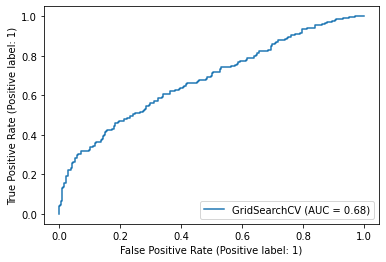

In [46]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

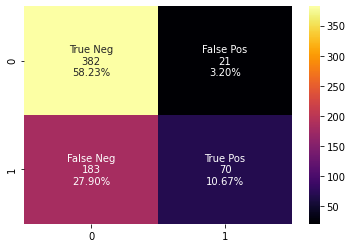

In [47]:
# Plot a confusion matrix with labels showing the models weaknesses

cf_matrix = confusion_matrix(y_test, y_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='inferno');

#### Produce a Classification Report, a cross-validated precision, recall and F1 score.

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       403
           1       0.77      0.28      0.41       253

    accuracy                           0.69       656
   macro avg       0.72      0.61      0.60       656
weighted avg       0.71      0.69      0.64       656



**These are the values based on a single test split**
It would be better to use cross-validation

#### Calculate the evaluation metrics using cross-validation

Calculate precision, recall and F1 score of the model using cross-validation with `cross_val_score` 

In [49]:
# Check best hyperparamers
gs_rf.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 600}

In [50]:
# Create the RandomForestClassifier using the best parameters
classifier = RandomForestClassifier(max_depth=14,
                                   min_samples_leaf=1,
                                   min_samples_split = 16,
                                   n_estimators = 600)

In [73]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=16, n_estimators=600)

In [74]:
classifier.score(X_test, y_test)

0.6859756097560976

In [75]:
X_full = np.concatenate((X_train, X_test), axis= 0)
X_full.shape

(3276, 9)

In [76]:
y_full = np.concatenate((y_train, y_test), axis= 0)
y_full.shape

(3276,)

In [77]:
# Cross-validated accuracy
cv_acc = cross_val_score(classifier, X_full, y_full, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.6733815862967789

In [67]:
# Cross-validated precision
cv_precision = cross_val_score(classifier, X_full, y_full, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.6999941262343804

In [69]:
# Cross-validated recall
cv_recall = cross_val_score(classifier, X_full, y_full, cv=5,  scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.2801164215686275

In [70]:
# Cross-validated f1-score
cv_f1 = cross_val_score(classifier, X_full, y_full, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.3866492182304511

In [88]:
data = {'Accuracy': [cv_acc], 'Precision': [cv_precision], 'Recall': [cv_recall], 'F1': [cv_f1]}
model_scores = pd.DataFrame(data = data, index=None)
model_scores

,Accuracy,Precision,Recall,F1
0,0.673382,0.699994,0.280116,0.386649


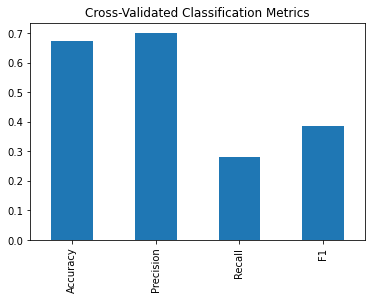

In [72]:
# Visulize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                     legend = False);

### Feature Importance

"Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

In [89]:
# Fit an instance of RandomForestClassifier
classifier = RandomForestClassifier(max_depth=14,
                                   min_samples_leaf=1,
                                   min_samples_split = 16,
                                   n_estimators = 600)

classifier.fit(X_train, y_train);

In [91]:
classifier.feature_importances_

array([0.1520518 , 0.12281896, 0.11293139, 0.11799184, 0.15936488,
       0.08536975, 0.08252521, 0.08418771, 0.08275846])

In [92]:
# PLot the feature importances

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

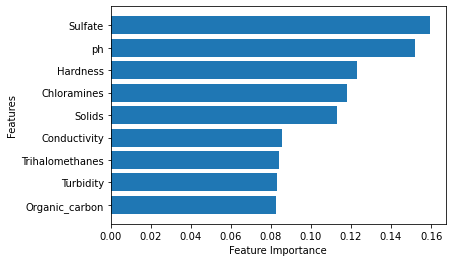

In [93]:
plot_features(X_train.columns, classifier.feature_importances_)

#### Sulfate

Sulfate has the highest Feature Importance and is also the feature with the most missing values in the data set.  Approximately 24% of the total samples were missing a value for sulfate content and therfore were filled with the median value of the train and test datasets respectively.  
This can be noted as an area of improvement in future sampling programs as more accurate sulfate data will undoubtedly improve the model's ability to make better predictions. 

### Discussion

As can be noted from the confusion matrix and the graph above, this model is weak on Recall.  This is to say that it predicts many false negatives.  In the context of this problem, many of the water samples that were in fact potable were predicted to be non-potable by the model.  On the other hand the model's precision score is relatively high due to low number of false positives given. False positives would be the samples the model predicted to be potable that were in fact non-potable.

The target value imbalance in the dataset of 60%/40% non-potable to potable samples may have had an adverse impact on the models ability to improve.  Another potential area of improvement could be how the missing sulfate data is handled.  A simple replacement with the median may not be the best solution based on sulfate importance.

**Next steps.**
Work the problem with this dataset again, this time addressing the target value imbalance.  Research recommended ways of handling an imbalance such as this for a binary classification problem.